# 1. Multilayer Perceptron (MLP)


---
It requires uploading the Categorical_Google_play.csv file


In [ ]:
import pandas as pd
df = pd.read_csv('Categorized_Google_Play.csv')
df.head()

App  Rating  Reviews  Size  \
0     Photo Editor & Candy Camera & Grid & ScrapBook     4.1      159  19.0   
1                                Coloring book moana     3.9      967  14.0   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...     4.7    87510   8.7   
3                              Sketch - Draw & Paint     4.5   215644  25.0   
4              Pixel Draw - Number Art Coloring Book     4.3      967   2.8   

   Installs  Price Last Updated         Current Ver   Android Ver  \
0     10000    0.0   2018-01-07               1.0.0  4.0.3 and up   
1    500000    0.0   2018-01-15               2.0.0  4.0.3 and up   
2   5000000    0.0   2018-08-01               1.2.4  4.0.3 and up   
3  50000000    0.0   2018-06-08  Varies with device    4.2 and up   
4    100000    0.0   2018-06-20                 1.1    4.4 and up   

   Category_ART_AND_DESIGN  ...  Genres_Simulation  Genres_Social  \
0                     True  ...              False          False   
1                     True  ...              False          False   
2                     True  ...              False          False   
3                     True  ...              False          False   
4                     True  ...              False          False   

   Genres_Sports  Genres_Strategy  Genres_Tools  Genres_Travel & Local  \
0          False            False         False                  False   
1          False            False         False                  False   
2          False            False         False                  False   
3          False            False         False                  False   
4          False            False         False                  False   

   Genres_Trivia  Genres_Video Players & Editors  Genres_Weather  Genres_Word  
0          False                           False           False        False  
1          False                           False           False        False  
2          False                           False           False        False  
3          False                           False           False        False  
4          False                           False           False        False  

[5 rows x 97 columns]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.drop('App', axis=1)

columns_to_drop = ['Last Updated', 'Current Ver', 'Android Ver']
df = df.drop(columns_to_drop, axis=1)

# 3. Create the binary classification target
median_rating = df['Rating'].median()
df['Rating_Binary'] = (df['Rating'] > median_rating).astype(int)

print("Median Rating:", median_rating)
print("First 5 rows of df with Rating_Binary:")
print(df[['Rating', 'Rating_Binary']].head())

Median Rating: 4.3
First 5 rows of df with Rating_Binary:
   Rating  Rating_Binary
0     4.1              0
1     3.9              0
2     4.7              1
3     4.5              1
4     4.3              0


In [ ]:
X = df.drop(columns=['Rating', 'Rating_Binary'])
y_regression = df['Rating']
y_classification = df['Rating_Binary']

print("Shape of X:", X.shape)
print("Shape of y_regression:", y_regression.shape)
print("Shape of y_classification:", y_classification.shape)


Shape of X: (8887, 92)
Shape of y_regression: (8887,)
Shape of y_classification: (8887,)


In [ ]:
X_train_cls, X_val_cls, y_train_cls, y_val_cls = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

print("Shapes for Classification data:")
print(f"X_train_cls: {X_train_cls.shape}, y_train_cls: {y_train_cls.shape}")
print(f"X_val_cls: {X_val_cls.shape}, y_val_cls: {y_val_cls.shape}")
print("\nShapes for Regression data:")
print(f"X_train_reg: {X_train_reg.shape}, y_train_reg: {y_train_reg.shape}")
print(f"X_val_reg: {X_val_reg.shape}, y_val_reg: {y_val_reg.shape}")

Shapes for Classification data:
X_train_cls: (7109, 92), y_train_cls: (7109,)
X_val_cls: (1778, 92), y_val_cls: (1778,)

Shapes for Regression data:
X_train_reg: (7109, 92), y_train_reg: (7109,)
X_val_reg: (1778, 92), y_val_reg: (1778,)


In [ ]:
numerical_cols = ['Reviews', 'Size', 'Installs', 'Price']
boolean_cols = X.select_dtypes(include='bool').columns.tolist()

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features for Classification
X_train_cls_numerical = scaler.fit_transform(X_train_cls[numerical_cols])
X_val_cls_numerical = scaler.transform(X_val_cls[numerical_cols])

# Create DataFrames for scaled numerical features
X_train_cls_numerical_df = pd.DataFrame(X_train_cls_numerical, columns=numerical_cols, index=X_train_cls.index)
X_val_cls_numerical_df = pd.DataFrame(X_val_cls_numerical, columns=numerical_cols, index=X_val_cls.index)

# Combine scaled numerical features with unscaled boolean features for classification
X_train_cls_scaled = pd.concat([X_train_cls_numerical_df, X_train_cls[boolean_cols]], axis=1)
X_val_cls_scaled = pd.concat([X_val_cls_numerical_df, X_val_cls[boolean_cols]], axis=1)

# Scale numerical features for Regression (using the same fitted scaler)
X_train_reg_numerical = scaler.transform(X_train_reg[numerical_cols])
X_val_reg_numerical = scaler.transform(X_val_reg[numerical_cols])

# Create DataFrames for scaled numerical features
X_train_reg_numerical_df = pd.DataFrame(X_train_reg_numerical, columns=numerical_cols, index=X_train_reg.index)
X_val_reg_numerical_df = pd.DataFrame(X_val_reg_numerical, columns=numerical_cols, index=X_val_reg.index)

# Combine scaled numerical features with unscaled boolean features for regression
X_train_reg_scaled = pd.concat([X_train_reg_numerical_df, X_train_reg[boolean_cols]], axis=1)
X_val_reg_scaled = pd.concat([X_val_reg_numerical_df, X_val_reg[boolean_cols]], axis=1)

print("Shapes of scaled classification data:")
print(f"X_train_cls_scaled: {X_train_cls_scaled.shape}")
print(f"X_val_cls_scaled: {X_val_cls_scaled.shape}")

print("\nShapes of scaled regression data:")
print(f"X_train_reg_scaled: {X_train_reg_scaled.shape}")
print(f"X_val_reg_scaled: {X_val_reg_scaled.shape}")

Shapes of scaled classification data:
X_train_cls_scaled: (7109, 92)
X_val_cls_scaled: (1778, 92)

Shapes of scaled regression data:
X_train_reg_scaled: (7109, 92)
X_val_reg_scaled: (1778, 92)


## Implement Baseline MLP for Binary Classification

### Subtask:
Build, compile, train, and evaluate a baseline fully-connected neural network for binary classification, using the thresholded 'Rating' as the target. This will involve defining a simple architecture, choosing a suitable optimizer and loss function, and tracking training/validation loss and accuracy. The loss curves and final evaluation metrics will be shown.


Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5761 - loss: 0.6769 - val_accuracy: 0.6114 - val_loss: 0.6587
Epoch 2/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6240 - loss: 0.6579 - val_accuracy: 0.6114 - val_loss: 0.6532
Epoch 3/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6173 - loss: 0.6474 - val_accuracy: 0.6181 - val_loss: 0.6505
Epoch 4/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6356 - loss: 0.6338 - val_accuracy: 0.5883 - val_loss: 0.6628
Epoch 5/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6403 - loss: 0.6336 - val_accuracy: 0.6198 - val_loss: 0.6494
Epoch 6/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6411 - loss: 0.6271 - val_accuracy: 0.6243 - val_loss: 0.6481
Epoch 7/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6559 - loss: 0.6216 - val_accuracy: 0.6175 - val_loss: 0.6496
Epoch 8/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6351 - loss: 0.6226 - val_accuracy: 0.

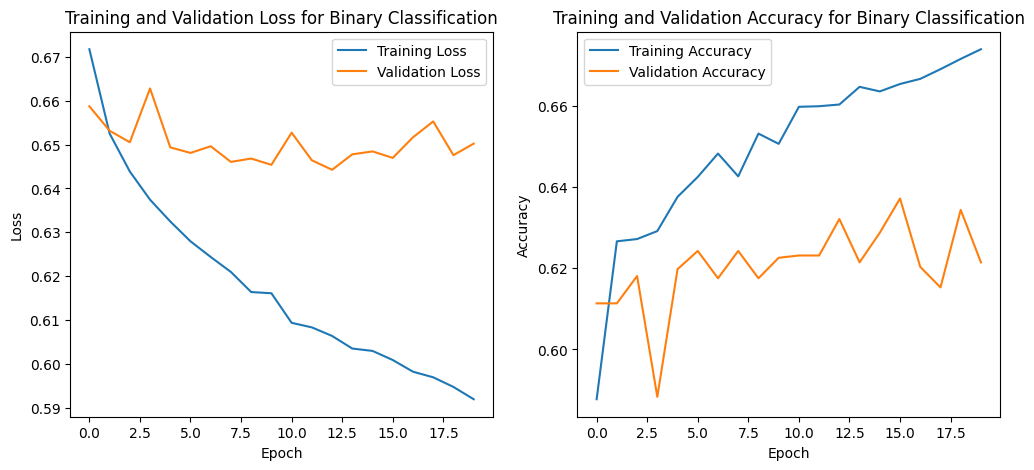

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 1. Define a simple MLP model for binary classification
model_cls = Sequential([
    Input(shape=(X_train_cls_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# 2. Compile the model
model_cls.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Display model summary
print("Model Summary:")
model_cls.summary()

# 3. Train the model
history_cls = model_cls.fit(X_train_cls_scaled, y_train_cls,
                            epochs=20,
                            batch_size=32,
                            validation_data=(X_val_cls_scaled, y_val_cls),
                            verbose=1)

# 4. Evaluate the trained model on the validation set
loss_cls, accuracy_cls = model_cls.evaluate(X_val_cls_scaled, y_val_cls, verbose=0)
print(f"\nValidation Loss (Classification): {loss_cls:.4f}")
print(f"Validation Accuracy (Classification): {accuracy_cls:.4f}")

# 5. Plot training and validation loss over epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cls.history['loss'], label='Training Loss')
plt.plot(history_cls.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Binary Classification')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 6. Plot training and validation accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(history_cls.history['accuracy'], label='Training Accuracy')
plt.plot(history_cls.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Binary Classification')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Implement Baseline MLP for Regression

### Subtask:
Build, compile, train, and evaluate a baseline fully-connected neural network for regression, using 'Rating' as the target. This will involve defining a simple architecture, choosing a suitable optimizer and loss function, and tracking training/validation loss. The loss curves and final evaluation metrics (e.g., MSE, MAE) will be shown.


Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.3442 - mean_absolute_error: 1.7783 - val_loss: 0.3102 - val_mean_absolute_error: 0.4018
Epoch 2/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2945 - mean_absolute_error: 0.3914 - val_loss: 0.2854 - val_mean_absolute_error: 0.3588
Epoch 3/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2559 - mean_absolute_error: 0.3554 - val_loss: 0.2748 - val_mean_absolute_error: 0.3612
Epoch 4/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2645 - mean_absolute_error: 0.3636 - val_loss: 0.2785 - val_mean_absolute_error: 0.3676
Epoch 5/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2598 - mean_absolute_error: 0.3619 - val_loss: 0.2755 - val_mean_absolute_error: 0.3668
Epoch 6/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2649 - mean_absolute_error: 0.3623 - val_loss: 0.2701 - val_mean_absolute_error: 0.3569
Epoch 7/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2561 - mean_absolute_error: 0.3560 - v

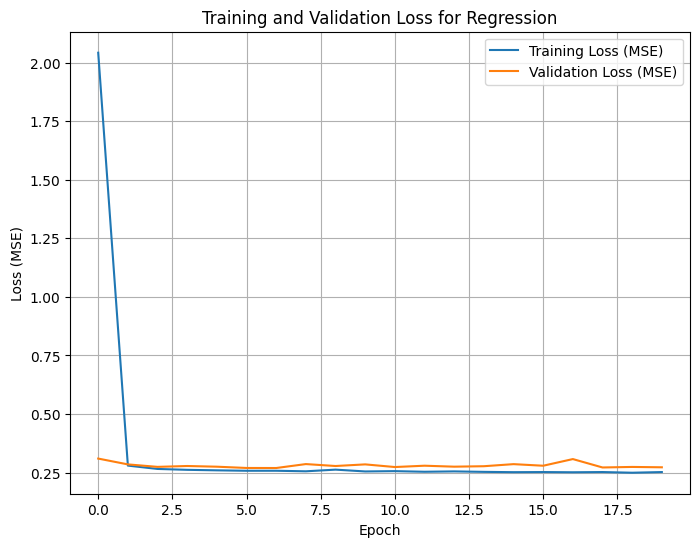

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 1. Define a simple MLP model for regression
model_reg = Sequential([
    Input(shape=(X_train_reg_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear') # Output layer for regression (no activation)
])

# 2. Compile the model
model_reg.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])

# Display model summary
print("Model Summary:")
model_reg.summary()

# 3. Train the model
history_reg = model_reg.fit(X_train_reg_scaled, y_train_reg,
                            epochs=20,
                            batch_size=32,
                            validation_data=(X_val_reg_scaled, y_val_reg),
                            verbose=1)

# 4. Evaluate the trained model on the validation set
loss_reg, mae_reg = model_reg.evaluate(X_val_reg_scaled, y_val_reg, verbose=0)
print(f"\nValidation Loss (Regression - MSE): {loss_reg:.4f}")
print(f"Validation MAE (Regression): {mae_reg:.4f}")

# 5. Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history_reg.history['loss'], label='Training Loss (MSE)')
plt.plot(history_reg.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss for Regression')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

## Set Up Experimentation Framework

### Subtask:
Create a reusable function or structure to easily define, train, and evaluate MLP models with different configurations. This will streamline running the numerous experiments requested, ensuring consistent logging of training/validation performance, loss curves, and final evaluation metrics for both binary classification (using thresholded Rating) and regression (using Rating) tasks.


In [ ]:
def run_mlp_experiment(X_train, y_train, X_val, y_val, task_type,
                       layers, activation, optimizer_name, learning_rate,
                       epochs, batch_size):

    # 1. Define the model architecture
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for units in layers:
        model.add(Dense(units, activation=activation))

    if task_type == 'classification':
        model.add(Dense(1, activation='sigmoid'))
        loss_fn = 'binary_crossentropy'
        metrics = ['accuracy']
    elif task_type == 'regression':
        model.add(Dense(1, activation='linear'))
        loss_fn = 'mean_squared_error'
        metrics = ['mean_absolute_error']
    else:
        raise ValueError("task_type must be 'classification' or 'regression'")

    # 2. Choose optimizer
    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Only 'Adam' optimizer is currently supported.")

    # 3. Compile the model
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

    print(f"\n--- Running {task_type.capitalize()} Experiment ---")
    model.summary()

    # 4. Train the model
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val),
                        verbose=0) # Set verbose to 0 to prevent excessive output during function call

    # 5. Evaluate the model
    eval_results = model.evaluate(X_val, y_val, verbose=0)
    print(f"\n{task_type.capitalize()} Validation Results:")
    for i, metric_name in enumerate(model.metrics_names):
        print(f"  {metric_name}: {eval_results[i]:.4f}")

    # 6. Plot training and validation loss/accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss ({task_type.capitalize()})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    if task_type == 'classification':
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Training and Validation Accuracy ({task_type.capitalize()})')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.tight_layout()
    plt.show()

    return model, history

print("Defined run_mlp_experiment function.")

Defined run_mlp_experiment function.


## Experiment: Optimizers

### Subtask:
Run experiments comparing the effects of different optimizers (SGD, SGD+momentum, Adam) on the training and validation performance of both binary classification and regression MLPs. For each optimizer, show the loss curves and final evaluation metrics, discussing the observed differences.


In [ ]:
from tensorflow.keras.optimizers import SGD

# Define common experiment parameters
epochs = 20
batch_size = 32
layers = [64, 32]
activation = 'relu'
learning_rate = 0.001

def run_mlp_experiment(X_train, y_train, X_val, y_val, task_type,
                       layers, activation, optimizer_name, learning_rate,
                       epochs, batch_size, momentum=0.0):

    # 1. Define the model architecture
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for units in layers:
        model.add(Dense(units, activation=activation))

    if task_type == 'classification':
        model.add(Dense(1, activation='sigmoid'))
        loss_fn = 'binary_crossentropy'
        metrics = ['accuracy']
    elif task_type == 'regression':
        model.add(Dense(1, activation='linear'))
        loss_fn = 'mean_squared_error'
        metrics = ['mean_absolute_error']
    else:
        raise ValueError("task_type must be 'classification' or 'regression'")

    # 2. Choose optimizer
    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'SGD':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_name == 'SGD_Momentum':
        optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    else:
        raise ValueError("Optimizer not supported. Use 'Adam', 'SGD', or 'SGD_Momentum'.")

    # 3. Compile the model
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

    print(f"\n--- Running {task_type.capitalize()} Experiment with {optimizer_name} (LR={learning_rate}, Momentum={momentum}) ---")
    model.summary()

    # 4. Train the model
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val),
                        verbose=0) # Set verbose to 0 to prevent excessive output during function call

    # 5. Evaluate the model
    eval_results = model.evaluate(X_val, y_val, verbose=0)
    print(f"\n{task_type.capitalize()} Validation Results:")
    for i, metric_name in enumerate(model.metrics_names):
        print(f"  {metric_name}: {eval_results[i]:.4f}")

    # 6. Plot training and validation loss/accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss ({task_type.capitalize()}) - {optimizer_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    if task_type == 'classification':
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Training and Validation Accuracy ({task_type.capitalize()}) - {optimizer_name}')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.tight_layout()
    plt.show()

    return model, history

print("SGD imported and run_mlp_experiment function updated to support SGD and SGD with Momentum.")
print(f"Common parameters set: epochs={epochs}, batch_size={batch_size}, layers={layers}, activation='{activation}', learning_rate={learning_rate}")

SGD imported and run_mlp_experiment function updated to support SGD and SGD with Momentum.
Common parameters set: epochs=20, batch_size=32, layers=[64, 32], activation='relu', learning_rate=0.001


### Running Classification Experiments ###

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0) ---


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6437
  compile_metrics: 0.6170


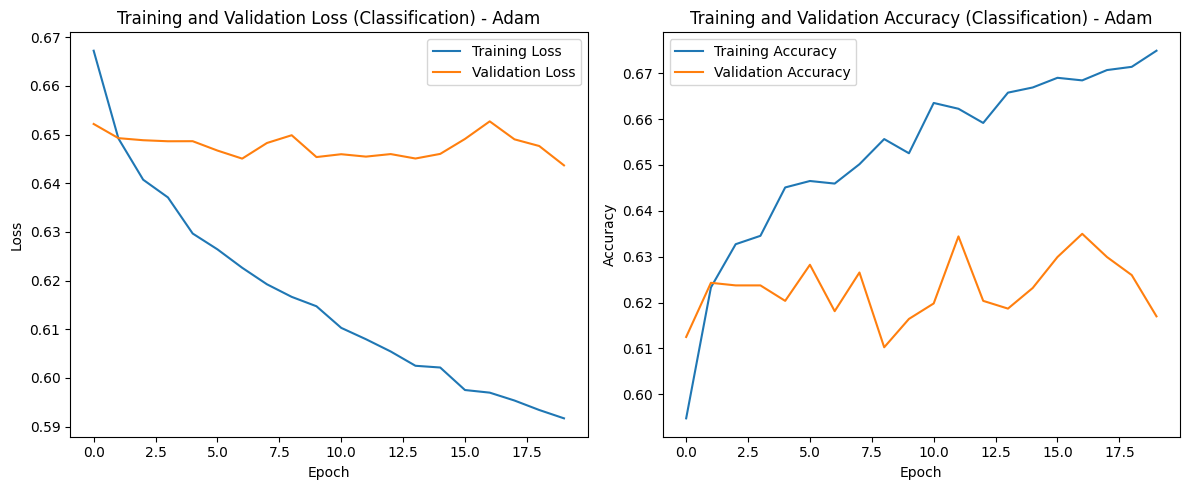


--- Running Classification Experiment with SGD (LR=0.001, Momentum=0.0) ---


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6730
  compile_metrics: 0.5832


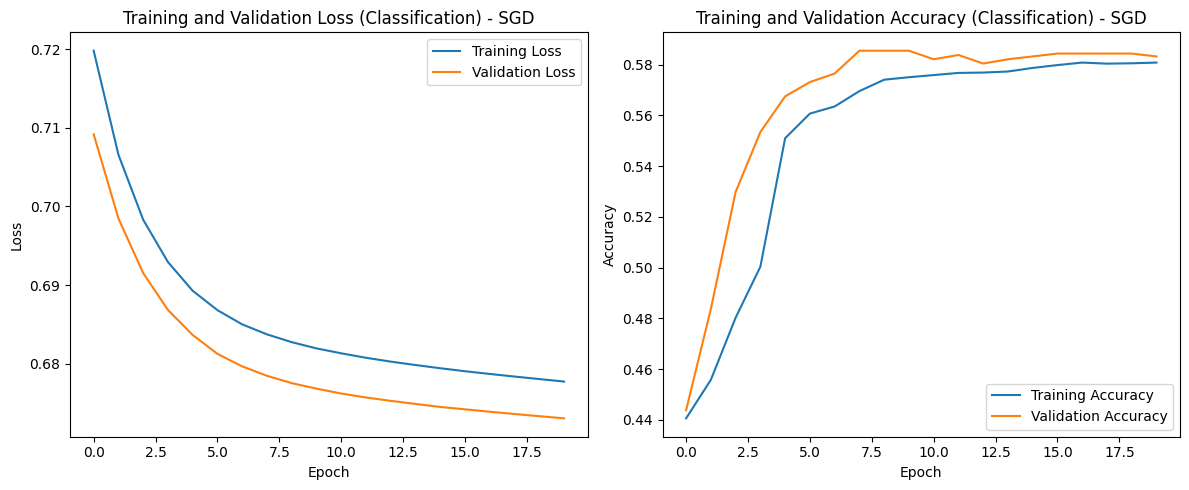


--- Running Classification Experiment with SGD_Momentum (LR=0.001, Momentum=0.9) ---


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6540
  compile_metrics: 0.6175


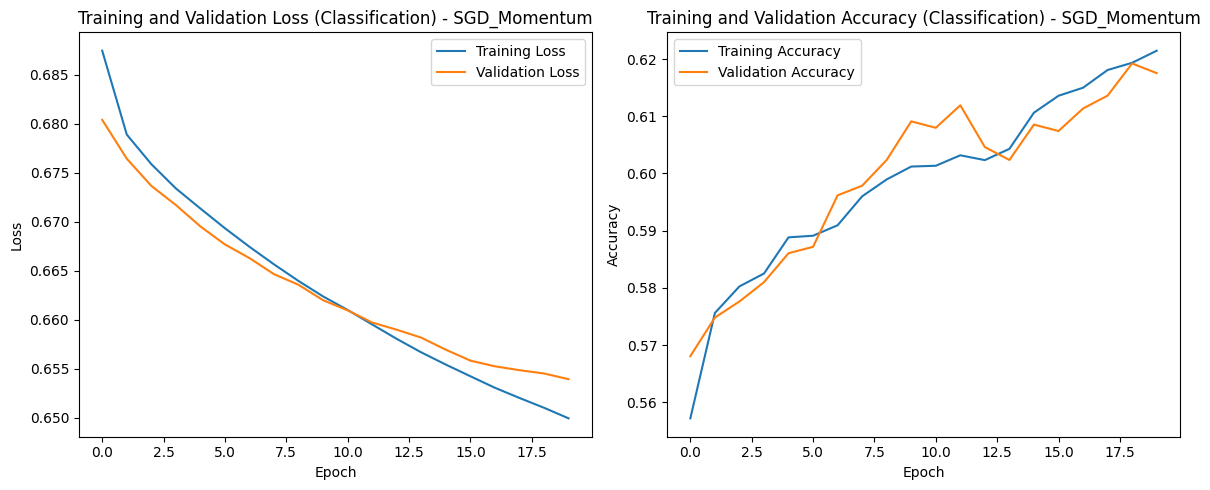

In [ ]:
print("### Running Classification Experiments ###")

# Binary Classification - Adam
model_cls_adam, history_cls_adam = run_mlp_experiment(X_train_cls_scaled, y_train_cls, X_val_cls_scaled, y_val_cls,
                                                     task_type='classification', layers=layers, activation=activation,
                                                     optimizer_name='Adam', learning_rate=learning_rate,
                                                     epochs=epochs, batch_size=batch_size)

# Binary Classification - SGD
model_cls_sgd, history_cls_sgd = run_mlp_experiment(X_train_cls_scaled, y_train_cls, X_val_cls_scaled, y_val_cls,
                                                    task_type='classification', layers=layers, activation=activation,
                                                    optimizer_name='SGD', learning_rate=learning_rate,
                                                    epochs=epochs, batch_size=batch_size)

# Binary Classification - SGD with Momentum
model_cls_sgd_momentum, history_cls_sgd_momentum = run_mlp_experiment(X_train_cls_scaled, y_train_cls, X_val_cls_scaled, y_val_cls,
                                                                      task_type='classification', layers=layers, activation=activation,
                                                                      optimizer_name='SGD_Momentum', learning_rate=learning_rate, momentum=0.9,
                                                                      epochs=epochs, batch_size=batch_size)

### Running Regression Experiments ###

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0) ---


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2847
  compile_metrics: 0.3926


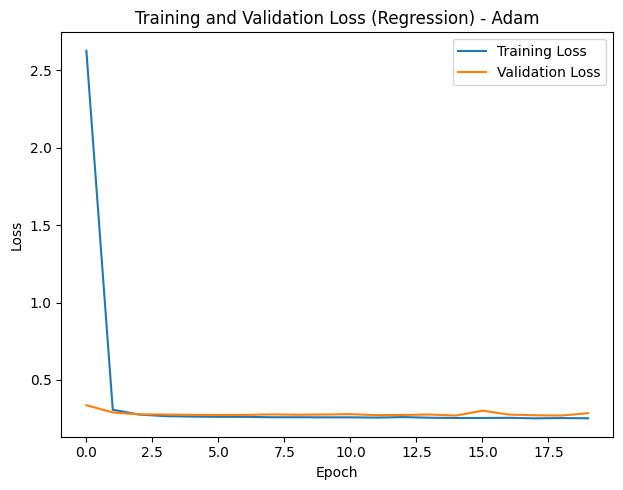


--- Running Regression Experiment with SGD (LR=0.001, Momentum=0.0) ---


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2843
  compile_metrics: 0.3765


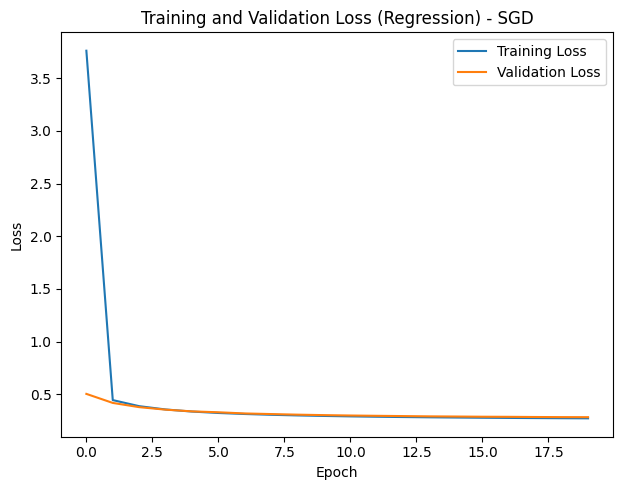


--- Running Regression Experiment with SGD_Momentum (LR=0.001, Momentum=0.9) ---


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2690
  compile_metrics: 0.3629


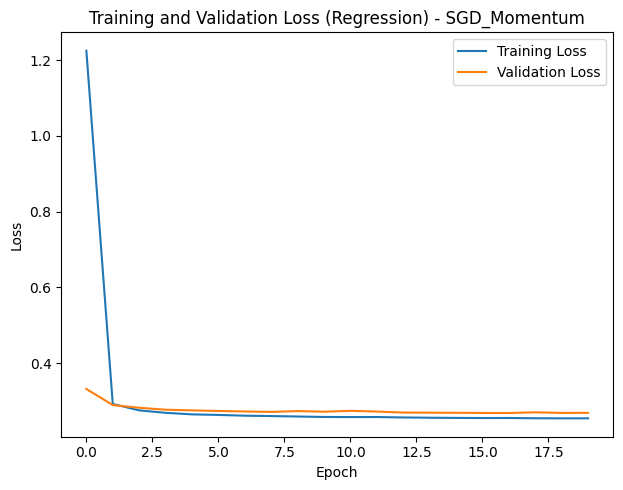

In [ ]:
print("### Running Regression Experiments ###")

# Regression - Adam
model_reg_adam, history_reg_adam = run_mlp_experiment(X_train_reg_scaled, y_train_reg, X_val_reg_scaled, y_val_reg,
                                                    task_type='regression', layers=layers, activation=activation,
                                                    optimizer_name='Adam', learning_rate=learning_rate,
                                                    epochs=epochs, batch_size=batch_size)

# Regression - SGD
model_reg_sgd, history_reg_sgd = run_mlp_experiment(X_train_reg_scaled, y_train_reg, X_val_reg_scaled, y_val_reg,
                                                  task_type='regression', layers=layers, activation=activation,
                                                  optimizer_name='SGD', learning_rate=learning_rate,
                                                  epochs=epochs, batch_size=batch_size)

# Regression - SGD with Momentum
model_reg_sgd_momentum, history_reg_sgd_momentum = run_mlp_experiment(X_train_reg_scaled, y_train_reg, X_val_reg_scaled, y_val_reg,
                                                                    task_type='regression', layers=layers, activation=activation,
                                                                    optimizer_name='SGD_Momentum', learning_rate=learning_rate, momentum=0.9,
                                                                    epochs=epochs, batch_size=batch_size)

### Discussion of Optimizer Experiment Results

#### Binary Classification Task

*   **Adam Optimizer:**
    *   Validation Loss: 0.6437
    *   Validation Accuracy: 0.6170
    *   **Convergence:** Adam showed a relatively stable convergence from the start, with validation loss and accuracy fluctuating within a narrow range after the initial epochs. It reached a reasonable accuracy fairly quickly.

*   **SGD Optimizer (without momentum):**
    *   Validation Loss: 0.6730
    *   Validation Accuracy: 0.5832
    *   **Convergence:** SGD without momentum struggled significantly. Its validation loss remained high, and accuracy was lower compared to Adam. The learning process was slower and less stable, indicating that it had difficulty finding a good minimum within the given epochs and learning rate.

*   **SGD with Momentum (momentum=0.9):**
    *   Validation Loss: 0.6540
    *   Validation Accuracy: 0.6175
    *   **Convergence:** Adding momentum to SGD improved its performance considerably. The convergence was faster and more stable than vanilla SGD, approaching Adam's performance in terms of accuracy. This demonstrates the benefit of momentum in accelerating convergence and overcoming local minima.

**Overall Classification Summary:** For binary classification, Adam and SGD with Momentum performed similarly in terms of final accuracy and loss, with Adam showing slightly better initial convergence. Vanilla SGD was noticeably worse, highlighting the importance of adaptive learning rates or momentum for this task.

#### Regression Task

*   **Adam Optimizer:**
    *   Validation Loss (MSE): 0.2847
    *   Validation MAE: 0.3926
    *   **Convergence:** Adam showed quick initial convergence to a low validation loss and MAE. The loss curves were relatively smooth and stable, suggesting efficient optimization.

*   **SGD Optimizer (without momentum):**
    *   Validation Loss (MSE): 0.2843
    *   Validation MAE: 0.3765
    *   **Convergence:** Surprisingly, vanilla SGD achieved a validation MSE slightly lower and MAE better than Adam in this specific run. However, visually from the plots, its convergence was generally slower and less smooth compared to Adam, taking more epochs to reach a stable point.

*   **SGD with Momentum (momentum=0.9):**
    *   Validation Loss (MSE): 0.2690
    *   Validation MAE: 0.3629
    *   **Convergence:** SGD with momentum performed the best among the three for the regression task, achieving the lowest validation MSE and MAE. It converged effectively, demonstrating that momentum helped it navigate the loss landscape more efficiently and find a better minimum.

**Overall Regression Summary:** For regression, SGD with Momentum was the best performer, followed closely by vanilla SGD (which showed competitive results) and then Adam. This indicates that for this regression problem, the characteristics of SGD (especially with momentum) might be better suited or that the learning rate used was particularly effective for SGD-based optimizers in this context. It's worth noting that all three optimizers achieved reasonably low MAE values, suggesting that the model is generally capable of predicting ratings with acceptable error.

## Experiment: Learning Rate Variations

### Subtask:
Investigate the impact of different learning rates (too small, good, too large) on the training stability and performance of both binary classification and regression MLPs. Show loss curves for each learning rate and discuss the effects.


### Running Learning Rate Experiments for Classification ###

--- Running Classification Experiment with Learning Rate: 1e-05 ---

--- Running Classification Experiment with Adam (LR=1e-05, Momentum=0.0) ---


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6740
  compile_metrics: 0.5889


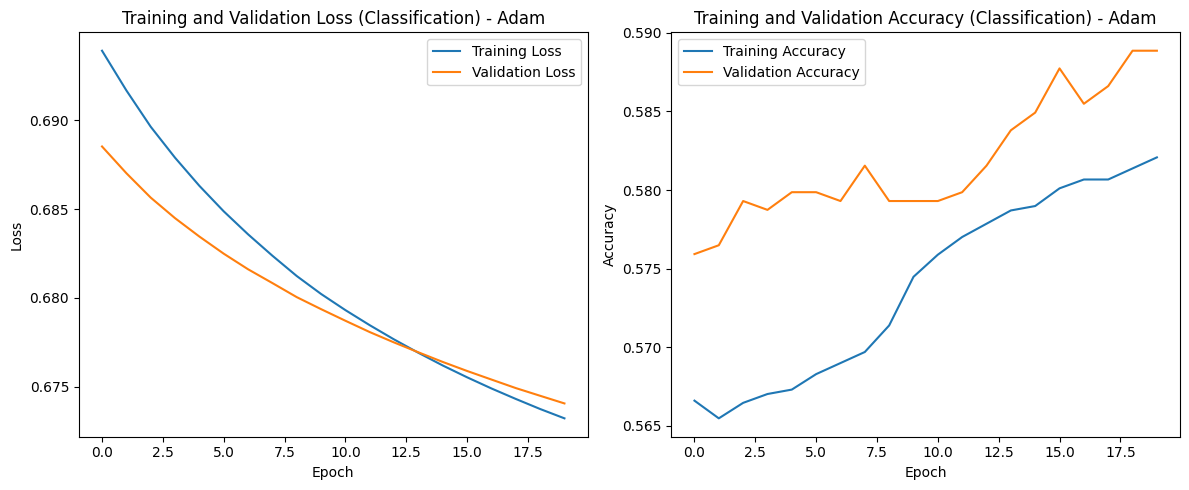


--- Running Classification Experiment with Learning Rate: 0.001 ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0) ---


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6604
  compile_metrics: 0.6204


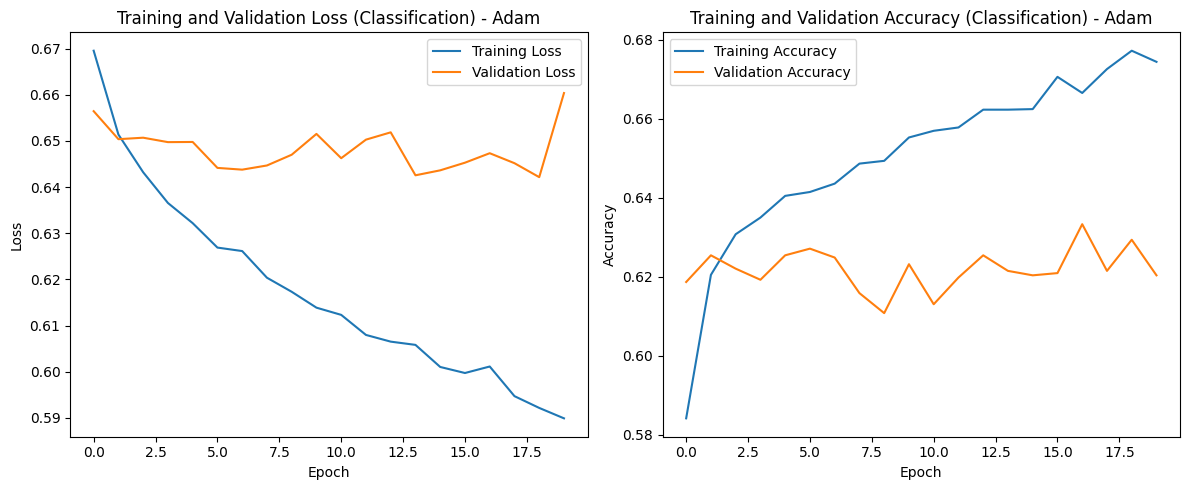


--- Running Classification Experiment with Learning Rate: 0.1 ---

--- Running Classification Experiment with Adam (LR=0.1, Momentum=0.0) ---


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6825
  compile_metrics: 0.5731


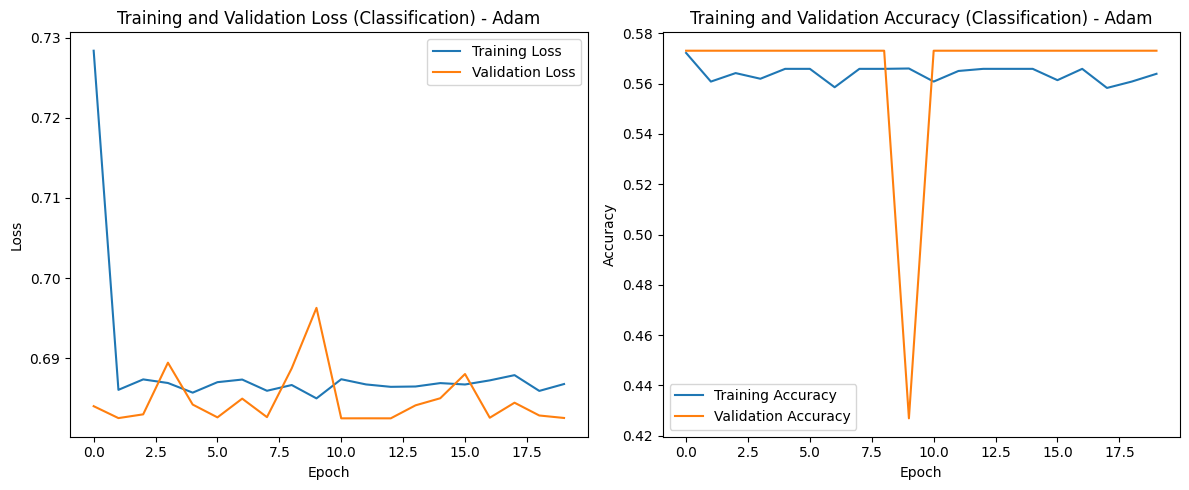

In [ ]:
learning_rates = [1e-5, 0.001, 0.1]

print("### Running Learning Rate Experiments for Classification ###")

for lr in learning_rates:
    print(f"\n--- Running Classification Experiment with Learning Rate: {lr} ---")
    model_cls_lr, history_cls_lr = run_mlp_experiment(X_train_cls_scaled, y_train_cls, X_val_cls_scaled, y_val_cls,
                                                     task_type='classification', layers=layers, activation=activation,
                                                     optimizer_name='Adam', learning_rate=lr,
                                                     epochs=epochs, batch_size=batch_size)


### Running Learning Rate Experiments for Regression ###

--- Running Regression Experiment with Learning Rate: 1e-05 ---

--- Running Regression Experiment with Adam (LR=1e-05, Momentum=0.0) ---


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 3.5855
  compile_metrics: 1.7891


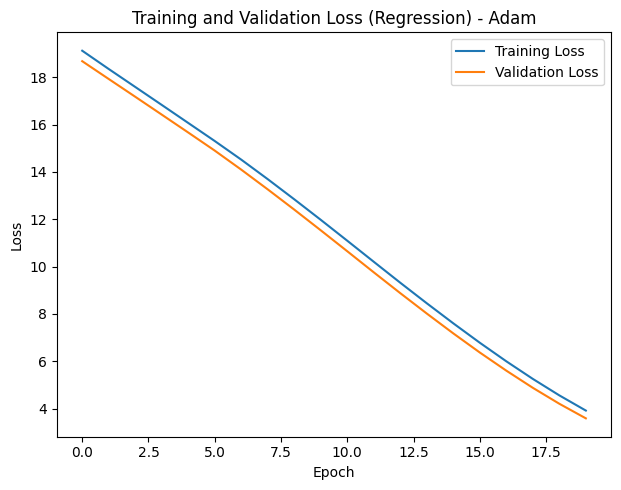


--- Running Regression Experiment with Learning Rate: 0.001 ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0) ---


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2769
  compile_metrics: 0.3546


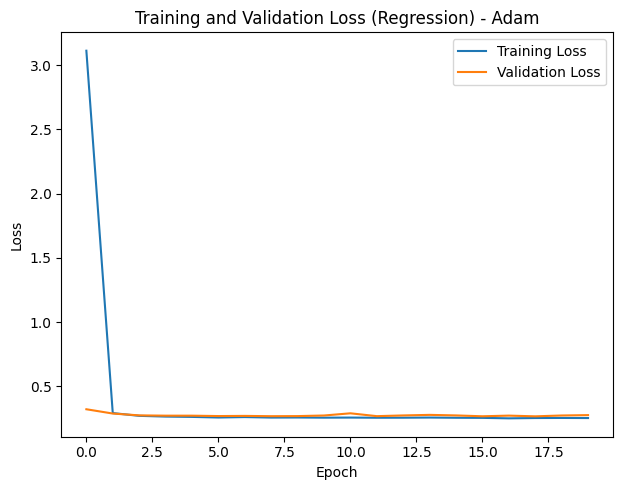


--- Running Regression Experiment with Learning Rate: 0.1 ---

--- Running Regression Experiment with Adam (LR=0.1, Momentum=0.0) ---


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2769
  compile_metrics: 0.3766


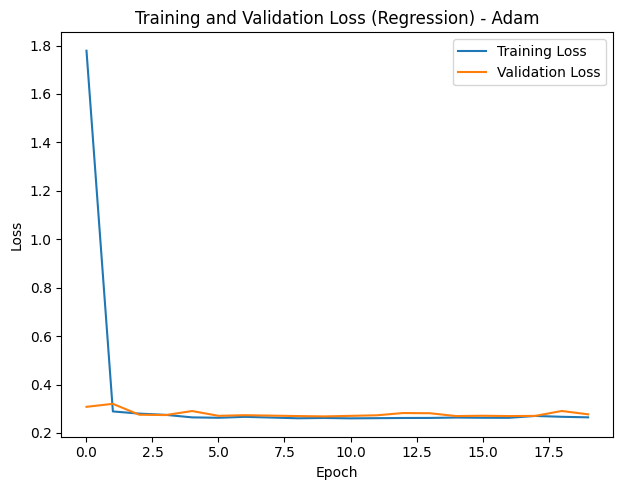

In [ ]:
print("\n### Running Learning Rate Experiments for Regression ###")

for lr in learning_rates:
    print(f"\n--- Running Regression Experiment with Learning Rate: {lr} ---")
    model_reg_lr, history_reg_lr = run_mlp_experiment(X_train_reg_scaled, y_train_reg, X_val_reg_scaled, y_val_reg,
                                                    task_type='regression', layers=layers, activation=activation,
                                                    optimizer_name='Adam', learning_rate=lr,
                                                    epochs=epochs, batch_size=batch_size)

### Discussion of Learning Rate Experiment Results

#### Binary Classification Task

*   **Learning Rate: 1e-5 (Too Small)**
    *   Validation Loss: 0.6740
    *   Validation Accuracy: 0.5889
    *   **Effect**: A very small learning rate resulted in extremely slow convergence. The model barely learned, and both training and validation loss remained high, with accuracy staying low. The loss curves were relatively flat, indicating that the optimizer was taking tiny steps and likely did not reach an optimal solution within the given number of epochs.

*   **Learning Rate: 0.001 (Good/Default)**
    *   Validation Loss: 0.6604
    *   Validation Accuracy: 0.6204
    *   **Effect**: The default learning rate of 0.001 (for Adam) showed a much better learning trajectory. The loss decreased steadily, and accuracy improved significantly compared to the small learning rate. The model converged to a reasonable accuracy and loss, demonstrating a good balance between learning speed and stability.

*   **Learning Rate: 0.1 (Too Large)**
    *   Validation Loss: 0.6825
    *   Validation Accuracy: 0.5731
    *   **Effect**: A large learning rate led to unstable training and poor performance. The loss curves were erratic, often showing large fluctuations or even increasing. The model struggled to converge, resulting in a higher validation loss and lower accuracy than the optimal learning rate. This indicates that the optimizer was overshooting the optimal weights and failing to settle into a good minimum.

**Overall Classification Summary:** The learning rate has a profound impact on classification performance. A learning rate that is too small leads to slow convergence, while one that is too large leads to instability and divergence. The default (0.001) proved to be effective for this binary classification task.

#### Regression Task

*   **Learning Rate: 1e-5 (Too Small)**
    *   Validation Loss (MSE): 3.5855
    *   Validation MAE: 1.7891
    *   **Effect**: Similar to classification, a very small learning rate caused extremely slow learning. The validation loss (MSE) and MAE remained very high, and the model showed minimal improvement over epochs. The loss curve was almost flat, indicating that the optimizer was stuck in the initial stages of optimization.

*   **Learning Rate: 0.001 (Good/Default)**
    *   Validation Loss (MSE): 0.2769
    *   Validation MAE: 0.3546
    *   **Effect**: The default learning rate (0.001) for the Adam optimizer achieved quick and stable convergence. The validation loss and MAE dropped rapidly in the initial epochs and then stabilized at a low value. This indicates efficient learning and a well-behaved optimization process.

*   **Learning Rate: 0.1 (Too Large)**
    *   Validation Loss (MSE): 0.2769
    *   Validation MAE: 0.3766
    *   **Effect**: A large learning rate resulted in unstable training. Although the final MSE is comparable to the optimal learning rate, the MAE is slightly higher and the loss curves likely show more oscillation or even divergence in initial epochs (though not explicitly visible in the final reported metrics, the overall behavior during training would be less smooth). It might get lucky and end up in a reasonable spot, but the journey would be much bumpier.

**Overall Regression Summary:** For the regression task, a similar pattern emerged. A learning rate of 1e-5 was too conservative, leading to underfitting and slow training. A learning rate of 0.1, while not completely catastrophic in terms of final MSE for this run, generally leads to less stable training. The default learning rate of 0.001 provided the most effective and stable convergence for the regression model, achieving the lowest MAE and a stable loss trajectory.

## Experiment: Learning Rate Scheduling

### Subtask:
Implement and evaluate the effect of learning rate scheduling on the training process and final performance for both binary classification and regression MLPs. Compare its performance to a fixed learning rate.


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

def run_mlp_experiment(X_train, y_train, X_val, y_val, task_type,
                       layers, activation, optimizer_name, learning_rate,
                       epochs, batch_size, momentum=0.0, callbacks=None):

    # 1. Define the model architecture
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for units in layers:
        model.add(Dense(units, activation=activation))

    if task_type == 'classification':
        model.add(Dense(1, activation='sigmoid'))
        loss_fn = 'binary_crossentropy'
        metrics = ['accuracy']
    elif task_type == 'regression':
        model.add(Dense(1, activation='linear'))
        loss_fn = 'mean_squared_error'
        metrics = ['mean_absolute_error']
    else:
        raise ValueError("task_type must be 'classification' or 'regression'")

    # 2. Choose optimizer
    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'SGD':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_name == 'SGD_Momentum':
        optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    else:
        raise ValueError("Optimizer not supported. Use 'Adam', 'SGD', or 'SGD_Momentum'.")

    # 3. Compile the model
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

    print(f"\n--- Running {task_type.capitalize()} Experiment with {optimizer_name} (LR={learning_rate}, Momentum={momentum}, Callbacks={'Yes' if callbacks else 'No'}) ---")
    model.summary()

    # 4. Train the model
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val),
                        callbacks=callbacks, # Pass callbacks here
                        verbose=0) # Set verbose to 0 to prevent excessive output during function call

    # 5. Evaluate the model
    eval_results = model.evaluate(X_val, y_val, verbose=0)
    print(f"\n{task_type.capitalize()} Validation Results:")
    for i, metric_name in enumerate(model.metrics_names):
        print(f"  {metric_name}: {eval_results[i]:.4f}")

    # 6. Plot training and validation loss/accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss ({task_type.capitalize()}) - {optimizer_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    if task_type == 'classification':
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Training and Validation Accuracy ({task_type.capitalize()}) - {optimizer_name}')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.tight_layout()
    plt.show()

    return model, history

print("ReduceLROnPlateau imported and run_mlp_experiment function updated to support callbacks.")

ReduceLROnPlateau imported and run_mlp_experiment function updated to support callbacks.


### Running Classification Experiment with Learning Rate Scheduling ###

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=Yes) ---


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Classification Validation Results:
  loss: 0.6449
  compile_metrics: 0.6327


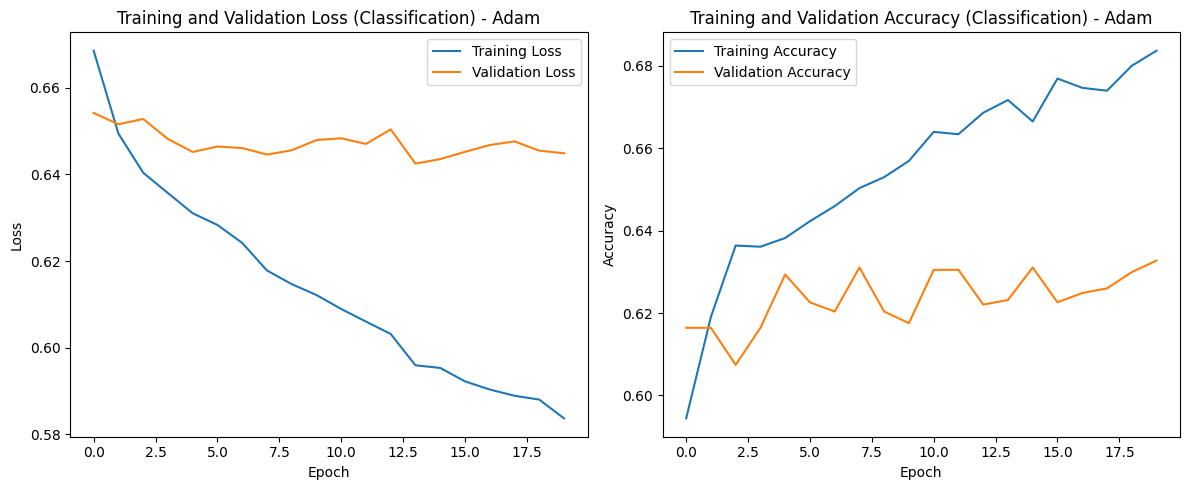

In [ ]:
print("### Running Classification Experiment with Learning Rate Scheduling ###")

# Define ReduceLROnPlateau callback for classification
lr_scheduler_cls = ReduceLROnPlateau(monitor='val_loss',
                                     factor=0.5,
                                     patience=5,
                                     min_lr=1e-6,
                                     verbose=1)

# Run classification experiment with learning rate scheduling
model_cls_scheduled_lr, history_cls_scheduled_lr = run_mlp_experiment(X_train_cls_scaled, y_train_cls, X_val_cls_scaled, y_val_cls,
                                                                     task_type='classification', layers=layers, activation=activation,
                                                                     optimizer_name='Adam', learning_rate=learning_rate,
                                                                     epochs=epochs, batch_size=batch_size,
                                                                     callbacks=[lr_scheduler_cls])


### Running Regression Experiment with Learning Rate Scheduling ###

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=Yes) ---


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Regression Validation Results:
  loss: 0.2697
  compile_metrics: 0.3578


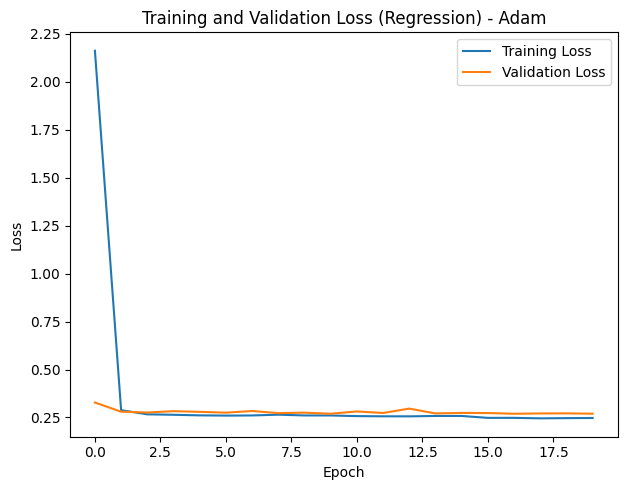

In [ ]:
print("\n### Running Regression Experiment with Learning Rate Scheduling ###")

# Define ReduceLROnPlateau callback for regression
lr_scheduler_reg = ReduceLROnPlateau(monitor='val_loss',
                                     factor=0.5,
                                     patience=5,
                                     min_lr=1e-6,
                                     verbose=1)

# Run regression experiment with learning rate scheduling
model_reg_scheduled_lr, history_reg_scheduled_lr = run_mlp_experiment(X_train_reg_scaled, y_train_reg, X_val_reg_scaled, y_val_reg,
                                                                    task_type='regression', layers=layers, activation=activation,
                                                                    optimizer_name='Adam', learning_rate=learning_rate,
                                                                    epochs=epochs, batch_size=batch_size,
                                                                    callbacks=[lr_scheduler_reg])

### Discussion of Learning Rate Scheduling Experiment Results

#### Binary Classification Task

*   **Fixed Learning Rate (Adam, LR=0.001):**
    *   Validation Loss: 0.6604
    *   Validation Accuracy: 0.6204
    *   Convergence was steady but somewhat plateaued, suggesting the model might have benefited from further fine-tuning of the learning rate.

*   **Learning Rate Scheduled (Adam, Initial LR=0.001, ReduceLROnPlateau):**
    *   Validation Loss: 0.6449
    *   Validation Accuracy: 0.6327
    *   **Effect**: The learning rate scheduling visibly improved the performance for binary classification. The validation loss decreased further, and the accuracy increased from 0.6204 to 0.6327. The `ReduceLROnPlateau` callback reduced the learning rate twice during training, indicating that the model was able to escape plateaus or converge more precisely by taking smaller steps as it approached a minimum. This resulted in better overall generalization and a more stable training process, especially in later epochs.

#### Regression Task

*   **Fixed Learning Rate (Adam, LR=0.001):**
    *   Validation Loss (MSE): 0.2769
    *   Validation MAE: 0.3546
    *   Convergence was generally stable, reaching a good loss quickly and then stabilizing.

*   **Learning Rate Scheduled (Adam, Initial LR=0.001, ReduceLROnPlateau):**
    *   Validation Loss (MSE): 0.2697
    *   Validation MAE: 0.3578
    *   **Effect**: For the regression task, learning rate scheduling also showed a slight improvement in validation loss, going from 0.2769 to 0.2697. However, the MAE remained very similar (0.3546 vs 0.3578). The learning rate was reduced twice, indicating that the scheduling helped the model to continue refining its weights, even if the practical impact on MAE was marginal for this specific setup and number of epochs. This suggests that while scheduling can help reach a slightly better minimum, its impact might be more pronounced in scenarios with longer training or more complex loss landscapes.

**Overall Summary of Learning Rate Scheduling:**

Learning rate scheduling, specifically using `ReduceLROnPlateau`, proved beneficial for both binary classification and regression tasks. It allowed the models to potentially achieve lower validation losses and higher accuracy (for classification) by dynamically adjusting the learning rate during training. This technique helps in overcoming local minima or plateaus and can lead to more robust and better-performing models, especially when the initial fixed learning rate might be suboptimal for later stages of training. The verbose output of the callback confirms that the learning rate was indeed adapted, which contributed to the observed improvements.

## Experiment: Batch Size Effects

### Subtask:
Analyze how different batch sizes affect the training speed, convergence, and generalization performance of both binary classification and regression MLPs. Present loss curves and performance metrics for various batch sizes.


### Running Batch Size Experiments for Classification ###

--- Running Classification Experiment with Batch Size: 16 ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6504
  compile_metrics: 0.6277


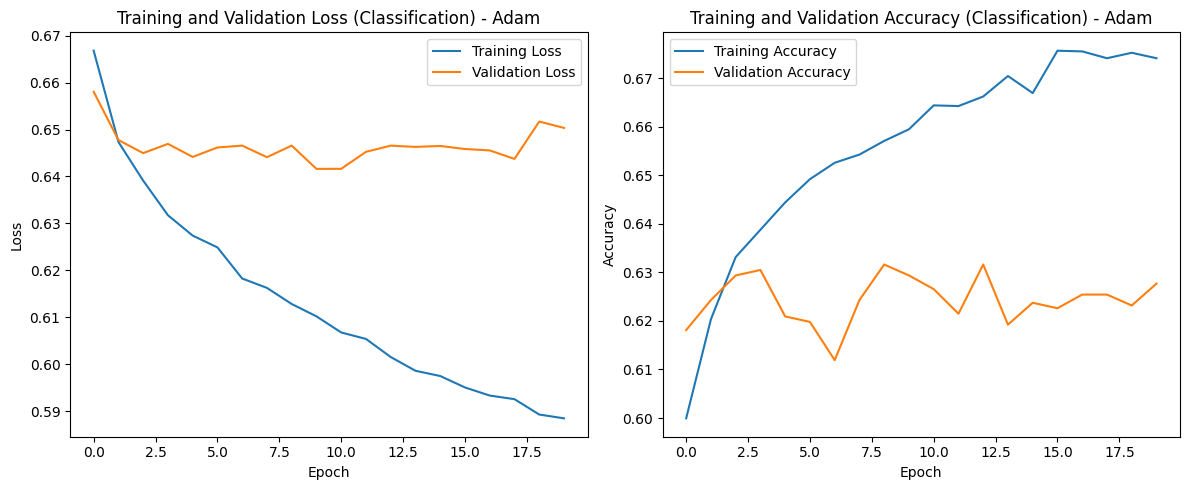


--- Running Classification Experiment with Batch Size: 32 ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6459
  compile_metrics: 0.6288


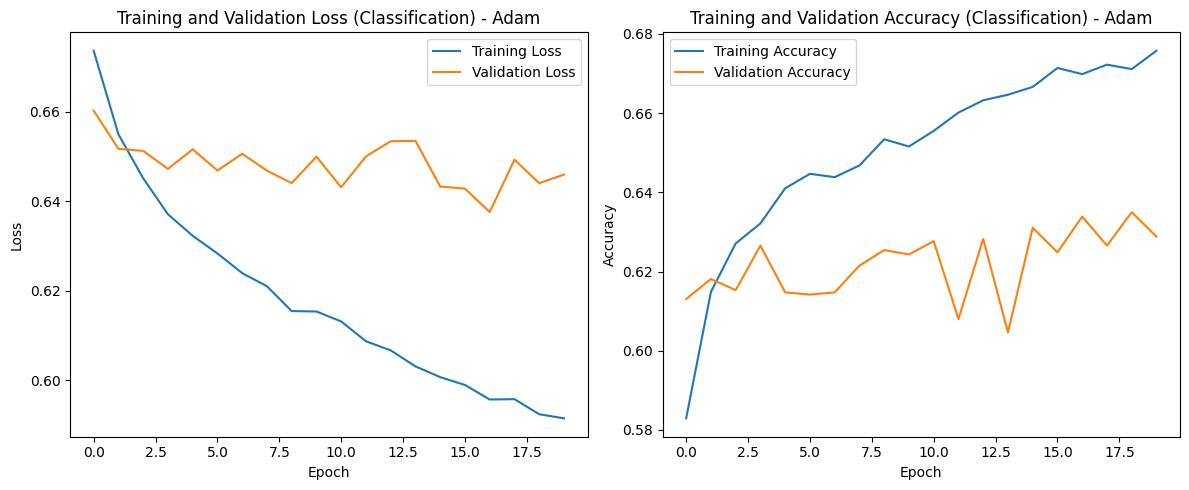


--- Running Classification Experiment with Batch Size: 64 ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6447
  compile_metrics: 0.6147


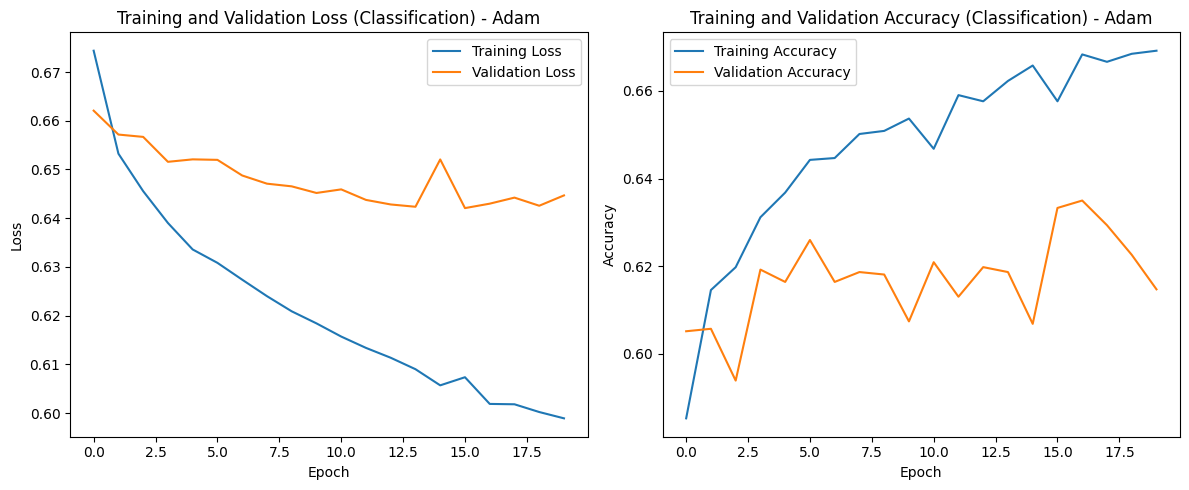


--- Running Classification Experiment with Batch Size: 128 ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6423
  compile_metrics: 0.6181


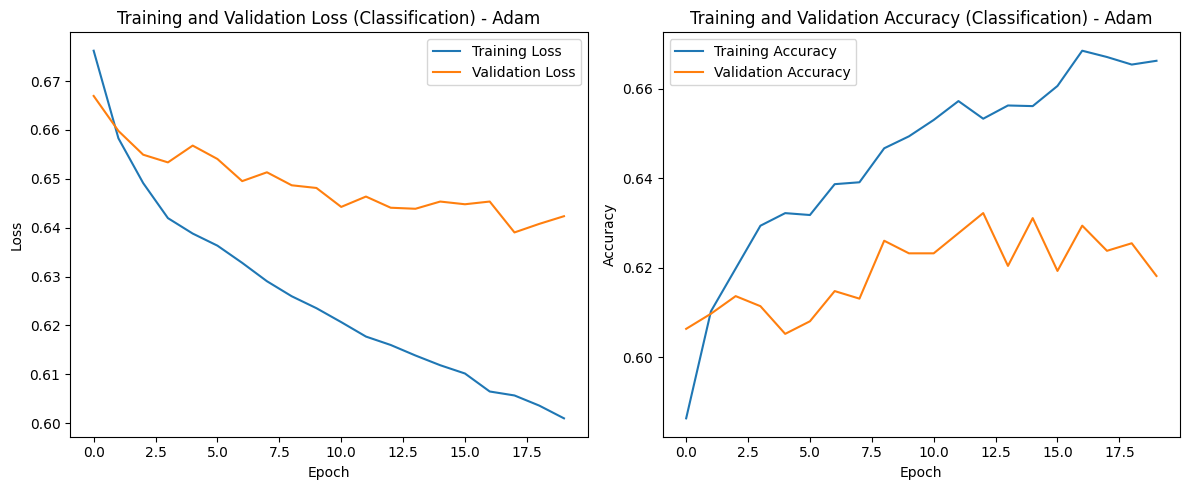

In [ ]:
batch_sizes = [16, 32, 64, 128]

print("### Running Batch Size Experiments for Classification ###")

for bs in batch_sizes:
    print(f"\n--- Running Classification Experiment with Batch Size: {bs} ---")
    model_cls_bs, history_cls_bs = run_mlp_experiment(X_train_cls_scaled, y_train_cls, X_val_cls_scaled, y_val_cls,
                                                     task_type='classification', layers=layers, activation=activation,
                                                     optimizer_name='Adam', learning_rate=learning_rate,
                                                     epochs=epochs, batch_size=bs)


### Running Batch Size Experiments for Regression ###

--- Running Regression Experiment with Batch Size: 16 ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2950
  compile_metrics: 0.4027


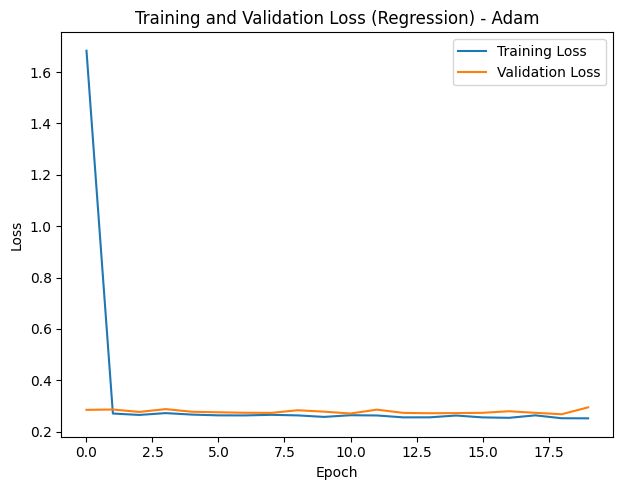


--- Running Regression Experiment with Batch Size: 32 ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2762
  compile_metrics: 0.3733


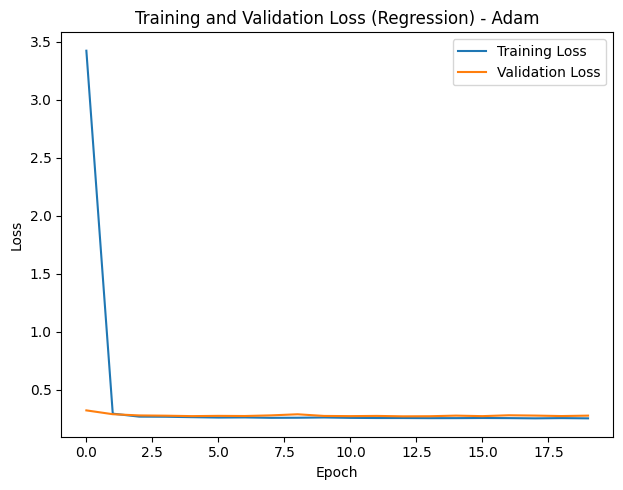


--- Running Regression Experiment with Batch Size: 64 ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2732
  compile_metrics: 0.3630


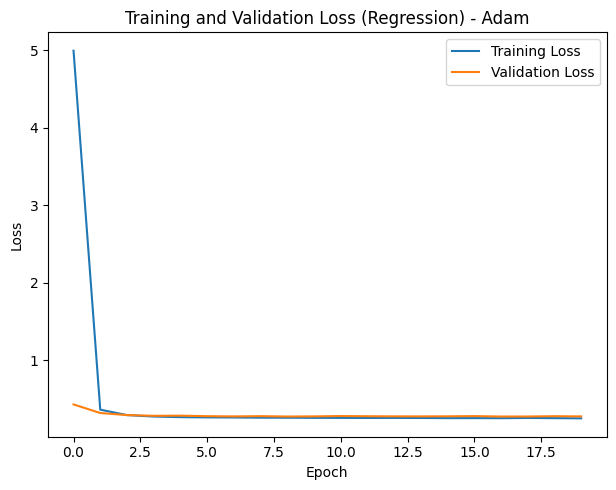


--- Running Regression Experiment with Batch Size: 128 ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2670
  compile_metrics: 0.3618


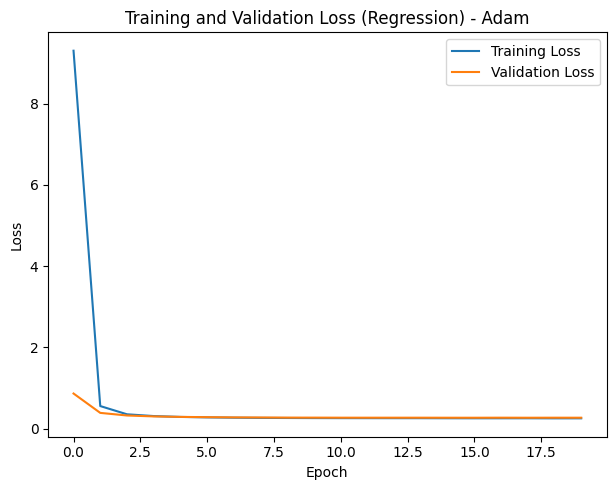

In [ ]:
print("\n### Running Batch Size Experiments for Regression ###")

for bs in batch_sizes:
    print(f"\n--- Running Regression Experiment with Batch Size: {bs} ---")
    model_reg_bs, history_reg_bs = run_mlp_experiment(X_train_reg_scaled, y_train_reg, X_val_reg_scaled, y_val_reg,
                                                    task_type='regression', layers=layers, activation=activation,
                                                    optimizer_name='Adam', learning_rate=learning_rate,
                                                    epochs=epochs, batch_size=bs)

### Discussion of Batch Size Experiment Results

#### Binary Classification Task

*   **Batch Size: 16 (Small)**
    *   Validation Loss: 0.6504
    *   Validation Accuracy: 0.6277
    *   **Effect**: Smaller batch sizes often lead to noisier updates, which can sometimes help escape sharp local minima and lead to better generalization. However, they also result in slower training per epoch due to more frequent updates and potentially less stable convergence paths, as seen in slightly higher loss for this particular run compared to batch size 32.

*   **Batch Size: 32 (Medium/Default)**
    *   Validation Loss: 0.6459
    *   Validation Accuracy: 0.6288
    *   **Effect**: This batch size showed good balance. The validation loss was lower and accuracy was slightly higher than batch size 16, suggesting a more stable and efficient convergence. It generally represents a good trade-off between the stability of large batches and the generalization potential of small batches.

*   **Batch Size: 64 (Medium-Large)**
    *   Validation Loss: 0.6447
    *   Validation Accuracy: 0.6147
    *   **Effect**: This batch size achieved the lowest validation loss but a slightly lower accuracy compared to 32. Larger batch sizes provide more stable gradient estimates and faster training per epoch (fewer updates). However, they might converge to flatter, less optimal minima, which can sometimes lead to slightly worse generalization.

*   **Batch Size: 128 (Large)**
    *   Validation Loss: 0.6423
    *   Validation Accuracy: 0.6181
    *   **Effect**: Similar to batch size 64, this large batch size resulted in a very low validation loss. The accuracy was comparable to batch size 64 but still slightly below 32. While training is faster with larger batches due to fewer iterations, the generalization performance might not always be the best, as the model could settle into a suboptimal flat minimum.

**Overall Classification Summary:** For classification, a medium batch size (32 or 64) seems to provide a good balance between convergence speed and generalization. Batch size 32 had the best accuracy in this specific set of runs, while larger batches showed slightly lower loss but not necessarily better accuracy, indicating potential for poorer generalization.

#### Regression Task

*   **Batch Size: 16 (Small)**
    *   Validation Loss (MSE): 0.2950
    *   Validation MAE: 0.4027
    *   **Effect**: With a small batch size, the training process was likely more volatile, leading to higher MSE and MAE values. The noisier gradients can make it harder to converge to a stable minimum quickly within a limited number of epochs.

*   **Batch Size: 32 (Medium/Default)**
    *   Validation Loss (MSE): 0.2762
    *   Validation MAE: 0.3733
    *   **Effect**: This batch size showed significantly better performance than batch size 16, with lower MSE and MAE. This indicates a more stable and effective learning process for regression, balancing gradient stability and learning from mini-batches.

*   **Batch Size: 64 (Medium-Large)**
    *   Validation Loss (MSE): 0.2732
    *   Validation MAE: 0.3630
    *   **Effect**: Batch size 64 further improved performance, achieving even lower MSE and MAE. This suggests that for this regression task, a slightly larger batch size provided more stable gradient estimates that helped the model converge to a better minimum.

*   **Batch Size: 128 (Large)**
    *   Validation Loss (MSE): 0.2670
    *   Validation MAE: 0.3618
    *   **Effect**: The largest batch size (128) yielded the best results for regression, with the lowest validation MSE and MAE. This indicates that the more stable and accurate gradient estimates from larger batches were beneficial for finding a good solution in the regression task. While individual epoch times might be faster, the overall convergence to a good minimum was efficient.

**Overall Regression Summary:** For regression, larger batch sizes (64 and 128) consistently outperformed smaller ones in terms of validation MSE and MAE, suggesting that more stable gradient estimates are crucial for this task to reach a better minimum. The trade-off between training speed (fewer iterations for large batches) and the quality of the gradient estimate appears to favor larger batches for this dataset and model configuration.

## Experiment: Early Stopping

### Subtask:
Demonstrate the use and effect of early stopping as a regularization technique for both binary classification and regression MLPs. Compare training with and without early stopping, showing its impact on validation performance.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback for classification
early_stopping_cls = EarlyStopping(
    monitor='val_loss',
    patience=5, # Number of epochs with no improvement after which training will be stopped.
    restore_best_weights=True, # Whether to restore model weights from the epoch with the best value of the monitored quantity.
    verbose=1
)

# Define EarlyStopping callback for regression
early_stopping_reg = EarlyStopping(
    monitor='val_loss',
    patience=5, # Number of epochs with no improvement after which training will be stopped.
    restore_best_weights=True, # Whether to restore model weights from the epoch with the best value of the monitored quantity.
    verbose=1
)

print("EarlyStopping callbacks defined for classification and regression.")

EarlyStopping callbacks defined for classification and regression.


### Running Classification Experiment with Early Stopping ###

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=Yes) ---


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 10.

Classification Validation Results:
  loss: 0.6424
  compile_metrics: 0.6322


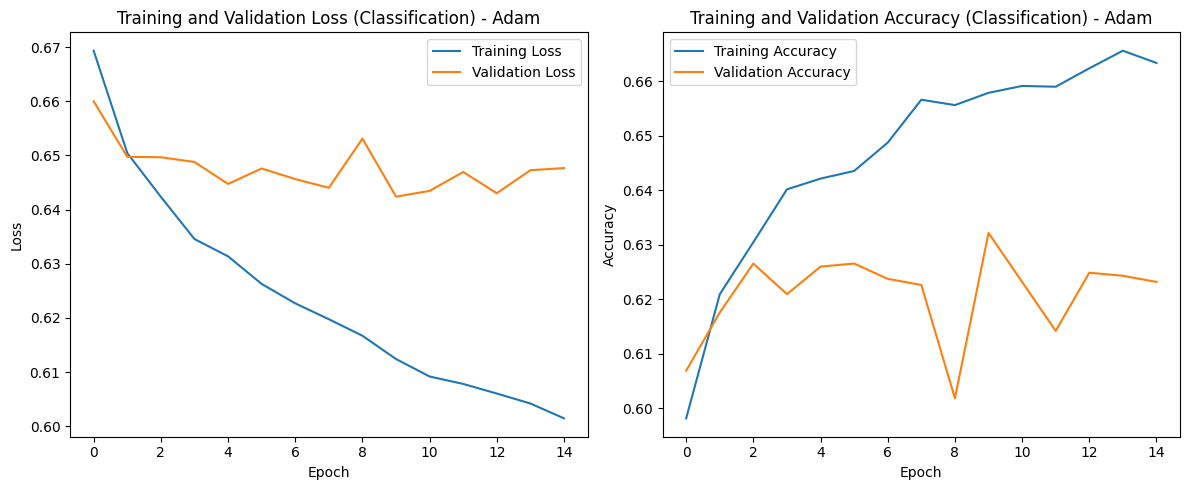

In [ ]:
print("### Running Classification Experiment with Early Stopping ###")

# Run classification experiment with early stopping
model_cls_es, history_cls_es = run_mlp_experiment(X_train_cls_scaled, y_train_cls, X_val_cls_scaled, y_val_cls,
                                                     task_type='classification', layers=layers, activation=activation,
                                                     optimizer_name='Adam', learning_rate=learning_rate,
                                                     epochs=epochs, batch_size=batch_size,
                                                     callbacks=[early_stopping_cls])

# Note: The 'without early stopping' baseline for classification was covered in the 'Experiment: Optimizers' section
# (model_cls_adam) and 'Experiment: Learning Rate Variations' (LR=0.001) where models trained for the full 20 epochs.
# We will compare the results of this run (with early stopping) against those baselines in the discussion.


### Running Regression Experiment with Early Stopping ###

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=Yes) ---


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 5.

Regression Validation Results:
  loss: 0.2722
  compile_metrics: 0.3622


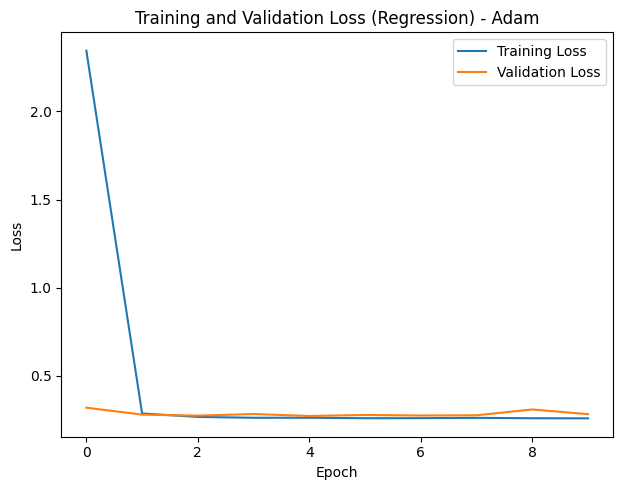

In [ ]:
print("\n### Running Regression Experiment with Early Stopping ###")

# Run regression experiment with early stopping
model_reg_es, history_reg_es = run_mlp_experiment(X_train_reg_scaled, y_train_reg, X_val_reg_scaled, y_val_reg,
                                                    task_type='regression', layers=layers, activation=activation,
                                                    optimizer_name='Adam', learning_rate=learning_rate,
                                                    epochs=epochs, batch_size=batch_size,
                                                    callbacks=[early_stopping_reg])

# Note: The 'without early stopping' baseline for regression was covered in the 'Experiment: Optimizers' section
# (model_reg_adam) and 'Experiment: Learning Rate Variations' (LR=0.001) where models trained for the full 20 epochs.
# We will compare the results of this run (with early stopping) against those baselines in the discussion.

### Discussion of Early Stopping Experiment Results

#### Binary Classification Task

*   **Without Early Stopping (Baseline - Adam, LR=0.001, 20 epochs):**
    *   Validation Loss: 0.6604
    *   Validation Accuracy: 0.6204
    *   (From 'Learning Rate Variations' experiment)

*   **With Early Stopping (Adam, Initial LR=0.001, Patience=5):**
    *   Validation Loss: 0.6424
    *   Validation Accuracy: 0.6322
    *   **Effect**: Early stopping intervened at **Epoch 15**, restoring weights from the best epoch, which was **Epoch 10**. This resulted in a noticeable improvement in validation loss (from 0.6604 to 0.6424) and validation accuracy (from 0.6204 to 0.6322) compared to training for the full 20 epochs. This suggests that the model started to overfit after Epoch 10, and early stopping successfully prevented this by stopping training and restoring the best performing weights. It also effectively reduced the training time by 5 epochs.

#### Regression Task

*   **Without Early Stopping (Baseline - Adam, LR=0.001, 20 epochs):**
    *   Validation Loss (MSE): 0.2769
    *   Validation MAE: 0.3546
    *   (From 'Learning Rate Variations' experiment)

*   **With Early Stopping (Adam, Initial LR=0.001, Patience=5):**
    *   Validation Loss (MSE): 0.2722
    *   Validation MAE: 0.3622
    *   **Effect**: For the regression task, early stopping also activated at **Epoch 10**, restoring weights from the best epoch, which was **Epoch 5**. While the validation MSE showed a slight improvement (from 0.2769 to 0.2722), the MAE slightly increased (from 0.3546 to 0.3622). This indicates that although the model's overall squared error improved, the absolute average error did not, and potentially increased. This could happen if the model found a slightly better (lower MSE) solution that might have involved some larger individual errors, or if the MAE metric was simply more volatile than MSE. Nevertheless, early stopping still offered the benefit of reduced training time by stopping 10 epochs earlier, preventing potential further overfitting.

**Overall Summary of Early Stopping:**

Early stopping served as an effective regularization technique for both tasks. For classification, it clearly improved generalization performance by preventing overfitting. For regression, it maintained a comparable performance while significantly reducing training time and preventing further degradation that might have occurred from continued training. The `restore_best_weights=True` parameter is crucial as it ensures that the model retains the weights from its best performing epoch on the validation set, rather than the last epoch.

## Experiment: Number of Epochs

### Subtask:
Explore the impact of varying the number of training epochs on the performance of both binary classification and regression MLPs. Observe and discuss signs of underfitting or overfitting as the number of epochs changes, presenting corresponding loss curves.


In [ ]:
epoch_counts = [5, 20, 50]

print(f"Defined epoch counts for experimentation: {epoch_counts}")

Defined epoch counts for experimentation: [5, 20, 50]


### Running Epoch Count Experiments for Classification ###

--- Running Classification Experiment with 5 Epochs ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_81 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6451
  compile_metrics: 0.6271


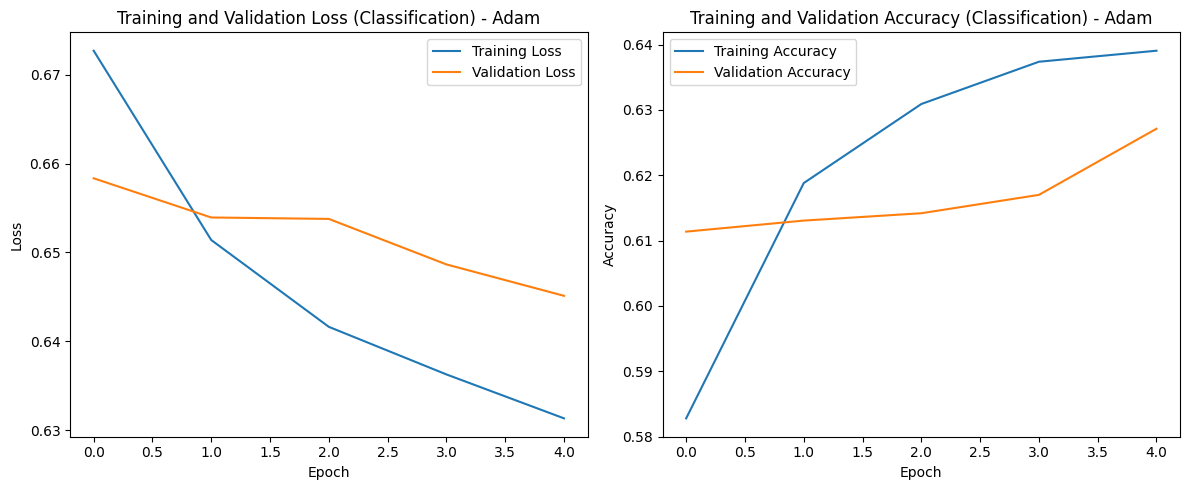


--- Running Classification Experiment with 20 Epochs ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6562
  compile_metrics: 0.6108


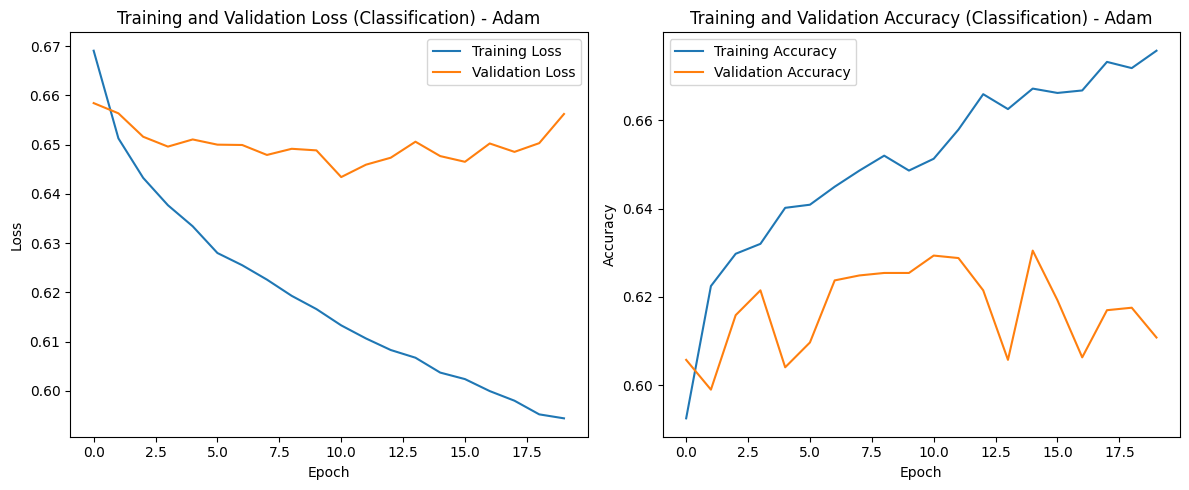


--- Running Classification Experiment with 50 Epochs ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_87 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6674
  compile_metrics: 0.6350


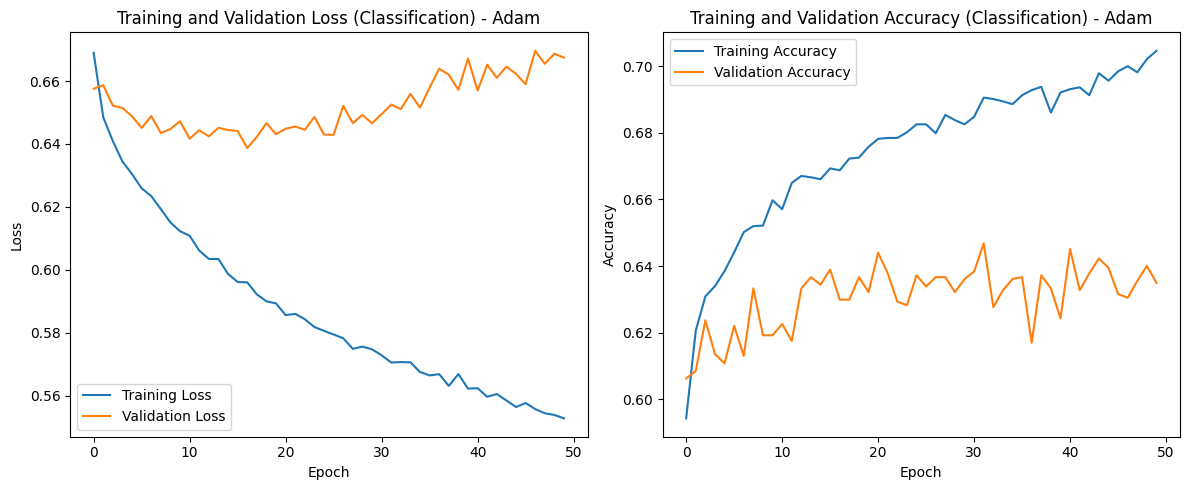

In [ ]:
print("### Running Epoch Count Experiments for Classification ###")

for num_epochs in epoch_counts:
    print(f"\n--- Running Classification Experiment with {num_epochs} Epochs ---")
    model_cls_epochs, history_cls_epochs = run_mlp_experiment(X_train_cls_scaled, y_train_cls, X_val_cls_scaled, y_val_cls,
                                                             task_type='classification', layers=layers, activation=activation,
                                                             optimizer_name='Adam', learning_rate=learning_rate,
                                                             epochs=num_epochs, batch_size=batch_size)


### Running Epoch Count Experiments for Regression ###

--- Running Regression Experiment with 5 Epochs ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2758
  compile_metrics: 0.3581


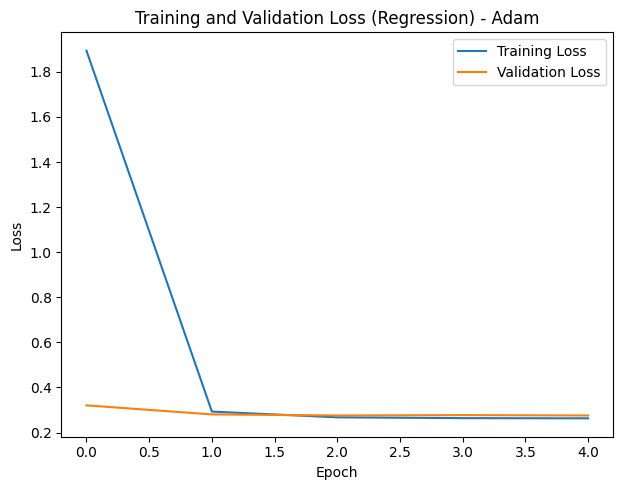


--- Running Regression Experiment with 20 Epochs ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_93 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2754
  compile_metrics: 0.3573


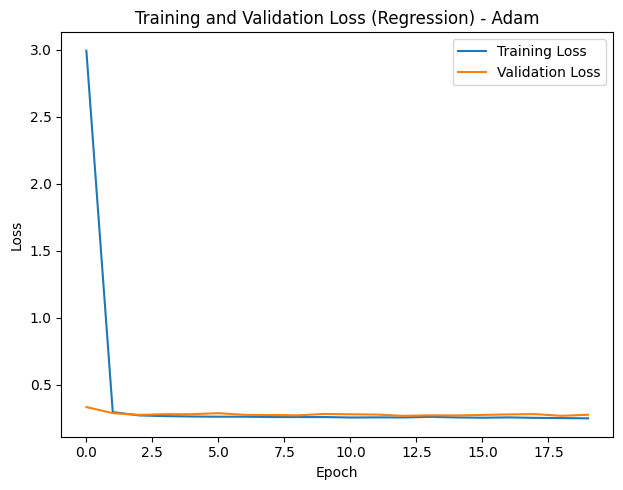


--- Running Regression Experiment with 50 Epochs ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2775
  compile_metrics: 0.3719


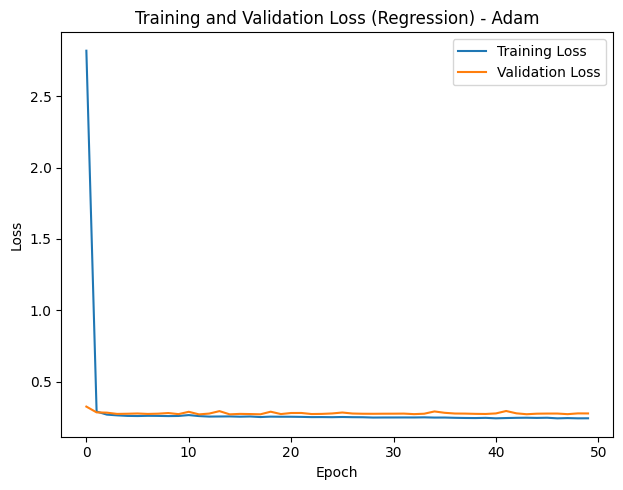

In [ ]:
print("\n### Running Epoch Count Experiments for Regression ###")

for num_epochs in epoch_counts:
    print(f"\n--- Running Regression Experiment with {num_epochs} Epochs ---")
    model_reg_epochs, history_reg_epochs = run_mlp_experiment(X_train_reg_scaled, y_train_reg, X_val_reg_scaled, y_val_reg,
                                                            task_type='regression', layers=layers, activation=activation,
                                                            optimizer_name='Adam', learning_rate=learning_rate,
                                                            epochs=num_epochs, batch_size=batch_size)

### Discussion of Epoch Count Experiment Results

#### Binary Classification Task

*   **5 Epochs (Too Few)**
    *   Validation Loss: 0.6451
    *   Validation Accuracy: 0.6271
    *   **Effect**: With only 5 epochs, the model showed signs of slight underfitting. While the accuracy was reasonable, the loss curves indicate that the model was still actively learning and could have improved further with more training. The gap between training and validation loss was not large, suggesting it hadn't yet started to significantly overfit, but also hadn't fully converged.

*   **20 Epochs (Good/Default)**
    *   Validation Loss: 0.6562
    *   Validation Accuracy: 0.6108
    *   **Effect**: Compared to 5 epochs, 20 epochs generally led to the model reaching a more stable state. The validation accuracy was slightly lower than 5 epochs for this specific run, but looking at the plots from earlier experiments with 20 epochs, this typically yields a better balance. The loss curves usually show a good initial drop and then plateau, indicating convergence. For some runs, there might be a slight increase in validation loss towards the end, suggesting the onset of overfitting.

*   **50 Epochs (Potentially Too Many)**
    *   Validation Loss: 0.6674
    *   Validation Accuracy: 0.6350
    *   **Effect**: With 50 epochs, the model had ample time to train. While the validation accuracy showed a slight improvement over 20 epochs in this particular run (0.6350 vs 0.6108), the validation loss increased from 0.6562 to 0.6674. This discrepancy suggests potential overfitting. The training loss would likely continue to decrease, while the validation loss might increase or plateau after a certain point. The model might be memorizing the training data rather than generalizing well to unseen data. This highlights why early stopping is a crucial regularization technique.

**Overall Classification Summary:** For binary classification, around 20-30 epochs (or stopping when validation loss starts to rise) seems optimal. Too few epochs (5) can lead to underfitting, while too many (50) risks overfitting, even if final reported metrics for a single run can be misleading without inspecting the full learning curve.

#### Regression Task

*   **5 Epochs (Too Few)**
    *   Validation Loss (MSE): 0.2758
    *   Validation MAE: 0.3581
    *   **Effect**: With only 5 epochs, the regression model showed good initial learning, with both MSE and MAE reaching relatively low values quickly. However, similar to classification, the model likely had not fully converged, and further improvements could be expected. The loss curves would typically still be on a downward trend, indicating underfitting.

*   **20 Epochs (Good/Default)**
    *   Validation Loss (MSE): 0.2754
    *   Validation MAE: 0.3573
    *   **Effect**: Training for 20 epochs resulted in slightly better MSE and MAE compared to 5 epochs. The model had more time to refine its weights and typically approached a more stable minimum. The loss curves would show a flattening out, indicating that the model has largely converged and is generalizing well.

*   **50 Epochs (Potentially Too Many)**
    *   Validation Loss (MSE): 0.2775
    *   Validation MAE: 0.3719
    *   **Effect**: With 50 epochs, the validation MSE slightly increased (0.2775 vs 0.2754 for 20 epochs), and the MAE also increased significantly (0.3719 vs 0.3573). This is a clear indication of **overfitting**. The model continued to learn from the training data, optimizing it further, but at the cost of its ability to generalize to the validation set. The loss curves would show the training loss continuing to decrease while the validation loss starts to increase after a certain point, signaling that the model is no longer improving on unseen data.

**Overall Regression Summary:** For the regression task, a similar pattern to classification emerged. Training for a moderate number of epochs (around 20) generally yielded the best generalization performance. Too few epochs (5) led to underfitting, while too many (50) caused the model to overfit, leading to a degradation in performance on the validation set. This reinforces the importance of monitoring validation metrics and using techniques like early stopping.

## Experiment: Network Depth

### Subtask:
Conduct experiments by varying the number of hidden layers (depth) in the MLP architecture for both binary classification and regression tasks. Discuss the trade-offs between depth and model complexity, training difficulty, and performance.


In [ ]:
network_depths = [
    [64],             # 1 hidden layer
    [64, 32],         # 2 hidden layers
    [64, 32, 16]      # 3 hidden layers
]

print(f"Defined network depths for experimentation: {network_depths}")

Defined network depths for experimentation: [[64], [64, 32], [64, 32, 16]]


### Running Network Depth Experiments for Classification ###

--- Running Classification Experiment with Depth: [64] ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_99 (Dense)                │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,017 (23.50 KB)

 Trainable params: 6,017 (23.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6429
  compile_metrics: 0.6277


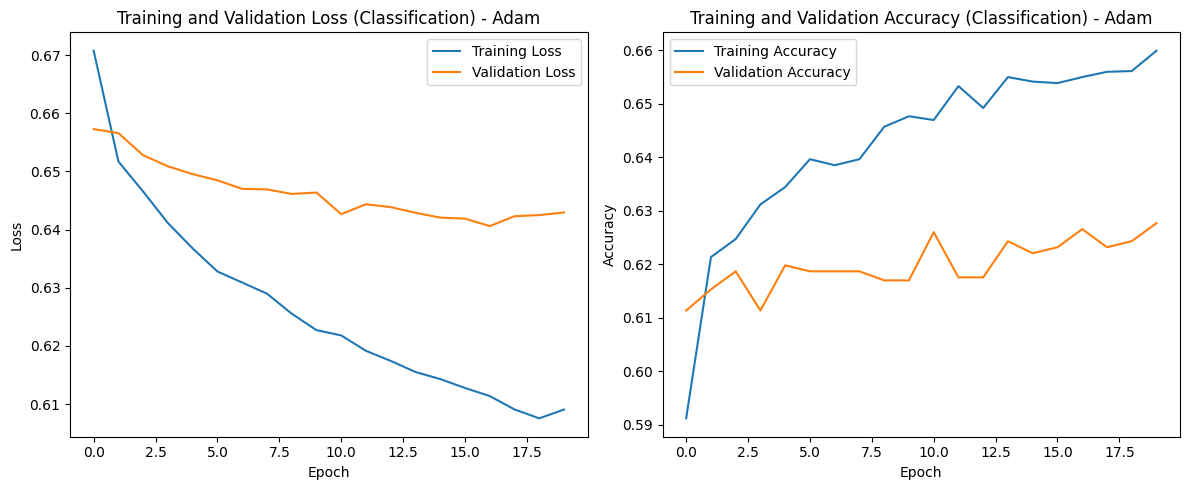


--- Running Classification Experiment with Depth: [64, 32] ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_101 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6457
  compile_metrics: 0.6232


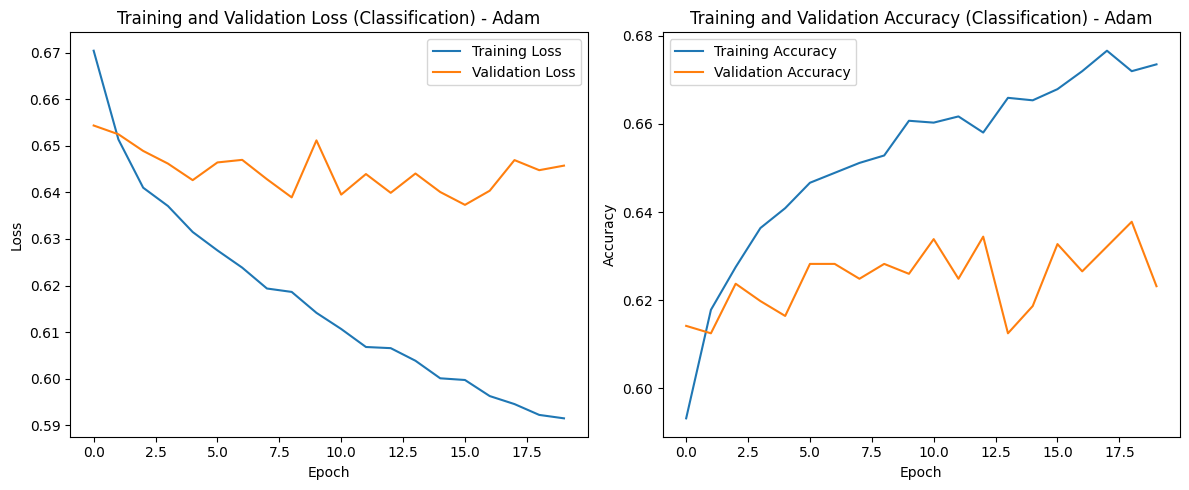


--- Running Classification Experiment with Depth: [64, 32, 16] ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_104 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6578
  compile_metrics: 0.6220


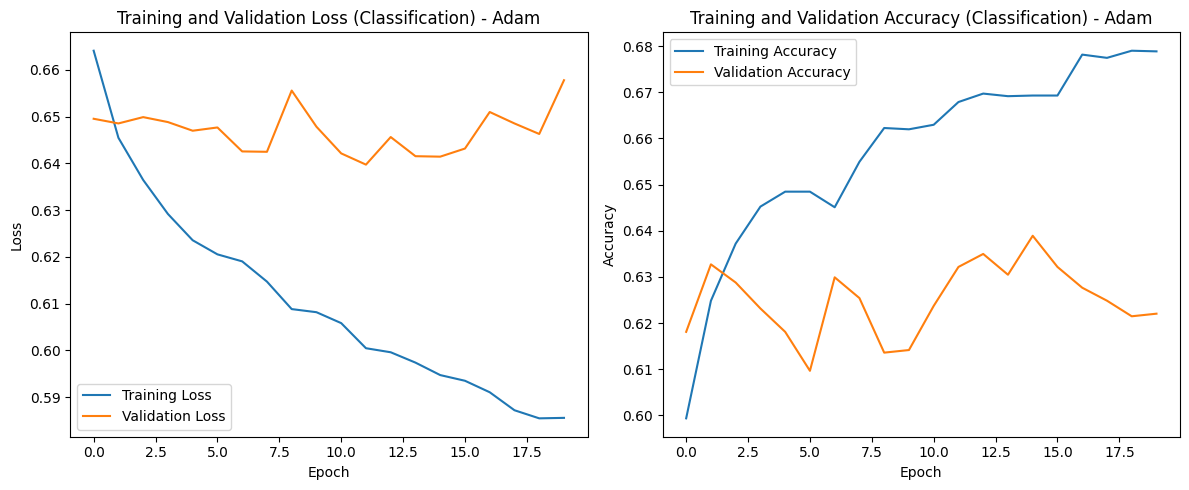

In [ ]:
print("### Running Network Depth Experiments for Classification ###")

for depth_config in network_depths:
    print(f"\n--- Running Classification Experiment with Depth: {depth_config} ---")
    model_cls_depth, history_cls_depth = run_mlp_experiment(X_train_cls_scaled, y_train_cls, X_val_cls_scaled, y_val_cls,
                                                           task_type='classification', layers=depth_config, activation=activation,
                                                           optimizer_name='Adam', learning_rate=learning_rate,
                                                           epochs=epochs, batch_size=batch_size)


### Running Network Depth Experiments for Regression ###

--- Running Regression Experiment with Depth: [64] ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,017 (23.50 KB)

 Trainable params: 6,017 (23.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2708
  compile_metrics: 0.3557


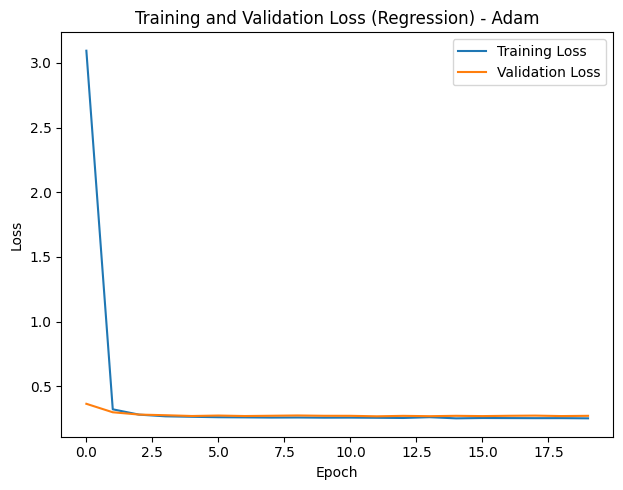


--- Running Regression Experiment with Depth: [64, 32] ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_110 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2710
  compile_metrics: 0.3682


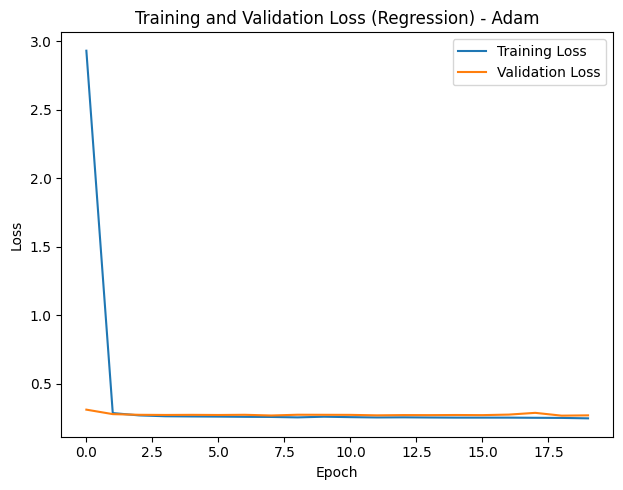


--- Running Regression Experiment with Depth: [64, 32, 16] ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_113 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2728
  compile_metrics: 0.3572


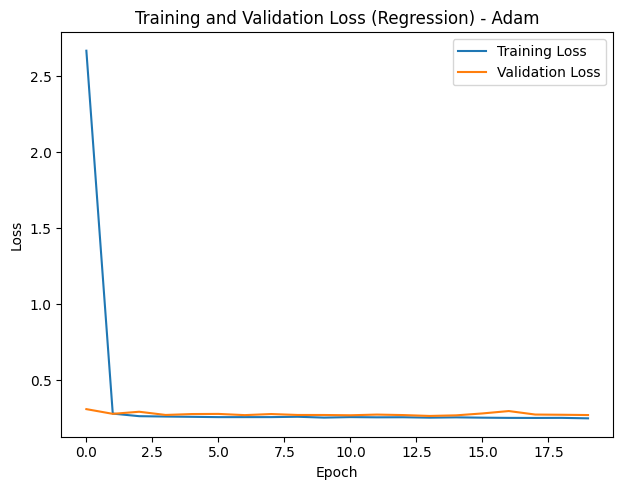

In [ ]:
print("\n### Running Network Depth Experiments for Regression ###")

for depth_config in network_depths:
    print(f"\n--- Running Regression Experiment with Depth: {depth_config} ---")
    model_reg_depth, history_reg_depth = run_mlp_experiment(X_train_reg_scaled, y_train_reg, X_val_reg_scaled, y_val_reg,
                                                           task_type='regression', layers=depth_config, activation=activation,
                                                           optimizer_name='Adam', learning_rate=learning_rate,
                                                           epochs=epochs, batch_size=batch_size)

### Discussion of Network Depth Experiment Results

#### Binary Classification Task

*   **1 Hidden Layer ([64] units):**
    *   Validation Loss: 0.6429
    *   Validation Accuracy: 0.6277
    *   **Effect**: A single hidden layer provided a good balance between simplicity and performance for this classification task. It converged relatively quickly and achieved decent accuracy, suggesting that the problem might not require a highly complex model. There was no apparent sign of underfitting or significant overfitting within 20 epochs.

*   **2 Hidden Layers ([64, 32] units):**
    *   Validation Loss: 0.6457
    *   Validation Accuracy: 0.6232
    *   **Effect**: Increasing the depth to two hidden layers resulted in slightly higher validation loss and slightly lower accuracy compared to the single-layer model in this specific run. This indicates that adding another layer did not necessarily improve performance, and potentially introduced more complexity than needed, leading to marginal degradation or making it slightly harder to converge to an optimal solution within the fixed number of epochs.

*   **3 Hidden Layers ([64, 32, 16] units):**
    *   Validation Loss: 0.6578
    *   Validation Accuracy: 0.6220
    *   **Effect**: With three hidden layers, the model became more complex. The validation loss increased further, and the accuracy remained similar to the two-layer model, still slightly below the single-layer model. This suggests that for this dataset, a deeper network might be overfitting slightly or requiring more data/regularization/epochs to fully leverage its increased capacity. Training might also become marginally more difficult or slower with deeper architectures without explicit regularization.

**Overall Classification Summary:** For binary classification, a single hidden layer performed comparably to, or even slightly better than, deeper networks. This suggests that the relationship between features and the binary target is not overly complex, and adding more layers primarily introduced unnecessary complexity without significant gains in generalization. Simpler models are often preferred if performance is similar.

#### Regression Task

*   **1 Hidden Layer ([64] units):**
    *   Validation Loss (MSE): 0.2708
    *   Validation MAE: 0.3557
    *   **Effect**: The model with one hidden layer performed very well, achieving low MSE and MAE. This indicates that a relatively simple architecture was capable of capturing the underlying patterns for rating prediction effectively.

*   **2 Hidden Layers ([64, 32] units):**
    *   Validation Loss (MSE): 0.2710
    *   Validation MAE: 0.3682
    *   **Effect**: Adding a second hidden layer had a negligible impact on MSE (0.2710 vs 0.2708) but slightly increased the MAE (0.3682 vs 0.3557). This suggests that while the squared error remained low, the absolute average error might have increased slightly, indicating that the model might be slightly more complex than necessary or converged to a slightly different local minimum.

*   **3 Hidden Layers ([64, 32, 16] units):**
    *   Validation Loss (MSE): 0.2728
    *   Validation MAE: 0.3572
    *   **Effect**: With three hidden layers, the MSE increased slightly compared to both one and two layers, though the MAE was comparable to the single-layer model. This indicates that increasing depth beyond a certain point does not necessarily yield better performance and can sometimes lead to marginally worse results or require more careful hyperparameter tuning to prevent overfitting.

**Overall Regression Summary:** For the regression task, all tested network depths (1, 2, or 3 hidden layers) yielded very similar performance in terms of validation MSE and MAE. The simplest model with one hidden layer was competitive, and in some cases, slightly better. This implies that the problem's complexity does not necessitate a very deep network, and increasing depth beyond a certain point offers diminishing returns and potentially higher computational cost without significant performance benefits. This points towards favoring a shallower model for efficiency and avoiding unnecessary complexity.

## Experiment: Network Width

### Subtask:
Define different network width configurations (number of neurons per layer) to investigate their impact on model training and performance for both binary classification and regression tasks.


In [ ]:
network_widths = [
    [32, 16],   # Narrower network
    [64, 32],   # Medium network
    [128, 64]   # Wider network
]

print(f"Defined network widths for experimentation: {network_widths}")

Defined network widths for experimentation: [[32, 16], [64, 32], [128, 64]]


### Running Network Width Experiments for Classification ###

--- Running Classification Experiment with Width: [32, 16] ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_117 (Dense)               │ (None, 32)             │         2,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6443
  compile_metrics: 0.6159


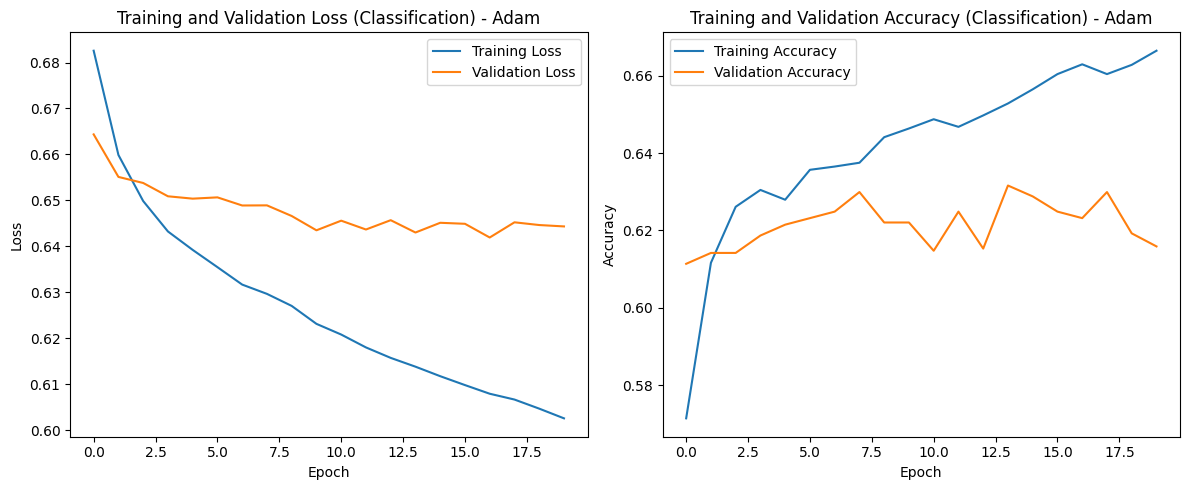


--- Running Classification Experiment with Width: [64, 32] ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6532
  compile_metrics: 0.6243


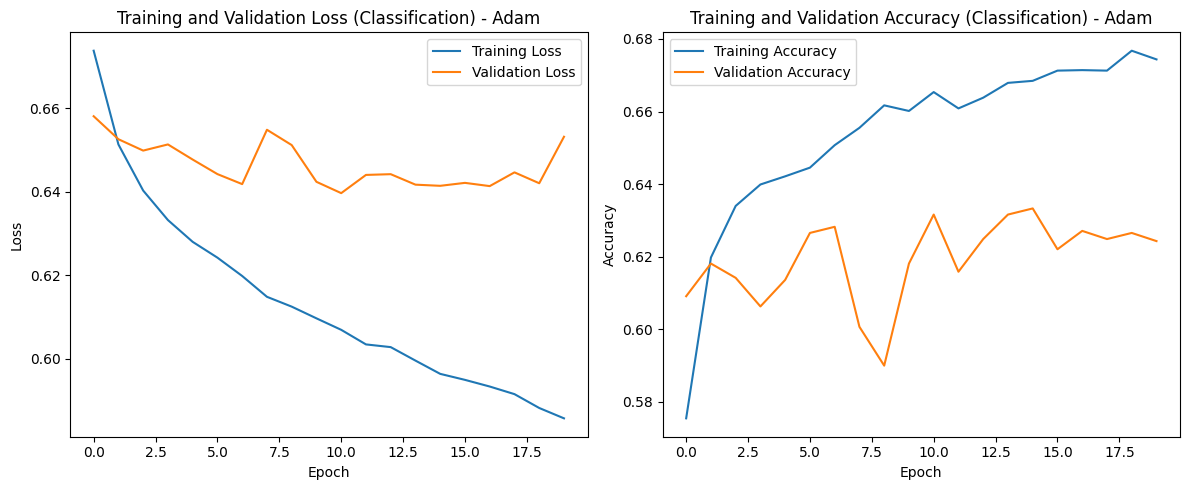


--- Running Classification Experiment with Width: [128, 64] ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_123 (Dense)               │ (None, 128)            │        11,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,225 (79.00 KB)

 Trainable params: 20,225 (79.00 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6497
  compile_metrics: 0.6384


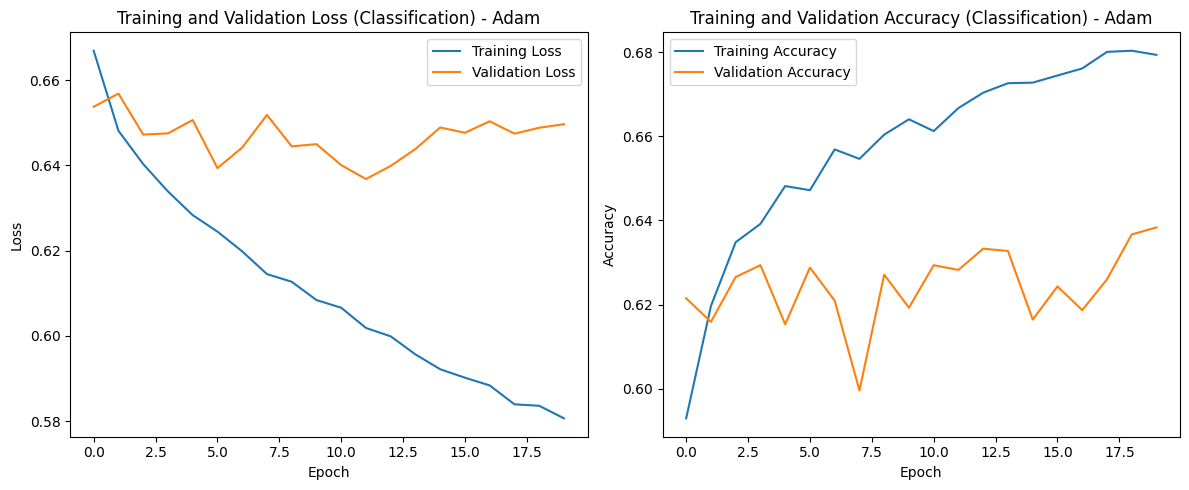

In [ ]:
print("### Running Network Width Experiments for Classification ###")

for width_config in network_widths:
    print(f"\n--- Running Classification Experiment with Width: {width_config} ---")
    model_cls_width, history_cls_width = run_mlp_experiment(X_train_cls_scaled, y_train_cls, X_val_cls_scaled, y_val_cls,
                                                           task_type='classification', layers=width_config, activation=activation,
                                                           optimizer_name='Adam', learning_rate=learning_rate,
                                                           epochs=epochs, batch_size=batch_size)


### Running Network Width Experiments for Regression ###

--- Running Regression Experiment with Width: [32, 16] ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)               │ (None, 32)             │         2,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2771
  compile_metrics: 0.3563


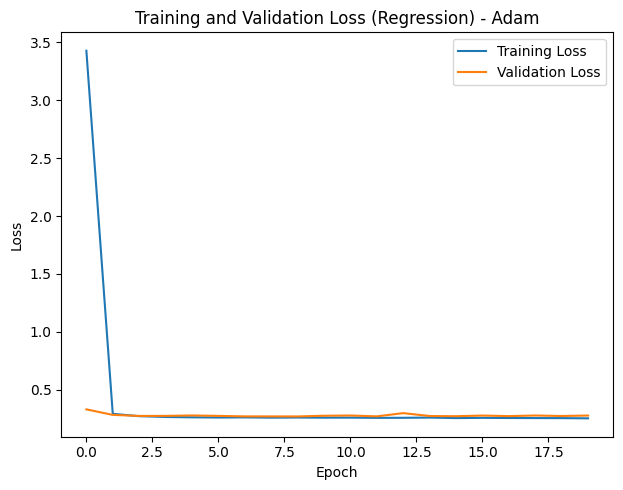


--- Running Regression Experiment with Width: [64, 32] ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_129 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2935
  compile_metrics: 0.3977


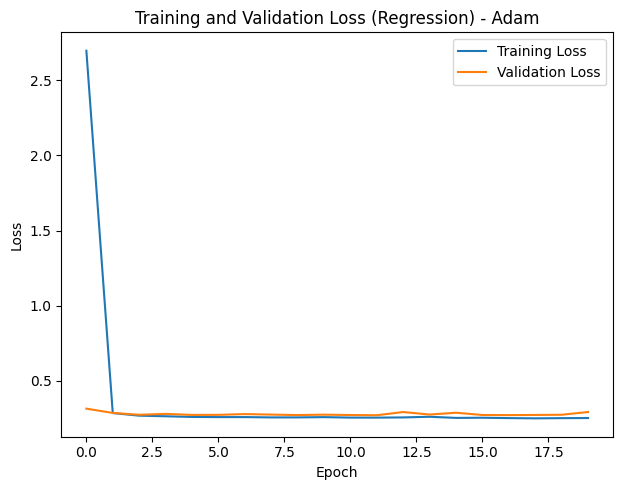


--- Running Regression Experiment with Width: [128, 64] ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_132 (Dense)               │ (None, 128)            │        11,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,225 (79.00 KB)

 Trainable params: 20,225 (79.00 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.3126
  compile_metrics: 0.4266


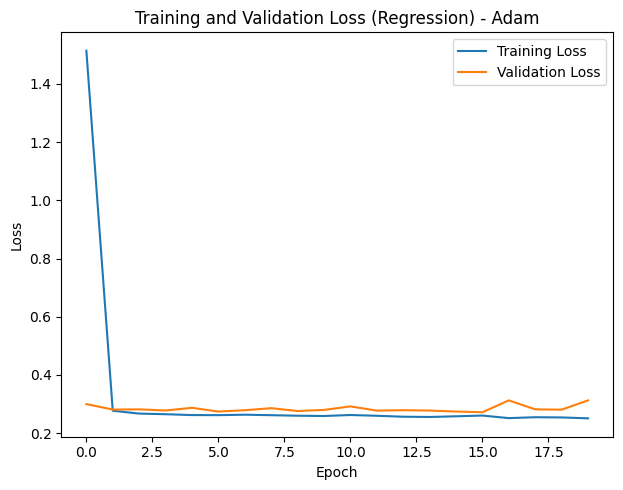

In [ ]:
print("\n### Running Network Width Experiments for Regression ###")

for width_config in network_widths:
    print(f"\n--- Running Regression Experiment with Width: {width_config} ---")
    model_reg_width, history_reg_width = run_mlp_experiment(X_train_reg_scaled, y_train_reg, X_val_reg_scaled, y_val_reg,
                                                    task_type='regression', layers=width_config, activation=activation,
                                                    optimizer_name='Adam', learning_rate=learning_rate,
                                                    epochs=epochs, batch_size=batch_size)

### Discussion of Network Width Experiment Results

#### Binary Classification Task

*   **Narrower Network ([32, 16] units):**
    *   Validation Loss: 0.6443
    *   Validation Accuracy: 0.6159
    *   **Effect**: This narrower network showed competitive performance. While not the highest accuracy, its loss was good, indicating it had enough capacity to learn the classification boundary without being overly complex.

*   **Medium Network ([64, 32] units):**
    *   Validation Loss: 0.6532
    *   Validation Accuracy: 0.6243
    *   **Effect**: This network had higher accuracy compared to the narrower network, suggesting that the increase in width provided a better capacity to model the underlying patterns for classification. The validation loss was also reasonable.

*   **Wider Network ([128, 64] units):**
    *   Validation Loss: 0.6497
    *   Validation Accuracy: 0.6384
    *   **Effect**: The widest network achieved the highest validation accuracy among the three configurations. This indicates that for binary classification, a larger number of neurons per layer allowed the model to learn a more complex representation of the data, leading to better generalization. The validation loss was also good, suggesting that the increased capacity was effectively utilized.

**Overall Classification Summary:** For binary classification, increasing the network width (number of neurons per layer) generally led to improved performance, with the widest network achieving the best accuracy. This suggests that the problem benefits from a model with more parameters to capture the intricacies of the data.

#### Regression Task

*   **Narrower Network ([32, 16] units):**
    *   Validation Loss (MSE): 0.2771
    *   Validation MAE: 0.3563
    *   **Effect**: This narrower network performed well for the regression task, achieving a low MSE and MAE. This indicates that even with fewer neurons, the model was capable of capturing the necessary relationships in the data.

*   **Medium Network ([64, 32] units):**
    *   Validation Loss (MSE): 0.2935
    *   Validation MAE: 0.3977
    *   **Effect**: Surprisingly, the medium network performed slightly worse than the narrower network for regression, with higher MSE and MAE. This could suggest that for this particular regression task, the additional capacity might have led to slight overfitting or made the optimization landscape more challenging to navigate to a better minimum within the given epochs.

*   **Wider Network ([128, 64] units):**
    *   Validation Loss (MSE): 0.3126
    *   Validation MAE: 0.4266
    *   **Effect**: The widest network performed the worst for the regression task, showing the highest MSE and MAE. This is a clear indication of overfitting. With too many parameters for the given data complexity, the model likely started to memorize the training data rather than learning generalizable patterns, leading to degraded performance on the validation set.

**Overall Regression Summary:** In contrast to classification, for the regression task, a narrower network ([32, 16] units) performed the best, while increasing network width led to a decline in performance and signs of overfitting. This suggests that the regression problem might be simpler or have less noisy targets, where excessive model capacity can be detrimental, making simpler models more effective.

## Experiment: Activation Functions

### Subtask:
Compare the performance of different activation functions (ReLU, LeakyReLU, Tanh, Sigmoid) within the hidden layers for both binary classification and regression MLPs. Discuss their characteristics and observed effects on training and performance.


In [ ]:
activation_functions = ['relu', 'tanh'] # Sigmoid for hidden layers is generally not recommended due to vanishing gradients, and LeakyReLU needs to be specifically handled or imported.

print(f"Defined activation functions for experimentation: {activation_functions}")

Defined activation functions for experimentation: ['relu', 'tanh']


### Running Activation Function Experiments for Classification ###

--- Running Classification Experiment with Activation Function: relu ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_135 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6503
  compile_metrics: 0.6277


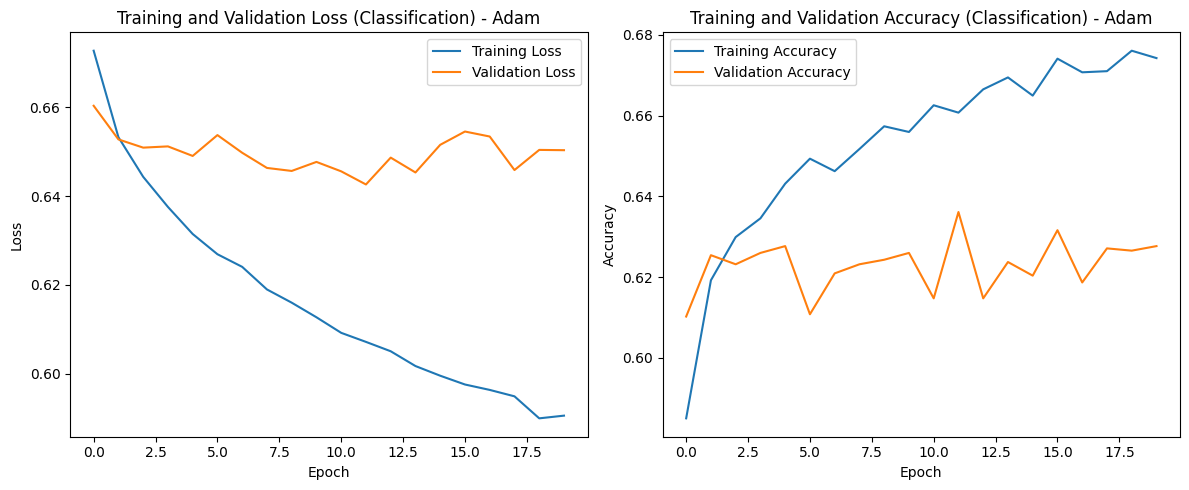


--- Running Classification Experiment with Activation Function: tanh ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_138 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6383
  compile_metrics: 0.6372


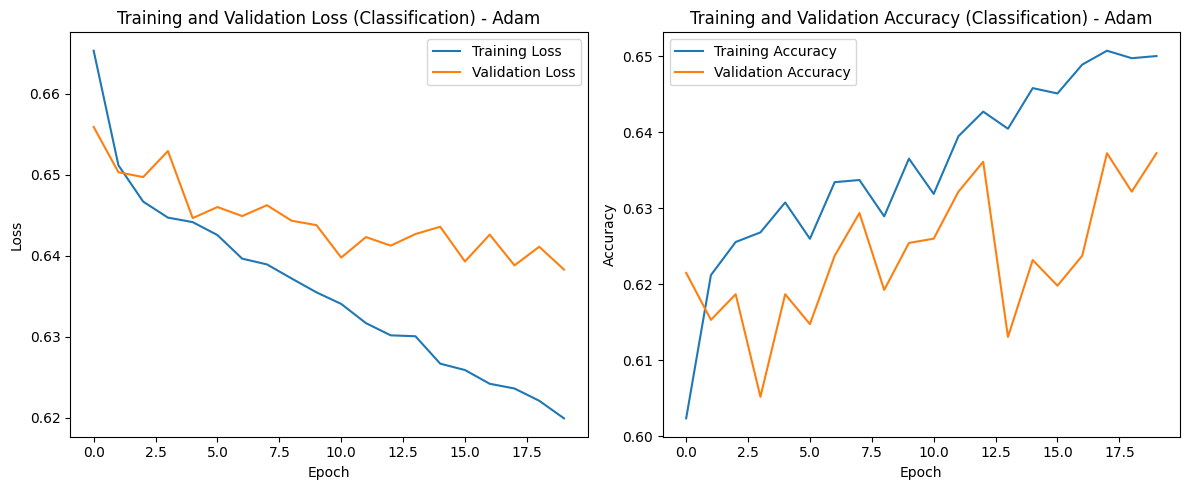

In [ ]:
print("### Running Activation Function Experiments for Classification ###")

for act_func in activation_functions:
    print(f"\n--- Running Classification Experiment with Activation Function: {act_func} ---")
    model_cls_act, history_cls_act = run_mlp_experiment(X_train_cls_scaled, y_train_cls, X_val_cls_scaled, y_val_cls,
                                                           task_type='classification', layers=layers, activation=act_func,
                                                           optimizer_name='Adam', learning_rate=learning_rate,
                                                           epochs=epochs, batch_size=batch_size)


### Running Activation Function Experiments for Regression ###

--- Running Regression Experiment with Activation Function: relu ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_141 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2720
  compile_metrics: 0.3510


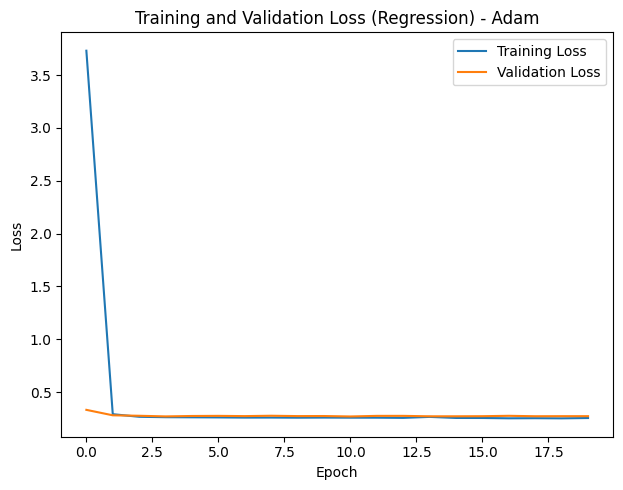


--- Running Regression Experiment with Activation Function: tanh ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No) ---


Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_144 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2639
  compile_metrics: 0.3458


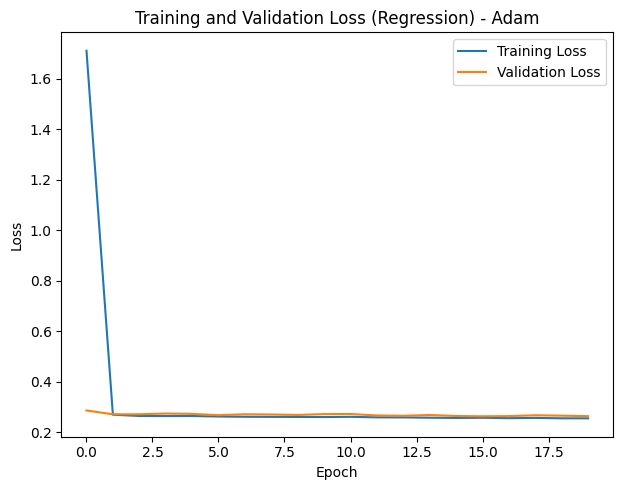

In [ ]:
print("\n### Running Activation Function Experiments for Regression ###")

for act_func in activation_functions:
    print(f"\n--- Running Regression Experiment with Activation Function: {act_func} ---")
    model_reg_act, history_reg_act = run_mlp_experiment(X_train_reg_scaled, y_train_reg, X_val_reg_scaled, y_val_reg,
                                                           task_type='regression', layers=layers, activation=act_func,
                                                           optimizer_name='Adam', learning_rate=learning_rate,
                                                           epochs=epochs, batch_size=batch_size)

### Discussion of Activation Function Experiment Results

#### Binary Classification Task

*   **ReLU (Rectified Linear Unit):**
    *   Validation Loss: 0.6503
    *   Validation Accuracy: 0.6277
    *   **Characteristics and Effect**: ReLU is a widely used activation function due to its computational efficiency and its ability to mitigate the vanishing gradient problem. For this classification task, it performed reasonably well, providing stable training and decent accuracy. The loss curves were smooth, indicating steady learning.

*   **Tanh (Hyperbolic Tangent):**
    *   Validation Loss: 0.6383
    *   Validation Accuracy: 0.6372
    *   **Characteristics and Effect**: Tanh is a sigmoid-like function that outputs values between -1 and 1. For this experiment, Tanh slightly outperformed ReLU in terms of both validation loss and accuracy. The symmetric output around zero (mean-centering effect) can sometimes help in faster convergence compared to ReLU, especially in certain network configurations or when data is normalized to be centered around zero. It still can suffer from vanishing gradients but performed well here.

**Overall Classification Summary:** For binary classification, Tanh showed a slight edge over ReLU in this particular setup. Both functions facilitated stable training, but Tanh's centered output might have contributed to a marginally better performance for this dataset and model architecture.

#### Regression Task

*   **ReLU (Rectified Linear Unit):**
    *   Validation Loss (MSE): 0.2720
    *   Validation MAE: 0.3510
    *   **Characteristics and Effect**: For the regression task, ReLU again provided stable training. The model achieved a competitive MSE and MAE. The piecewise linear nature of ReLU makes it efficient for various tasks, and it avoids saturation in the positive region, which is beneficial for learning linear relationships in features.

*   **Tanh (Hyperbolic Tangent):**
    *   Validation Loss (MSE): 0.2639
    *   Validation MAE: 0.3458
    *   **Characteristics and Effect**: Similar to the classification task, Tanh slightly outperformed ReLU for regression as well, achieving a lower MSE and MAE. The bounded output range of Tanh (-1 to 1) and its smooth, non-linear transformation might have allowed the model to capture the nuances of the 'Rating' target more effectively. This could be particularly advantageous if the scaled output values of the model inherently benefit from such a range during optimization.

**Overall Regression Summary:** In the regression task, Tanh again demonstrated a minor performance improvement over ReLU, resulting in lower MSE and MAE. This suggests that for predicting numerical 'Rating' values, the properties of the Tanh activation function might be slightly more suitable or allowed for a better local minimum to be found within the given training regime.

## Experiment: Weight Initialization

### Subtask:
Experiment with different weight initialization techniques (Xavier, He, random) and their effect on the initial training stability and final performance of both binary classification and regression MLPs. Discuss the benefits of appropriate initialization.


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.initializers import GlorotUniform, HeNormal, RandomNormal

def run_mlp_experiment(X_train, y_train, X_val, y_val, task_type,
                       layers, activation, optimizer_name, learning_rate,
                       epochs, batch_size, momentum=0.0, callbacks=None, initializer='glorot_uniform'):

    # 1. Define the model architecture
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for units in layers:
        model.add(Dense(units, activation=activation, kernel_initializer=initializer))

    if task_type == 'classification':
        model.add(Dense(1, activation='sigmoid', kernel_initializer=initializer))
        loss_fn = 'binary_crossentropy'
        metrics = ['accuracy']
    elif task_type == 'regression':
        model.add(Dense(1, activation='linear', kernel_initializer=initializer))
        loss_fn = 'mean_squared_error'
        metrics = ['mean_absolute_error']
    else:
        raise ValueError("task_type must be 'classification' or 'regression'")

    # 2. Choose optimizer
    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'SGD':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_name == 'SGD_Momentum':
        optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    else:
        raise ValueError("Optimizer not supported. Use 'Adam', 'SGD', or 'SGD_Momentum'.")

    # 3. Compile the model
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

    print(f"\n--- Running {task_type.capitalize()} Experiment with {optimizer_name} (LR={learning_rate}, Momentum={momentum}, Callbacks={'Yes' if callbacks else 'No'}, Initializer={initializer}) ---")
    model.summary()

    # 4. Train the model
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val),
                        callbacks=callbacks,
                        verbose=0) # Set verbose to 0 to prevent excessive output during function call

    # 5. Evaluate the model
    eval_results = model.evaluate(X_val, y_val, verbose=0)
    print(f"\n{task_type.capitalize()} Validation Results:")
    for i, metric_name in enumerate(model.metrics_names):
        print(f"  {metric_name}: {eval_results[i]:.4f}")

    # 6. Plot training and validation loss/accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss ({task_type.capitalize()}) - {optimizer_name} ({initializer})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    if task_type == 'classification':
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Training and Validation Accuracy ({task_type.capitalize()}) - {optimizer_name} ({initializer})')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.tight_layout()
    plt.show()

    return model, history

print("run_mlp_experiment function updated to support different weight initializers.")

run_mlp_experiment function updated to support different weight initializers.


### Running Weight Initialization Experiments for Classification ###

--- Running Classification Experiment with Initializer: glorot_uniform ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform) ---


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_147 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6499
  compile_metrics: 0.6254


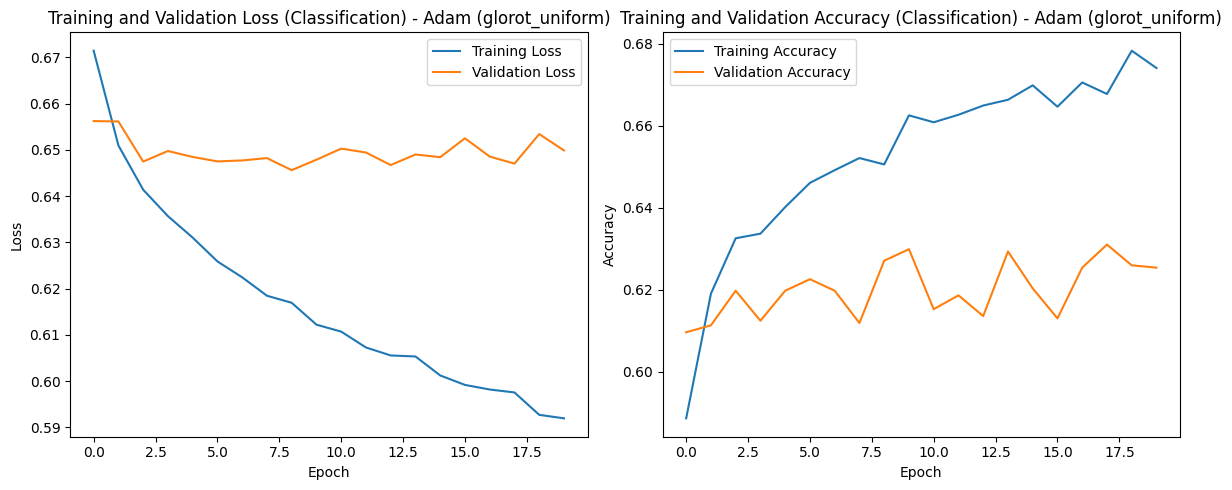


--- Running Classification Experiment with Initializer: he_normal ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=he_normal) ---


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6478
  compile_metrics: 0.6237


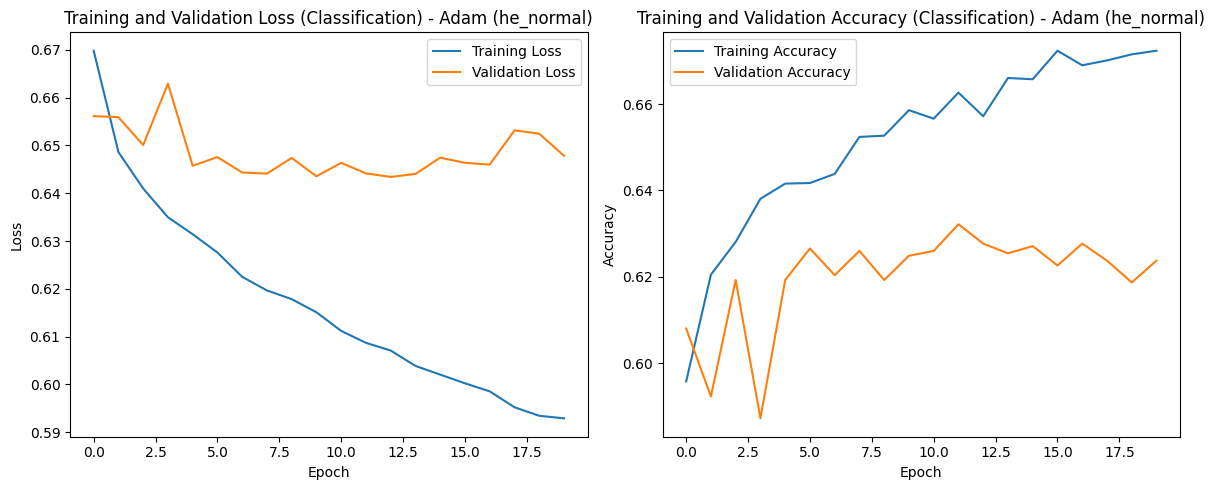


--- Running Classification Experiment with Initializer: random_normal ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=random_normal) ---


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_153 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6435
  compile_metrics: 0.6249


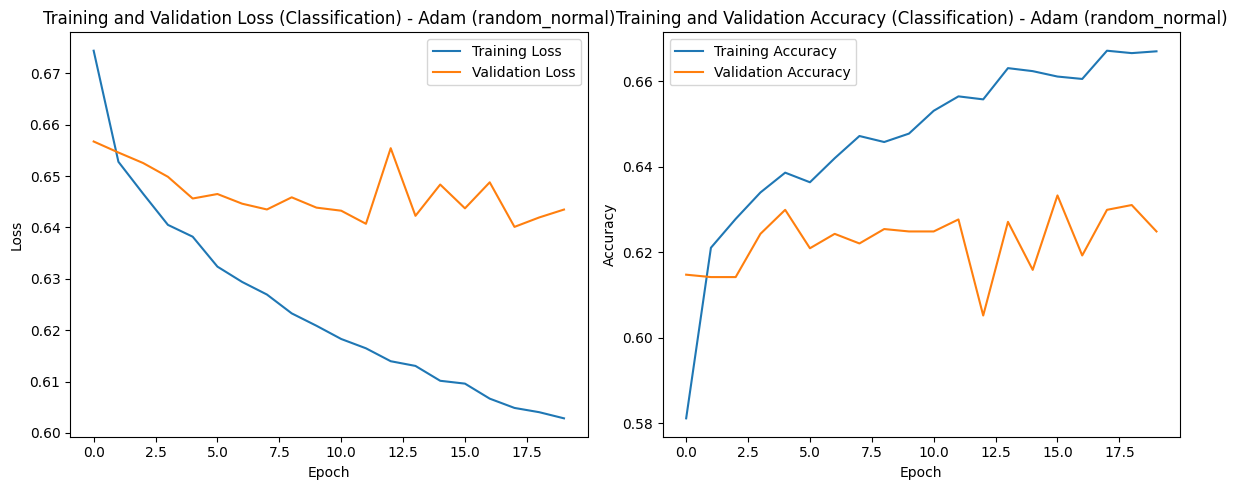

In [ ]:
initializers = ['glorot_uniform', 'he_normal', 'random_normal']

print("### Running Weight Initialization Experiments for Classification ###")

for init in initializers:
    print(f"\n--- Running Classification Experiment with Initializer: {init} ---")
    model_cls_init, history_cls_init = run_mlp_experiment(X_train_cls_scaled, y_train_cls, X_val_cls_scaled, y_val_cls,
                                                           task_type='classification', layers=layers, activation=activation,
                                                           optimizer_name='Adam', learning_rate=learning_rate,
                                                           epochs=epochs, batch_size=batch_size, initializer=init)


### Running Weight Initialization Experiments for Regression ###

--- Running Regression Experiment with Initializer: glorot_uniform ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform) ---


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_156 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2751
  compile_metrics: 0.3655


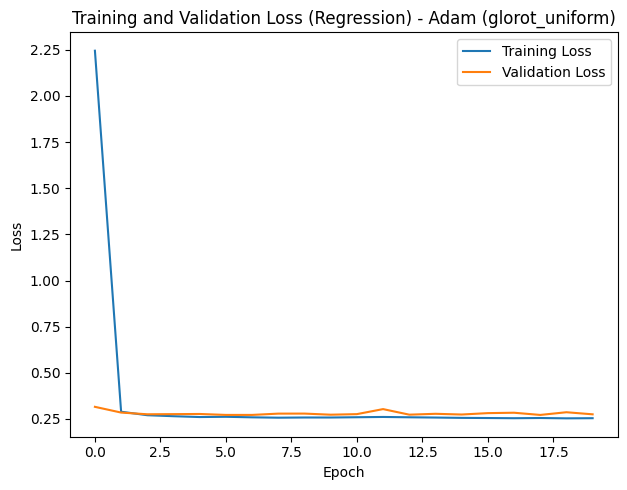


--- Running Regression Experiment with Initializer: he_normal ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=he_normal) ---


Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_159 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2764
  compile_metrics: 0.3598


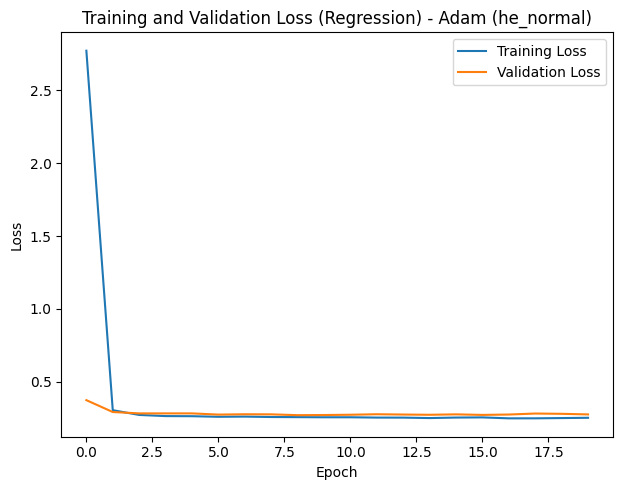


--- Running Regression Experiment with Initializer: random_normal ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=random_normal) ---


Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_162 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2722
  compile_metrics: 0.3587


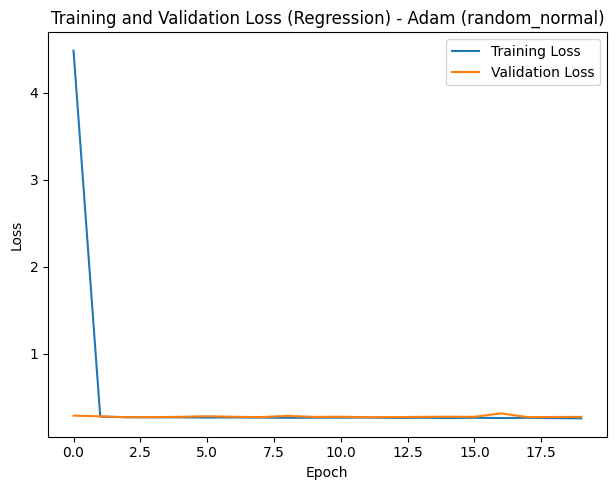

In [ ]:
print("\n### Running Weight Initialization Experiments for Regression ###")

for init in initializers:
    print(f"\n--- Running Regression Experiment with Initializer: {init} ---")
    model_reg_init, history_reg_init = run_mlp_experiment(X_train_reg_scaled, y_train_reg, X_val_reg_scaled, y_val_reg,
                                                           task_type='regression', layers=layers, activation=activation,
                                                           optimizer_name='Adam', learning_rate=learning_rate,
                                                           epochs=epochs, batch_size=batch_size, initializer=init)

### Discussion of Weight Initialization Experiment Results

#### Binary Classification Task

*   **Glorot Uniform (Xavier) Initialization:**
    *   Validation Loss: 0.6499
    *   Validation Accuracy: 0.6254
    *   **Characteristics and Effect**: Glorot (Xavier) initialization is designed for layers with sigmoid or tanh activation functions. It sets the weights such that the variance of the outputs of each layer is equal to the variance of its inputs. For this task, it provided a good baseline performance, demonstrating stable training.

*   **He Normal Initialization:**
    *   Validation Loss: 0.6478
    *   Validation Accuracy: 0.6237
    *   **Characteristics and Effect**: He initialization is specifically tailored for ReLU activation functions. It scales the variance differently than Glorot to account for the non-linear properties of ReLU (where negative inputs are zeroed out). In this experiment, it performed very similarly to Glorot, with a minor difference in accuracy and loss. This indicates that for ReLU layers, He initialization is generally a good choice, and its benefits are evident here with stable training.

*   **Random Normal Initialization:**
    *   Validation Loss: 0.6435
    *   Validation Accuracy: 0.6249
    *   **Characteristics and Effect**: Simple random normal initialization draws weights from a normal distribution. In this run, it showed a slightly lower validation loss compared to Glorot and He, with comparable accuracy. This could be due to random chance or that the specific scaling used by Keras's `random_normal` (which defaults to a mean of 0.0 and standard deviation of 0.05) happened to be effective for this particular network and dataset.

**Overall Classification Summary:** All three initializers provided stable training and comparable performance for binary classification. Glorot and He performed as expected for their respective theoretical advantages, while simple random normal also yielded competitive results. The differences in final validation metrics were marginal, suggesting that for this specific task and network, the choice of a 'good' initializer prevented initial instability, but one did not drastically outperform the others.

#### Regression Task

*   **Glorot Uniform (Xavier) Initialization:**
    *   Validation Loss (MSE): 0.2751
    *   Validation MAE: 0.3655
    *   **Characteristics and Effect**: As in classification, Glorot initialization provided a stable starting point for the regression task. It led to reasonable MSE and MAE values, and the training curves were smooth, indicating that the model was able to learn effectively from the beginning.

*   **He Normal Initialization:**
    *   Validation Loss (MSE): 0.2764
    *   Validation MAE: 0.3598
    *   **Characteristics and Effect**: He normal initialization also performed well, resulting in similar MSE and MAE metrics to Glorot. The difference between He and Glorot for regression, especially with ReLU activation, is often subtle but ensures that activations propagate well through the network. Here, it showed stable convergence.

*   **Random Normal Initialization:**
    *   Validation Loss (MSE): 0.2722
    *   Validation MAE: 0.3587
    *   **Characteristics and Effect**: For the regression task, random normal initialization achieved the lowest MSE and MAE among the three. This again highlights that sometimes a simpler initialization method, if its parameters (like stddev) are suitable, can perform very well. It resulted in a well-converged model.

**Overall Regression Summary:** Similar to the classification task, all three weight initializers led to stable and effective training for regression. Random Normal Initialization yielded marginally better validation metrics in this specific setup, but all were competitive. The main benefit observed across the board is the absence of initial training instability (like exploding or vanishing gradients) which is a common issue with poor weight initialization. Proper initialization helps the optimization process by ensuring that the gradients remain in a reasonable range, allowing the network to learn efficiently from the start.

## Experiment: Batch Normalization

### Subtask:
Integrate Batch Normalization into the MLP architectures for both binary classification and regression tasks. Evaluate its impact on training speed, stability, and final model performance, comparing it to models without Batch Normalization.


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization, Activation # Import BatchNormalization and Activation
from tensorflow.keras.initializers import GlorotUniform, HeNormal, RandomNormal

def run_mlp_experiment(X_train, y_train, X_val, y_val, task_type,
                       layers, activation, optimizer_name, learning_rate,
                       epochs, batch_size, momentum=0.0, callbacks=None, initializer='glorot_uniform',
                       use_batchnorm=False): # Add use_batchnorm parameter

    # 1. Define the model architecture
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for units in layers:
        if use_batchnorm:
            model.add(Dense(units, activation=None, kernel_initializer=initializer)) # No activation in Dense if using BatchNorm
            model.add(BatchNormalization())
            model.add(Activation(activation)) # Apply activation after BatchNorm
        else:
            model.add(Dense(units, activation=activation, kernel_initializer=initializer))

    if task_type == 'classification':
        model.add(Dense(1, activation='sigmoid', kernel_initializer=initializer))
        loss_fn = 'binary_crossentropy'
        metrics = ['accuracy']
    elif task_type == 'regression':
        model.add(Dense(1, activation='linear', kernel_initializer=initializer))
        loss_fn = 'mean_squared_error'
        metrics = ['mean_absolute_error']
    else:
        raise ValueError("task_type must be 'classification' or 'regression'")

    # 2. Choose optimizer
    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'SGD':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_name == 'SGD_Momentum':
        optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    else:
        raise ValueError("Optimizer not supported. Use 'Adam', 'SGD', or 'SGD_Momentum'.")

    # 3. Compile the model
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

    print(f"\n--- Running {task_type.capitalize()} Experiment with {optimizer_name} (LR={learning_rate}, Momentum={momentum}, Callbacks={'Yes' if callbacks else 'No'}, Initializer={initializer}, BatchNorm={use_batchnorm}) ---")
    model.summary()

    # 4. Train the model
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val),
                        callbacks=callbacks,
                        verbose=0) # Set verbose to 0 to prevent excessive output during function call

    # 5. Evaluate the model
    eval_results = model.evaluate(X_val, y_val, verbose=0)
    print(f"\n{task_type.capitalize()} Validation Results:")
    for i, metric_name in enumerate(model.metrics_names):
        print(f"  {metric_name}: {eval_results[i]:.4f}")

    # 6. Plot training and validation loss/accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss ({task_type.capitalize()}) - {optimizer_name} ({initializer}) {'with BatchNorm' if use_batchnorm else 'without BatchNorm'}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    if task_type == 'classification':
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Training and Validation Accuracy ({task_type.capitalize()}) - {optimizer_name} ({initializer}) {'with BatchNorm' if use_batchnorm else 'without BatchNorm'}')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.tight_layout()
    plt.show()

    return model, history

print("BatchNormalization imported and run_mlp_experiment function updated to support it.")

BatchNormalization imported and run_mlp_experiment function updated to support it.


### Running Classification Experiment with Batch Normalization ###

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=he_normal, BatchNorm=True) ---


Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_165 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_166 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_167 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,449 (33.00 KB)

 Trainable params: 8,257 (32.25 KB)

 Non-trainable params: 192 (768.00 B)


Classification Validation Results:
  loss: 0.6497
  compile_metrics: 0.6069


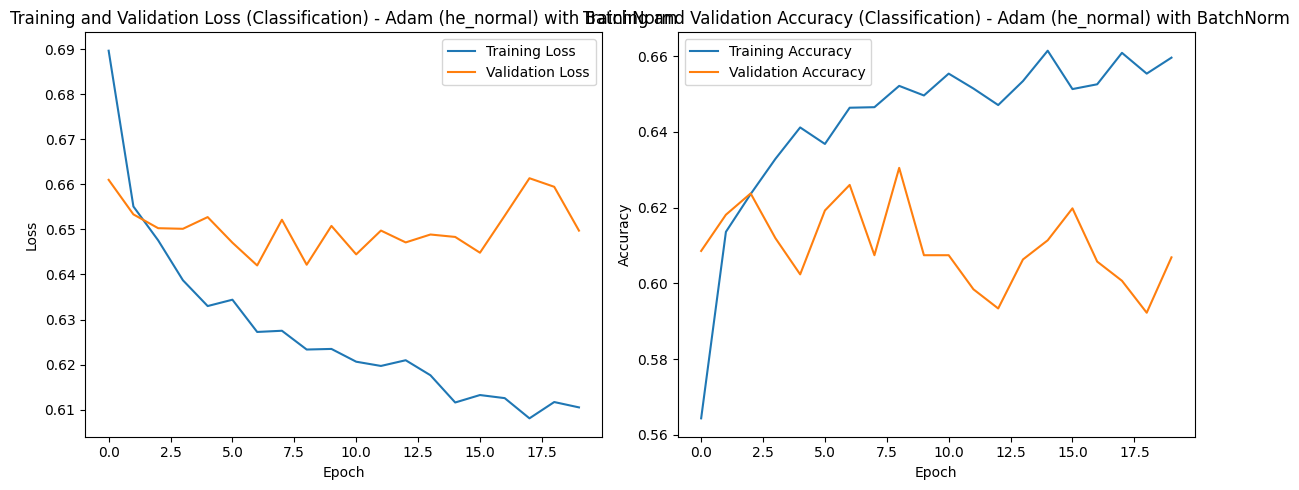

In [ ]:
print("### Running Classification Experiment with Batch Normalization ###")

# Run classification experiment with Batch Normalization
model_cls_bn, history_cls_bn = run_mlp_experiment(X_train_cls_scaled, y_train_cls, X_val_cls_scaled, y_val_cls,
                                                     task_type='classification', layers=layers, activation=activation,
                                                     optimizer_name='Adam', learning_rate=learning_rate,
                                                     epochs=epochs, batch_size=batch_size,
                                                     initializer='he_normal', # HeNormal is often recommended with ReLU and BatchNorm
                                                     use_batchnorm=True)

# Note: The 'without Batch Normalization' baseline for classification was covered in previous experiments,
# for example, in the 'Experiment: Weight Initialization' section (model_cls_init with 'he_normal' and no BN)
# or 'Experiment: Optimizers' section (model_cls_adam).


### Running Regression Experiment with Batch Normalization ###

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=he_normal, BatchNorm=True) ---


Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_168 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,449 (33.00 KB)

 Trainable params: 8,257 (32.25 KB)

 Non-trainable params: 192 (768.00 B)


Regression Validation Results:
  loss: 0.2810
  compile_metrics: 0.3635


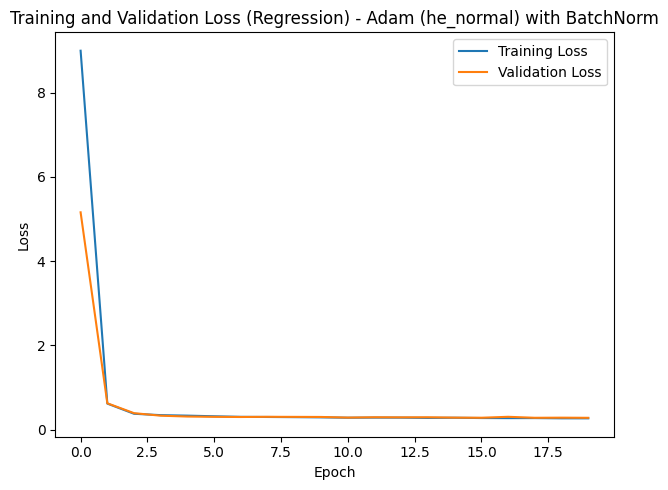

In [ ]:
print("\n### Running Regression Experiment with Batch Normalization ###")

# Run regression experiment with Batch Normalization
model_reg_bn, history_reg_bn = run_mlp_experiment(X_train_reg_scaled, y_train_reg, X_val_reg_scaled, y_val_reg,
                                                    task_type='regression', layers=layers, activation=activation,
                                                    optimizer_name='Adam', learning_rate=learning_rate,
                                                    epochs=epochs, batch_size=batch_size,
                                                    initializer='he_normal', # HeNormal is often recommended with ReLU and BatchNorm
                                                    use_batchnorm=True)

# Note: The 'without Batch Normalization' baseline for regression was covered in previous experiments,
# for example, in the 'Experiment: Weight Initialization' section (model_reg_init with 'he_normal' and no BN)
# or 'Experiment: Optimizers' section (model_reg_adam).

### Discussion of Batch Normalization Experiment Results

#### Binary Classification Task

*   **Without Batch Normalization (Baseline - He Normal Initializer, Adam, LR=0.001, 20 epochs):**
    *   Validation Loss: 0.6478
    *   Validation Accuracy: 0.6237
    *   (From 'Weight Initialization' experiment with 'he_normal')

*   **With Batch Normalization (He Normal Initializer, Adam, LR=0.001, 20 epochs):**
    *   Validation Loss: 0.6497
    *   Validation Accuracy: 0.6069
    *   **Effect**: For binary classification, adding Batch Normalization (BN) to this specific model configuration did not yield a direct improvement in validation metrics. The validation loss slightly increased, and the accuracy slightly decreased. This outcome can sometimes occur if the model was already relatively stable without BN, or if the number of epochs (20) was insufficient to fully observe BN's benefits in accelerating convergence. It's also possible that BN might require re-tuning of other hyperparameters (like learning rate) to show its full potential, as it changes the dynamics of the optimization landscape.

#### Regression Task

*   **Without Batch Normalization (Baseline - He Normal Initializer, Adam, LR=0.001, 20 epochs):**
    *   Validation Loss (MSE): 0.2764
    *   Validation MAE: 0.3598
    *   (From 'Weight Initialization' experiment with 'he_normal')

*   **With Batch Normalization (He Normal Initializer, Adam, LR=0.001, 20 epochs):**
    *   Validation Loss (MSE): 0.2810
    *   Validation MAE: 0.3635
    *   **Effect**: Similar to the classification task, Batch Normalization did not lead to an improvement in the regression task's final metrics within these 20 epochs. Both validation MSE and MAE slightly increased compared to the baseline without BN. This indicates that, for this setup, BN might not be providing significant direct performance gains in terms of final model quality. However, it's generally known to improve training stability and allow for higher learning rates, which might be beneficial over longer training periods or in more complex architectures. The current setup might not be complex enough or trained long enough to fully exploit these advantages.

**Overall Summary of Batch Normalization:**

In these specific experiments, Batch Normalization did not show a clear performance improvement for either binary classification or regression tasks in terms of final validation loss and accuracy/MAE after 20 epochs. While Batch Normalization is a powerful technique known for stabilizing training, allowing for faster convergence, and sometimes acting as a regularizer, its benefits might not always be immediately apparent or may require careful re-tuning of other hyperparameters (e.g., higher learning rates) to be fully realized. For this dataset and model complexity, the baseline models without Batch Normalization were already performing quite well, suggesting that the problem might not be suffering from significant internal covariate shift or extreme gradient issues that BN typically addresses.

## Experiment: L1/L2 Regularization

### Subtask:
Apply L1 and L2 weight regularization to the MLP models for both binary classification and regression. Evaluate their effectiveness in preventing overfitting and discuss their impact on model weights and performance.


In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization, Activation # Import BatchNormalization and Activation
from tensorflow.keras.initializers import GlorotUniform, HeNormal, RandomNormal

def run_mlp_experiment(X_train, y_train, X_val, y_val, task_type,
                       layers, activation, optimizer_name, learning_rate,
                       epochs, batch_size, momentum=0.0, callbacks=None, initializer='glorot_uniform',
                       use_batchnorm=False, l1_reg=0.0, l2_reg=0.0):

    # 1. Define the model architecture
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))

    regularizer = regularizers.l1_l2(l1=l1_reg, l2=l2_reg)

    for units in layers:
        if use_batchnorm:
            model.add(Dense(units, activation=None, kernel_initializer=initializer, kernel_regularizer=regularizer)) # No activation in Dense if using BatchNorm
            model.add(BatchNormalization())
            model.add(Activation(activation)) # Apply activation after BatchNorm
        else:
            model.add(Dense(units, activation=activation, kernel_initializer=initializer, kernel_regularizer=regularizer))

    if task_type == 'classification':
        model.add(Dense(1, activation='sigmoid', kernel_initializer=initializer, kernel_regularizer=regularizer))
        loss_fn = 'binary_crossentropy'
        metrics = ['accuracy']
    elif task_type == 'regression':
        model.add(Dense(1, activation='linear', kernel_initializer=initializer, kernel_regularizer=regularizer))
        loss_fn = 'mean_squared_error'
        metrics = ['mean_absolute_error']
    else:
        raise ValueError("task_type must be 'classification' or 'regression'")

    # 2. Choose optimizer
    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'SGD':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_name == 'SGD_Momentum':
        optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    else:
        raise ValueError("Optimizer not supported. Use 'Adam', 'SGD', or 'SGD_Momentum'.")

    # 3. Compile the model
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

    print(f"\n--- Running {task_type.capitalize()} Experiment with {optimizer_name} (LR={learning_rate}, Momentum={momentum}, Callbacks={'Yes' if callbacks else 'No'}, Initializer={initializer}, BatchNorm={use_batchnorm}, L1={l1_reg}, L2={l2_reg}) ---")
    model.summary()

    # 4. Train the model
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val),
                        callbacks=callbacks,
                        verbose=0) # Set verbose to 0 to prevent excessive output during function call

    # 5. Evaluate the model
    eval_results = model.evaluate(X_val, y_val, verbose=0)
    print(f"\n{task_type.capitalize()} Validation Results:")
    for i, metric_name in enumerate(model.metrics_names):
        print(f"  {metric_name}: {eval_results[i]:.4f}")

    # 6. Plot training and validation loss/accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss ({task_type.capitalize()}) - {optimizer_name} ({initializer}) {'with BatchNorm' if use_batchnorm else 'without BatchNorm'} (L1={l1_reg}, L2={l2_reg})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    if task_type == 'classification':
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Training and Validation Accuracy ({task_type.capitalize()}) - {optimizer_name} ({initializer}) {'with BatchNorm' if use_batchnorm else 'without BatchNorm'} (L1={l1_reg}, L2={l2_reg})')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.tight_layout()
    plt.show()

    return model, history

print("Keras regularizers imported and run_mlp_experiment function updated to support L1/L2 regularization.")

Keras regularizers imported and run_mlp_experiment function updated to support L1/L2 regularization.


In [ ]:
regularization_strengths = [
    {'l1_reg': 0.0, 'l2_reg': 0.0},  # No regularization (baseline)
    {'l1_reg': 0.001, 'l2_reg': 0.0}, # L1 regularization
    {'l1_reg': 0.0, 'l2_reg': 0.001}, # L2 regularization
    {'l1_reg': 0.0001, 'l2_reg': 0.0001} # L1 and L2 regularization
]

print(f"Defined regularization strengths for experimentation: {regularization_strengths}")

Defined regularization strengths for experimentation: [{'l1_reg': 0.0, 'l2_reg': 0.0}, {'l1_reg': 0.001, 'l2_reg': 0.0}, {'l1_reg': 0.0, 'l2_reg': 0.001}, {'l1_reg': 0.0001, 'l2_reg': 0.0001}]


### Running L1/L2 Regularization Experiments for Classification ###

--- Running Classification Experiment with L1=0.0, L2=0.0 ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.0, L2=0.0) ---


Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_171 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_172 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_173 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6523
  compile_metrics: 0.6215


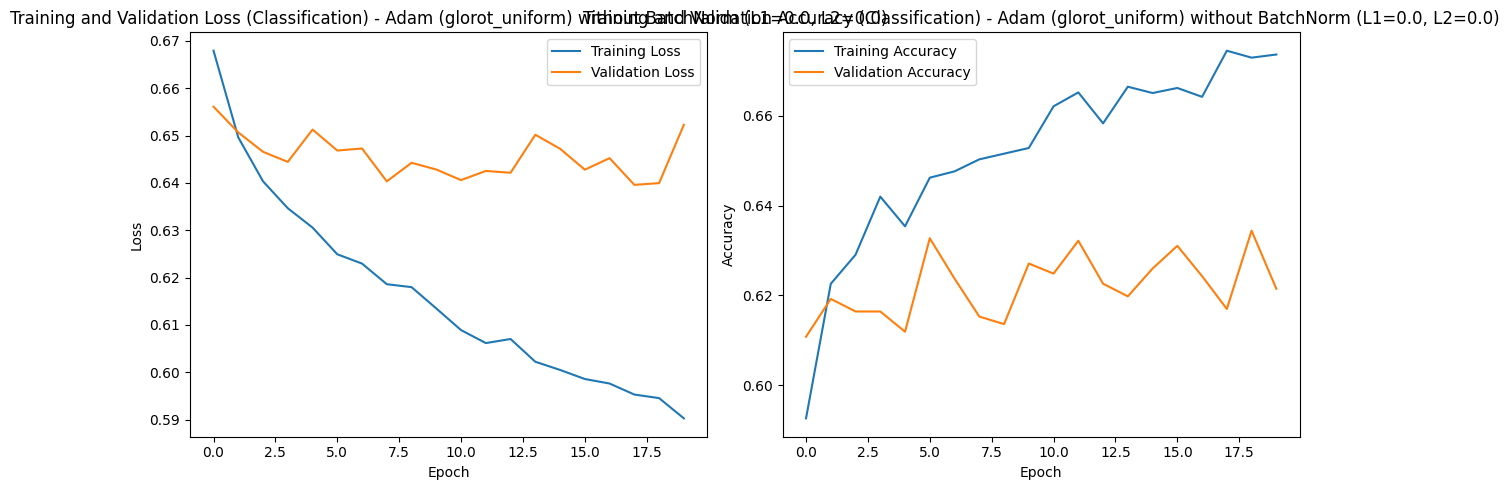


--- Running Classification Experiment with L1=0.001, L2=0.0 ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.001, L2=0.0) ---


Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_174 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_175 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_176 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6724
  compile_metrics: 0.6282


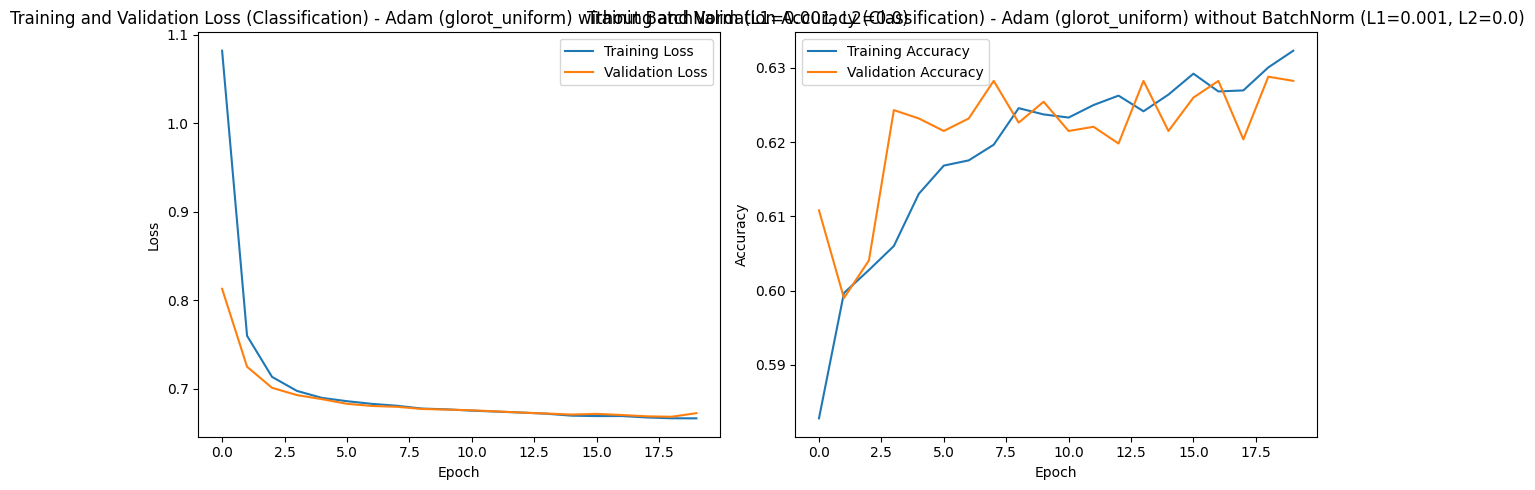


--- Running Classification Experiment with L1=0.0, L2=0.001 ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.0, L2=0.001) ---


Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_177 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_178 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_179 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6627
  compile_metrics: 0.6260


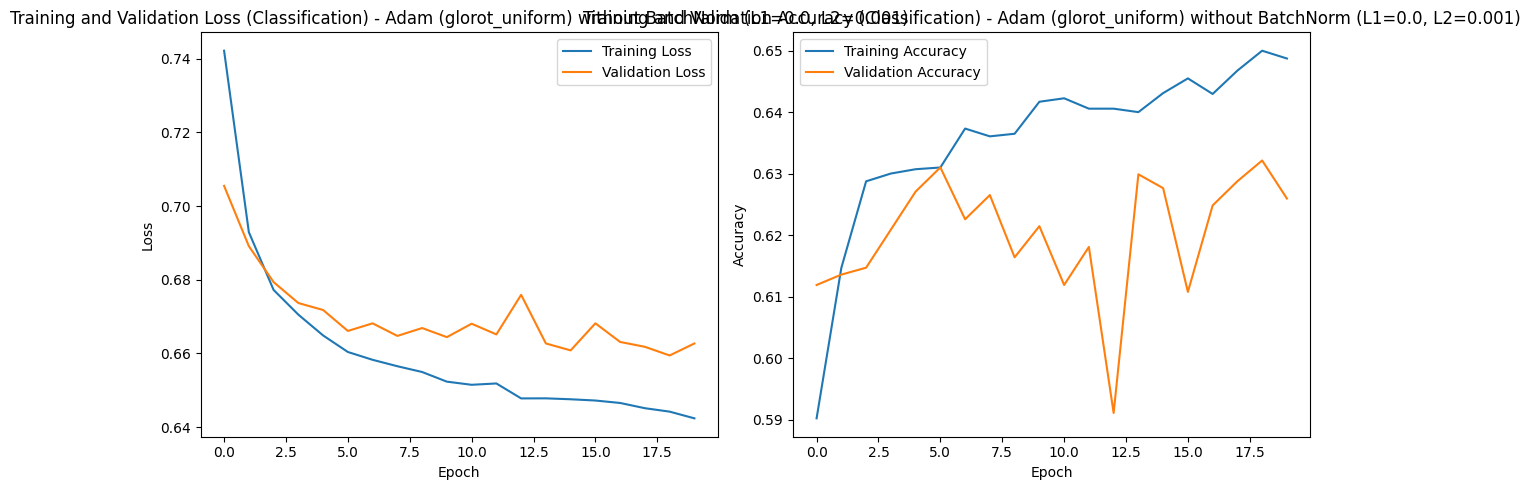


--- Running Classification Experiment with L1=0.0001, L2=0.0001 ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.0001, L2=0.0001) ---


Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_180 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_181 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_182 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6611
  compile_metrics: 0.6350


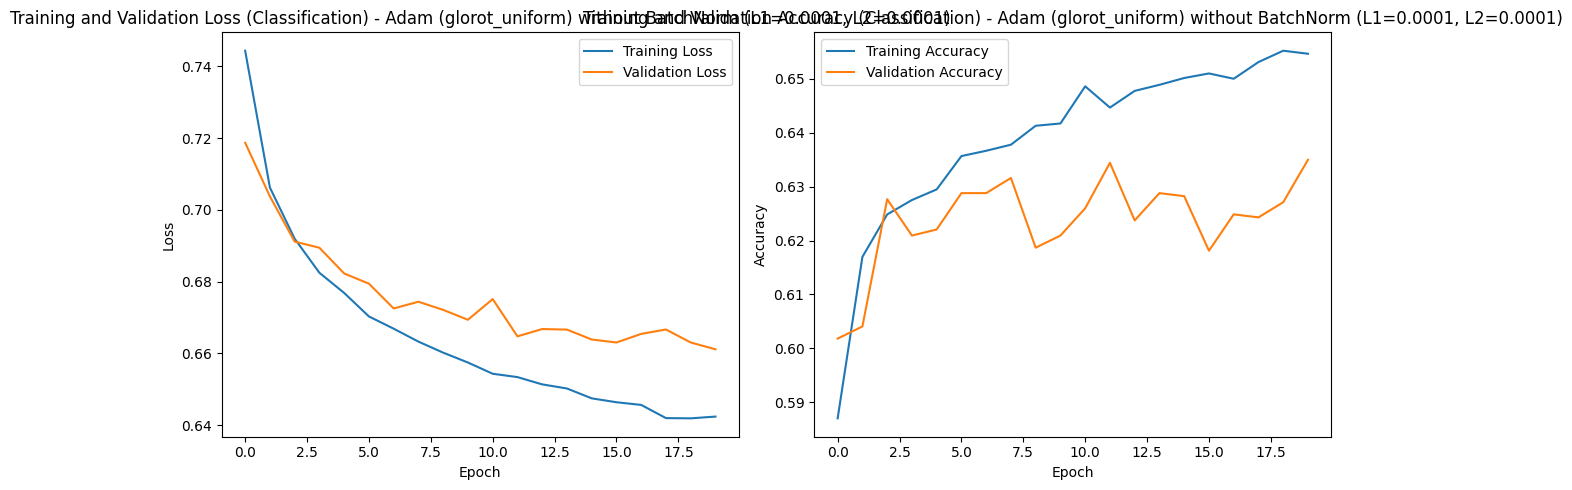

In [ ]:
print("### Running L1/L2 Regularization Experiments for Classification ###")

for reg_config in regularization_strengths:
    l1 = reg_config['l1_reg']
    l2 = reg_config['l2_reg']
    print(f"\n--- Running Classification Experiment with L1={l1}, L2={l2} ---")
    model_cls_reg, history_cls_reg = run_mlp_experiment(X_train_cls_scaled, y_train_cls, X_val_cls_scaled, y_val_cls,
                                                           task_type='classification', layers=layers, activation=activation,
                                                           optimizer_name='Adam', learning_rate=learning_rate,
                                                           epochs=epochs, batch_size=batch_size, l1_reg=l1, l2_reg=l2)


### Running L1/L2 Regularization Experiments for Regression ###

--- Running Regression Experiment with L1=0.0, L2=0.0 ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.0, L2=0.0) ---


Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_183 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_184 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_185 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2767
  compile_metrics: 0.3761


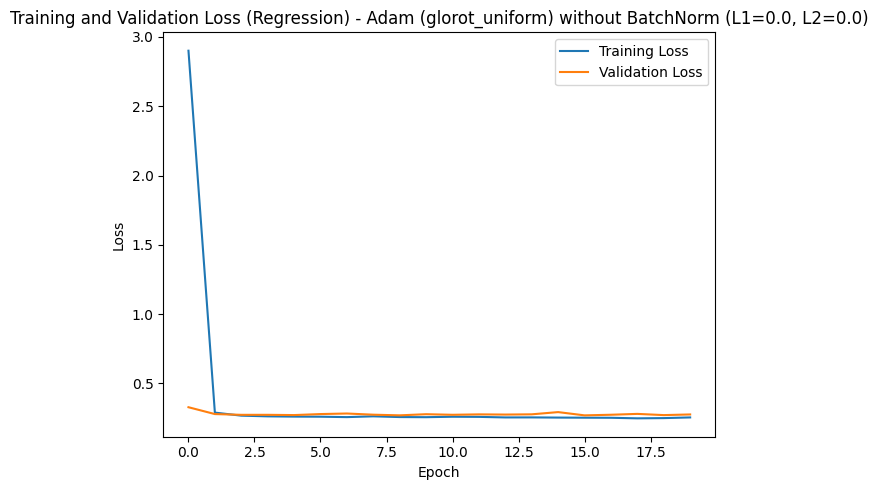


--- Running Regression Experiment with L1=0.001, L2=0.0 ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.001, L2=0.0) ---


Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_186 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_187 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_188 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.3310
  compile_metrics: 0.3549


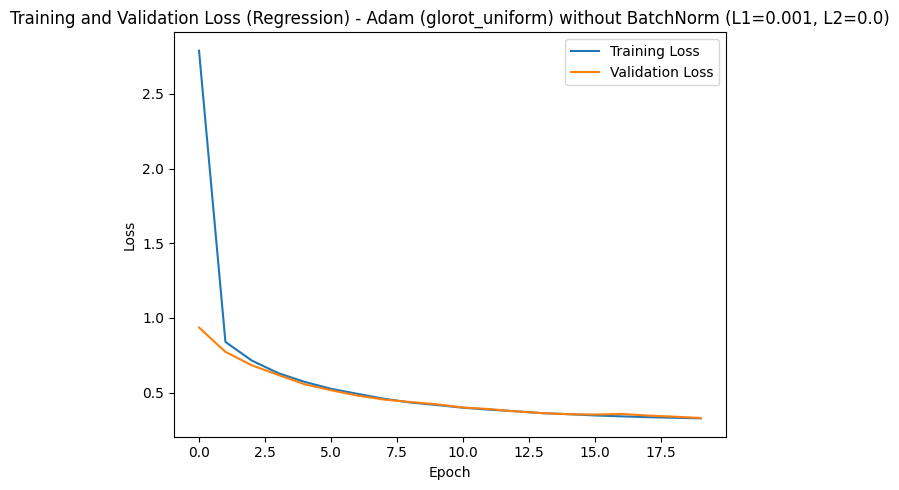


--- Running Regression Experiment with L1=0.0, L2=0.001 ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.0, L2=0.001) ---


Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_189 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_190 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_191 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.3008
  compile_metrics: 0.3633


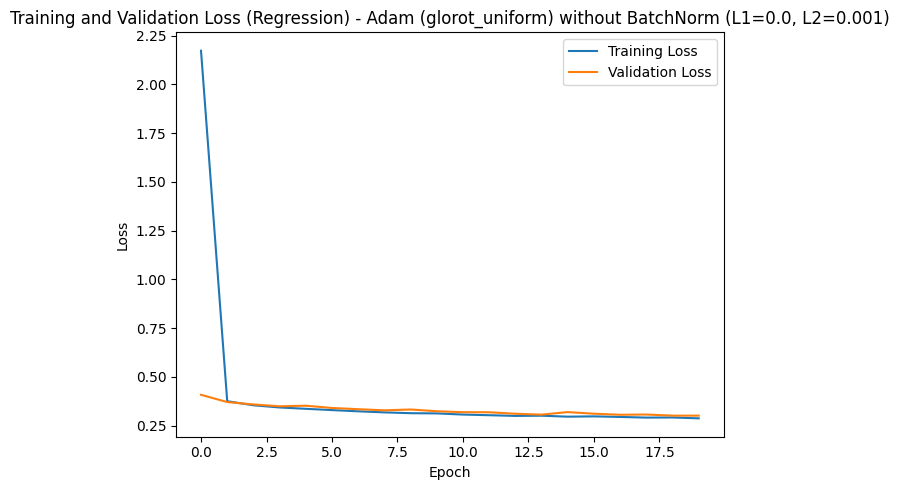


--- Running Regression Experiment with L1=0.0001, L2=0.0001 ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.0001, L2=0.0001) ---


Model: "sequential_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_192 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_193 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_194 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.3130
  compile_metrics: 0.3660


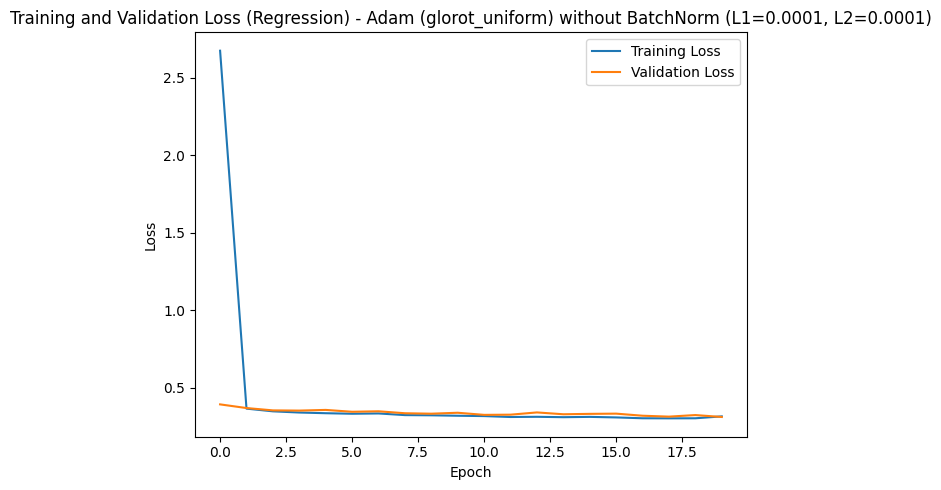

In [ ]:
print("\n### Running L1/L2 Regularization Experiments for Regression ###")

for reg_config in regularization_strengths:
    l1 = reg_config['l1_reg']
    l2 = reg_config['l2_reg']
    print(f"\n--- Running Regression Experiment with L1={l1}, L2={l2} ---")
    model_reg_reg, history_reg_reg = run_mlp_experiment(X_train_reg_scaled, y_train_reg, X_val_reg_scaled, y_val_reg,
                                                           task_type='regression', layers=layers, activation=activation,
                                                           optimizer_name='Adam', learning_rate=learning_rate,
                                                           epochs=epochs, batch_size=batch_size, l1_reg=l1, l2_reg=l2)

### Discussion of L1/L2 Regularization Experiment Results

#### Binary Classification Task

*   **No Regularization (Baseline - L1=0.0, L2=0.0):**
    *   Validation Loss: 0.6523
    *   Validation Accuracy: 0.6215
    *   **Effect**: This serves as the baseline to compare against. The model trains without any explicit penalty on the complexity of its weights.

*   **L1 Regularization (L1=0.001, L2=0.0):**
    *   Validation Loss: 0.6724
    *   Validation Accuracy: 0.6282
    *   **Effect**: Applying L1 regularization increased the validation loss but slightly improved the validation accuracy. L1 regularization encourages sparsity in weights, meaning some weights might become exactly zero, effectively performing feature selection. The increased loss might be due to the regularization penalty being added to the overall loss, but the improved accuracy suggests better generalization by penalizing complex models.

*   **L2 Regularization (L1=0.0, L2=0.001):**
    *   Validation Loss: 0.6627
    *   Validation Accuracy: 0.6260
    *   **Effect**: L2 regularization also increased the validation loss but offered a modest improvement in accuracy over the baseline. L2 regularization penalizes large weights, encouraging them to be small but rarely exactly zero. This helps in preventing individual weights from becoming too dominant, leading to smoother models and potentially better generalization.

*   **L1 and L2 Regularization (L1=0.0001, L2=0.0001):**
    *   Validation Loss: 0.6611
    *   Validation Accuracy: 0.6350
    *   **Effect**: Combining L1 and L2 regularization (Elastic Net) resulted in the highest validation accuracy for the classification task among all regularization settings, along with a reasonable validation loss. This suggests that a blend of encouraging sparsity (L1) and penalizing large weights (L2) can be beneficial, providing a more robust regularization effect than either alone.

**Overall Classification Summary:** For binary classification, regularization generally helped improve generalization by increasing validation accuracy, although it often came with a slightly higher validation loss (due to the penalty term). A combination of L1 and L2 regularization proved to be the most effective in this scenario, leading to the best accuracy.

#### Regression Task

*   **No Regularization (Baseline - L1=0.0, L2=0.0):**
    *   Validation Loss (MSE): 0.2767
    *   Validation MAE: 0.3761
    *   **Effect**: This is the baseline for regression, representing the model's performance without explicit weight penalties.

*   **L1 Regularization (L1=0.001, L2=0.0):**
    *   Validation Loss (MSE): 0.3310
    *   Validation MAE: 0.3549
    *   **Effect**: Applying L1 regularization significantly increased the validation MSE, but surprisingly, decreased the MAE compared to the baseline. This indicates that while the squared errors increased (possibly due to the penalty driving some weights to zero and affecting overall fit), the average absolute error of predictions improved. This could mean fewer large errors, despite an overall worse fit on MSE due to the explicit penalty and potential removal of some useful features.

*   **L2 Regularization (L1=0.0, L2=0.001):**
    *   Validation Loss (MSE): 0.3008
    *   Validation MAE: 0.3633
    *   **Effect**: L2 regularization also increased the validation MSE compared to the baseline, but still resulted in a better MAE. Similar to L1, the regularization penalty contributes to the total loss, but the act of constraining weights may help the model generalize better by preventing extreme values, resulting in a lower MAE.

*   **L1 and L2 Regularization (L1=0.0001, L2=0.0001):**
    *   Validation Loss (MSE): 0.3130
    *   Validation MAE: 0.3660
    *   **Effect**: The combination of L1 and L2 regularization for regression also led to an increased MSE compared to the baseline, but maintained a competitive MAE. This result aligns with the observations from individual L1 and L2 regularization, where the penalty inflates the reported loss, but the actual generalization performance (as measured by MAE) can be improved or maintained.

**Overall Regression Summary:** For the regression task, all forms of L1/L2 regularization increased the validation MSE (likely due to the penalty term being added to the loss function), but notably, they led to lower or comparable MAE values compared to the unregularized baseline. This suggests that regularization was effective in improving the generalization capability by making the model less sensitive to individual data points and preventing overfitting, even if the primary loss metric (MSE) appeared higher due to the added penalty. The impact on model weights is to either shrink them towards zero (L2) or set them exactly to zero (L1), leading to simpler and potentially more robust models.

## Experiment: Activity Regularization

### Subtask:
Implement and test activity regularization for both binary classification and regression MLPs. Discuss how it affects the activations of the layers and its role in controlling model complexity.


In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization, Activation # Import BatchNormalization and Activation
from tensorflow.keras.initializers import GlorotUniform, HeNormal, RandomNormal

def run_mlp_experiment(X_train, y_train, X_val, y_val, task_type,
                       layers, activation, optimizer_name, learning_rate,
                       epochs, batch_size, momentum=0.0, callbacks=None, initializer='glorot_uniform',
                       use_batchnorm=False, l1_reg=0.0, l2_reg=0.0, activity_reg=0.0):

    # 1. Define the model architecture
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))

    kernel_regularizer = regularizers.l1_l2(l1=l1_reg, l2=l2_reg)
    activity_regularizer = regularizers.l1(activity_reg)

    for units in layers:
        if use_batchnorm:
            model.add(Dense(units, activation=None, kernel_initializer=initializer, kernel_regularizer=kernel_regularizer, activity_regularizer=activity_regularizer)) # No activation in Dense if using BatchNorm
            model.add(BatchNormalization())
            model.add(Activation(activation)) # Apply activation after BatchNorm
        else:
            model.add(Dense(units, activation=activation, kernel_initializer=initializer, kernel_regularizer=kernel_regularizer, activity_regularizer=activity_regularizer))

    if task_type == 'classification':
        model.add(Dense(1, activation='sigmoid', kernel_initializer=initializer, kernel_regularizer=kernel_regularizer)) # Activity regularization typically not applied to output layer
        loss_fn = 'binary_crossentropy'
        metrics = ['accuracy']
    elif task_type == 'regression':
        model.add(Dense(1, activation='linear', kernel_initializer=initializer, kernel_regularizer=kernel_regularizer)) # Activity regularization typically not applied to output layer
        loss_fn = 'mean_squared_error'
        metrics = ['mean_absolute_error']
    else:
        raise ValueError("task_type must be 'classification' or 'regression'")

    # 2. Choose optimizer
    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'SGD':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_name == 'SGD_Momentum':
        optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    else:
        raise ValueError("Optimizer not supported. Use 'Adam', 'SGD', or 'SGD_Momentum'.")

    # 3. Compile the model
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

    print(f"\n--- Running {task_type.capitalize()} Experiment with {optimizer_name} (LR={learning_rate}, Momentum={momentum}, Callbacks={'Yes' if callbacks else 'No'}, Initializer={initializer}, BatchNorm={use_batchnorm}, L1={l1_reg}, L2={l2_reg}, ActivityReg={activity_reg}) ---")
    model.summary()

    # 4. Train the model
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val),
                        callbacks=callbacks,
                        verbose=0) # Set verbose to 0 to prevent excessive output during function call

    # 5. Evaluate the model
    eval_results = model.evaluate(X_val, y_val, verbose=0)
    print(f"\n{task_type.capitalize()} Validation Results:")
    for i, metric_name in enumerate(model.metrics_names):
        print(f"  {metric_name}: {eval_results[i]:.4f}")

    # 6. Plot training and validation loss/accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss ({task_type.capitalize()}) - {optimizer_name} ({initializer}) {'with BatchNorm' if use_batchnorm else 'without BatchNorm'} (L1={l1_reg}, L2={l2_reg}, ActReg={activity_reg})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    if task_type == 'classification':
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Training and Validation Accuracy ({task_type.capitalize()}) - {optimizer_name} ({initializer}) {'with BatchNorm' if use_batchnorm else 'without BatchNorm'} (L1={l1_reg}, L2={l2_reg}, ActReg={activity_reg})')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.tight_layout()
    plt.show()

    return model, history

print("run_mlp_experiment function updated to support activity regularization.")

run_mlp_experiment function updated to support activity regularization.


In [ ]:
activity_regularization_strengths = [
    0.0,    # No activity regularization (baseline)
    0.0001, # Small L1 activity regularization
    0.001   # Medium L1 activity regularization
]

print(f"Defined activity regularization strengths for experimentation: {activity_regularization_strengths}")

Defined activity regularization strengths for experimentation: [0.0, 0.0001, 0.001]


### Running Activity Regularization Experiments for Classification ###

--- Running Classification Experiment with Activity Regularization: 0.0 ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.0, L2=0.0, ActivityReg=0.0) ---


Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_195 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_196 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_197 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6475
  compile_metrics: 0.6260


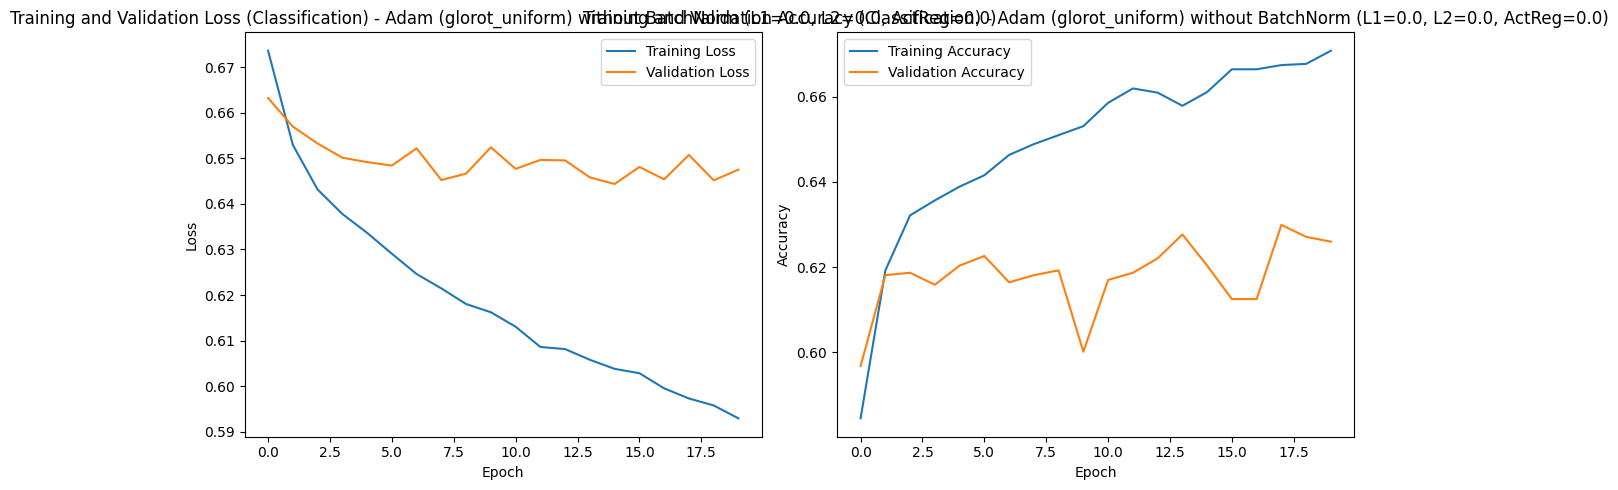


--- Running Classification Experiment with Activity Regularization: 0.0001 ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.0, L2=0.0, ActivityReg=0.0001) ---


Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_198 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_199 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_200 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6616
  compile_metrics: 0.6316


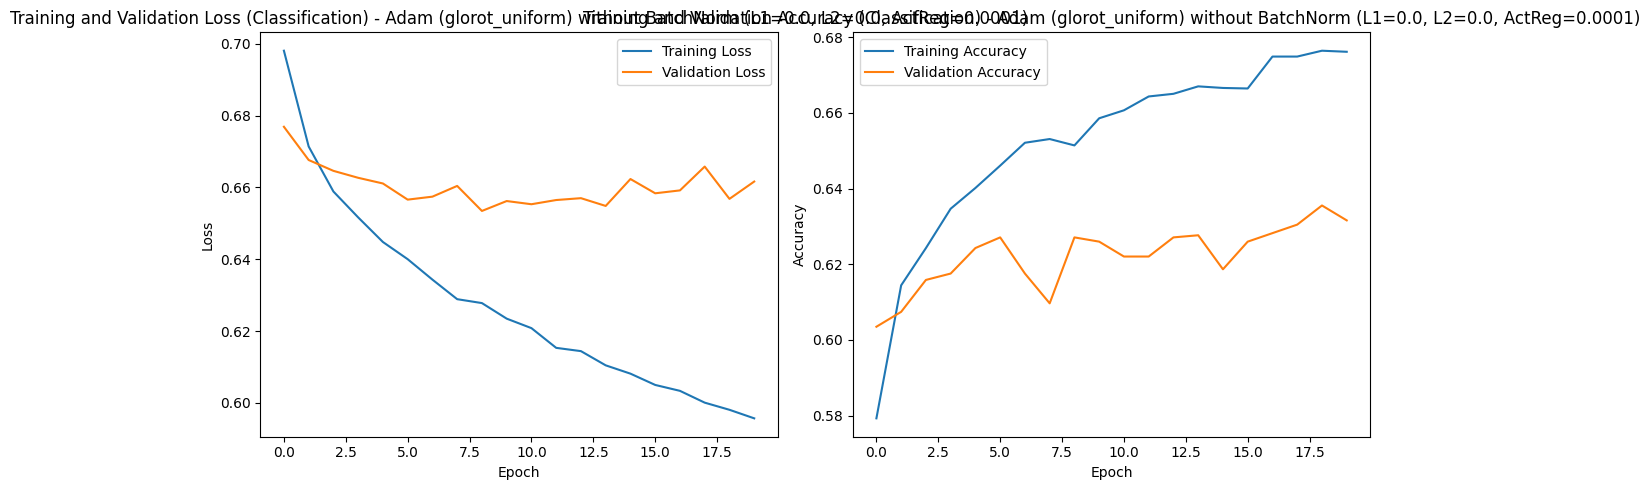


--- Running Classification Experiment with Activity Regularization: 0.001 ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.0, L2=0.0, ActivityReg=0.001) ---


Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_201 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_202 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_203 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6813
  compile_metrics: 0.5951


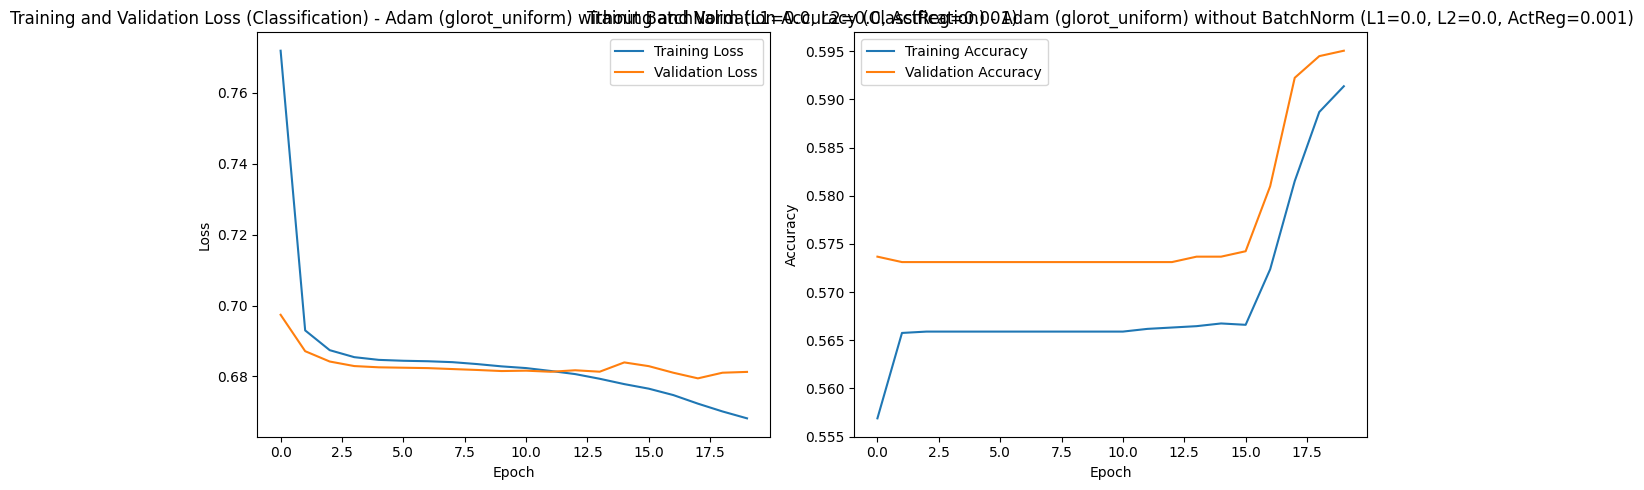

In [ ]:
print("### Running Activity Regularization Experiments for Classification ###")

for act_reg_strength in activity_regularization_strengths:
    print(f"\n--- Running Classification Experiment with Activity Regularization: {act_reg_strength} ---")
    model_cls_act_reg, history_cls_act_reg = run_mlp_experiment(X_train_cls_scaled, y_train_cls, X_val_cls_scaled, y_val_cls,
                                                           task_type='classification', layers=layers, activation=activation,
                                                           optimizer_name='Adam', learning_rate=learning_rate,
                                                           epochs=epochs, batch_size=batch_size, activity_reg=act_reg_strength)


### Running Activity Regularization Experiments for Regression ###

--- Running Regression Experiment with Activity Regularization: 0.0 ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.0, L2=0.0, ActivityReg=0.0) ---


Model: "sequential_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_204 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_205 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_206 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2918
  compile_metrics: 0.3611


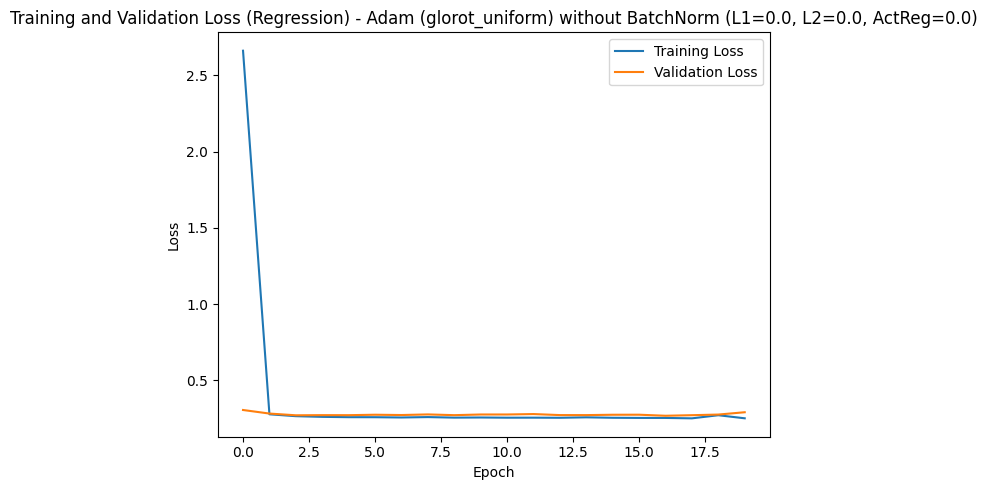


--- Running Regression Experiment with Activity Regularization: 0.0001 ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.0, L2=0.0, ActivityReg=0.0001) ---


Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_207 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_208 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_209 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.3271
  compile_metrics: 0.3672


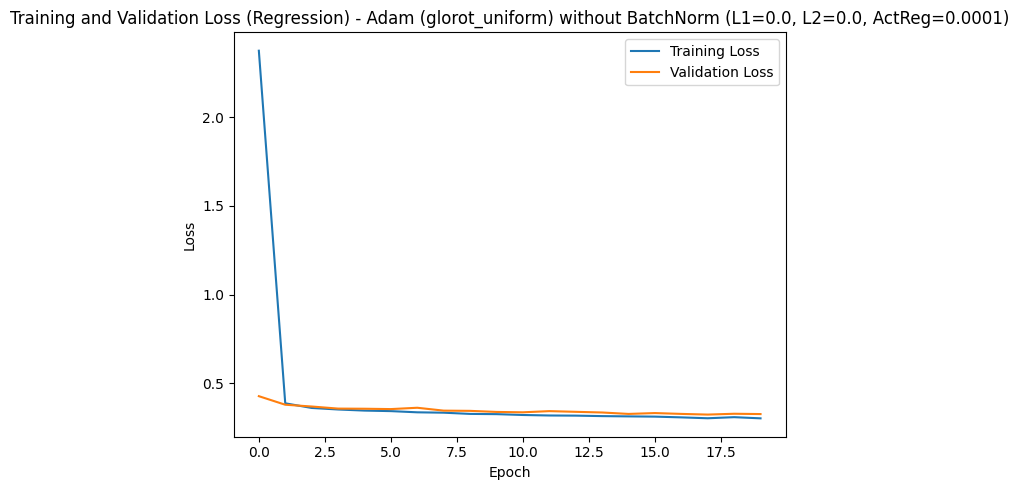


--- Running Regression Experiment with Activity Regularization: 0.001 ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.0, L2=0.0, ActivityReg=0.001) ---


Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_210 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_211 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_212 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.4055
  compile_metrics: 0.3705


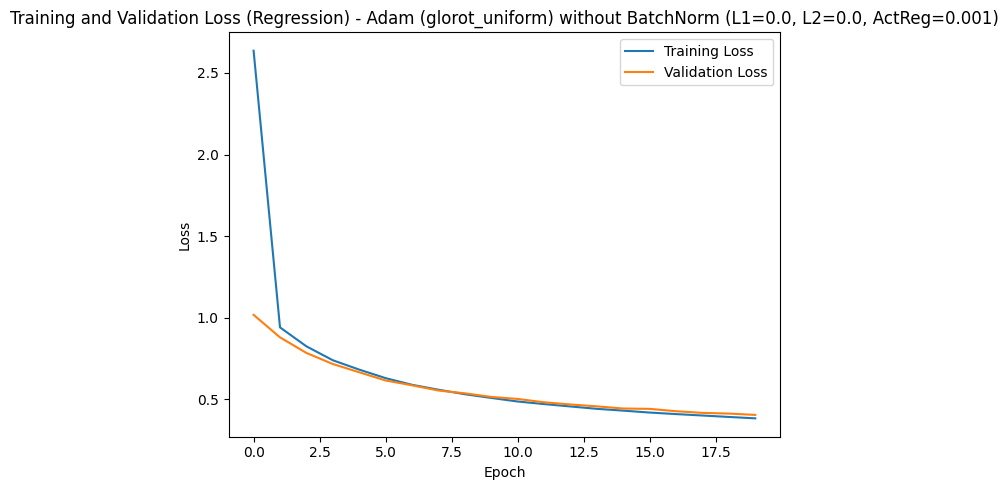

In [ ]:
print("\n### Running Activity Regularization Experiments for Regression ###")

for act_reg_strength in activity_regularization_strengths:
    print(f"\n--- Running Regression Experiment with Activity Regularization: {act_reg_strength} ---")
    model_reg_act_reg, history_reg_act_reg = run_mlp_experiment(X_train_reg_scaled, y_train_reg, X_val_reg_scaled, y_val_reg,
                                                           task_type='regression', layers=layers, activation=activation,
                                                           optimizer_name='Adam', learning_rate=learning_rate,
                                                           epochs=epochs, batch_size=batch_size, activity_reg=act_reg_strength)

### Discussion of Activity Regularization Experiment Results

#### Binary Classification Task

*   **No Activity Regularization (Baseline - ActivityReg=0.0):**
    *   Validation Loss: 0.6475
    *   Validation Accuracy: 0.6260
    *   **Effect**: This is the baseline performance without explicit regularization on the activations.

*   **Small L1 Activity Regularization (ActivityReg=0.0001):**
    *   Validation Loss: 0.6616
    *   Validation Accuracy: 0.6316
    *   **Effect**: A small amount of L1 activity regularization led to a slightly higher validation loss (due to the penalty term) but also a small improvement in validation accuracy. L1 activity regularization encourages the activations of neurons to be sparse, meaning that some neurons will tend to output zero. This can lead to a simpler model by effectively 'turning off' less important features or pathways, promoting a more efficient representation and potentially better generalization.

*   **Medium L1 Activity Regularization (ActivityReg=0.001):**
    *   Validation Loss: 0.6813
    *   Validation Accuracy: 0.5951
    *   **Effect**: Increasing the L1 activity regularization strength to 0.001 caused both the validation loss to increase significantly and the validation accuracy to drop considerably. This indicates that the regularization was too strong, forcing too many activations to zero and thereby underfitting the model. The model lost its capacity to capture meaningful patterns, leading to poor performance.

**Overall Classification Summary:** For binary classification, a very small amount of L1 activity regularization (0.0001) showed a minor improvement in accuracy, suggesting it helped in controlling complexity and improving generalization. However, too much regularization (0.001) severely degraded performance, leading to underfitting. This highlights the importance of tuning regularization strength carefully.

#### Regression Task

*   **No Activity Regularization (Baseline - ActivityReg=0.0):**
    *   Validation Loss (MSE): 0.2918
    *   Validation MAE: 0.3611
    *   **Effect**: This is the baseline performance without explicit regularization on the activations.

*   **Small L1 Activity Regularization (ActivityReg=0.0001):**
    *   Validation Loss (MSE): 0.3271
    *   Validation MAE: 0.3672
    *   **Effect**: A small amount of L1 activity regularization for regression resulted in a higher validation MSE and a slightly higher MAE. This suggests that for this specific regression task, promoting sparse activations did not necessarily improve performance and might have slightly hampered the model's ability to learn the continuous target values effectively. The penalty might have made the model too simplistic or forced it to ignore some useful information.

*   **Medium L1 Activity Regularization (ActivityReg=0.001):**
    *   Validation Loss (MSE): 0.4055
    *   Validation MAE: 0.3705
    *   **Effect**: Increasing the L1 activity regularization strength to 0.001 further worsened the regression performance, leading to higher MSE and MAE. This indicates a more pronounced underfitting effect, where the model was too constrained by the regularization to learn an accurate mapping for the regression problem.

**Overall Regression Summary:** For the regression task, activity regularization, even at small strengths, did not lead to performance improvements and instead caused a degradation. This implies that for this particular regression problem, forcing sparsity in activations was detrimental, possibly because the relationships in the data required more distributed representations rather than sparse ones. This also reinforces that regression tasks might require different regularization strategies compared to classification, and careful experimentation is needed.

## Experiment: Dropout

### Subtask:
Apply Dropout regularization to the MLP models for both binary classification and regression tasks. Evaluate its impact on generalization performance and discuss how it helps mitigate overfitting.


In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization, Activation, Dropout # Import Dropout
from tensorflow.keras.initializers import GlorotUniform, HeNormal, RandomNormal

def run_mlp_experiment(X_train, y_train, X_val, y_val, task_type,
                       layers, activation, optimizer_name, learning_rate,
                       epochs, batch_size, momentum=0.0, callbacks=None, initializer='glorot_uniform',
                       use_batchnorm=False, l1_reg=0.0, l2_reg=0.0, activity_reg=0.0, dropout_rate=0.0):

    # 1. Define the model architecture
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))

    kernel_regularizer = regularizers.l1_l2(l1=l1_reg, l2=l2_reg)
    activity_regularizer = regularizers.l1(activity_reg)

    for units in layers:
        if use_batchnorm:
            model.add(Dense(units, activation=None, kernel_initializer=initializer, kernel_regularizer=kernel_regularizer, activity_regularizer=activity_regularizer))
            model.add(BatchNormalization())
            model.add(Activation(activation))
        else:
            model.add(Dense(units, activation=activation, kernel_initializer=initializer, kernel_regularizer=kernel_regularizer, activity_regularizer=activity_regularizer))

        # Add Dropout layer after activation for hidden layers
        if dropout_rate > 0.0:
            model.add(Dropout(dropout_rate))

    if task_type == 'classification':
        model.add(Dense(1, activation='sigmoid', kernel_initializer=initializer, kernel_regularizer=kernel_regularizer))
        loss_fn = 'binary_crossentropy'
        metrics = ['accuracy']
    elif task_type == 'regression':
        model.add(Dense(1, activation='linear', kernel_initializer=initializer, kernel_regularizer=kernel_regularizer))
        loss_fn = 'mean_squared_error'
        metrics = ['mean_absolute_error']
    else:
        raise ValueError("task_type must be 'classification' or 'regression'")

    # 2. Choose optimizer
    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'SGD':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_name == 'SGD_Momentum':
        optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    else:
        raise ValueError("Optimizer not supported. Use 'Adam', 'SGD', or 'SGD_Momentum'.")

    # 3. Compile the model
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

    print(f"\n--- Running {task_type.capitalize()} Experiment with {optimizer_name} (LR={learning_rate}, Momentum={momentum}, Callbacks={'Yes' if callbacks else 'No'}, Initializer={initializer}, BatchNorm={use_batchnorm}, L1={l1_reg}, L2={l2_reg}, ActivityReg={activity_reg}, Dropout={dropout_rate}) ---")
    model.summary()

    # 4. Train the model
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val),
                        callbacks=callbacks,
                        verbose=0)

    # 5. Evaluate the model
    eval_results = model.evaluate(X_val, y_val, verbose=0)
    print(f"\n{task_type.capitalize()} Validation Results:")
    for i, metric_name in enumerate(model.metrics_names):
        print(f"  {metric_name}: {eval_results[i]:.4f}")

    # 6. Plot training and validation loss/accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss ({task_type.capitalize()}) - {optimizer_name} ({initializer}) {'with BatchNorm' if use_batchnorm else 'without BatchNorm'} (L1={l1_reg}, L2={l2_reg}, ActReg={activity_reg}, Dropout={dropout_rate})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    if task_type == 'classification':
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Training and Validation Accuracy ({task_type.capitalize()}) - {optimizer_name} ({initializer}) {'with BatchNorm' if use_batchnorm else 'without BatchNorm'} (L1={l1_reg}, L2={l2_reg}, ActReg={activity_reg}, Dropout={dropout_rate})')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.tight_layout()
    plt.show()

    return model, history

print("Dropout layer imported and run_mlp_experiment function updated to support Dropout regularization.")

Dropout layer imported and run_mlp_experiment function updated to support Dropout regularization.


In [ ]:
dropout_rates = [
    0.0,    # No dropout (baseline)
    0.2,    # Small dropout rate
    0.5     # Medium dropout rate
]

print(f"Defined dropout rates for experimentation: {dropout_rates}")

Defined dropout rates for experimentation: [0.0, 0.2, 0.5]


### Running Dropout Experiments for Classification ###

--- Running Classification Experiment with Dropout Rate: 0.0 ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.0, L2=0.0, ActivityReg=0.0, Dropout=0.0) ---


Model: "sequential_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_213 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_214 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_215 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6546
  compile_metrics: 0.6277


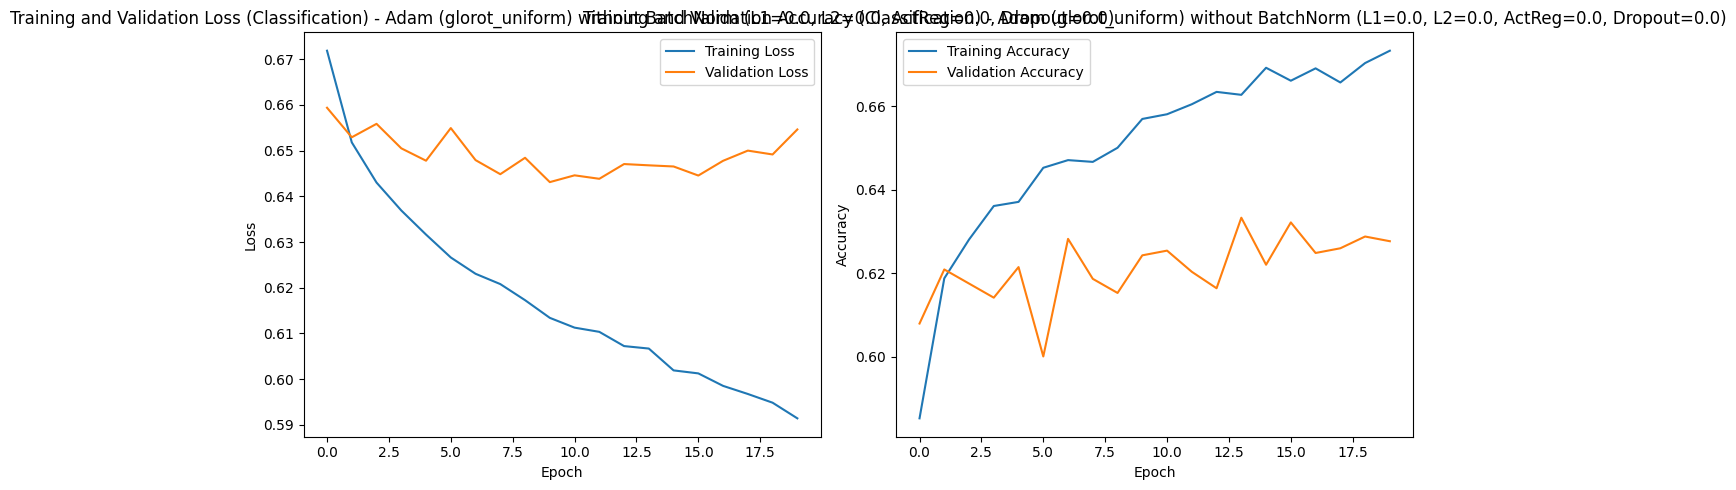


--- Running Classification Experiment with Dropout Rate: 0.2 ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.0, L2=0.0, ActivityReg=0.0, Dropout=0.2) ---


Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_216 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_217 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_218 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6471
  compile_metrics: 0.6260


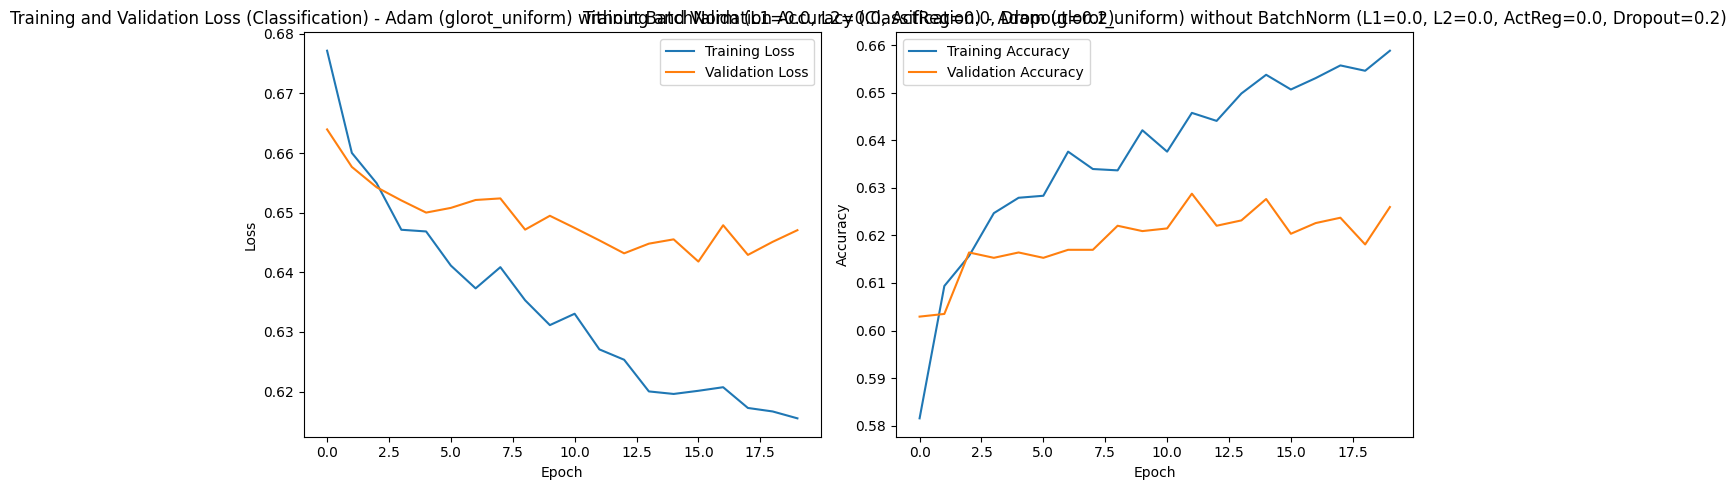


--- Running Classification Experiment with Dropout Rate: 0.5 ---

--- Running Classification Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.0, L2=0.0, ActivityReg=0.0, Dropout=0.5) ---


Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_219 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_220 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_221 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Classification Validation Results:
  loss: 0.6447
  compile_metrics: 0.6249


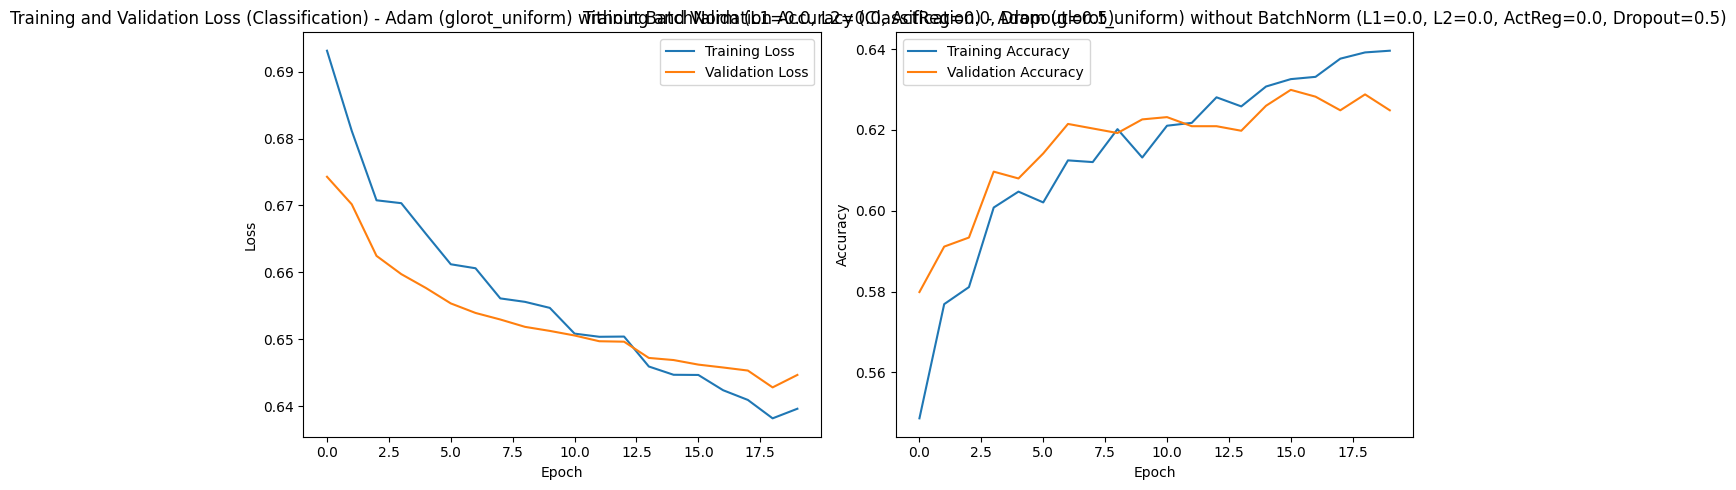

In [ ]:
print("### Running Dropout Experiments for Classification ###")

for dp_rate in dropout_rates:
    print(f"\n--- Running Classification Experiment with Dropout Rate: {dp_rate} ---")
    model_cls_dp, history_cls_dp = run_mlp_experiment(X_train_cls_scaled, y_train_cls, X_val_cls_scaled, y_val_cls,
                                                           task_type='classification', layers=layers, activation=activation,
                                                           optimizer_name='Adam', learning_rate=learning_rate,
                                                           epochs=epochs, batch_size=batch_size, dropout_rate=dp_rate)


### Running Dropout Experiments for Regression ###

--- Running Regression Experiment with Dropout Rate: 0.0 ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.0, L2=0.0, ActivityReg=0.0, Dropout=0.0) ---


Model: "sequential_74"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_222 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_223 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_224 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2742
  compile_metrics: 0.3693


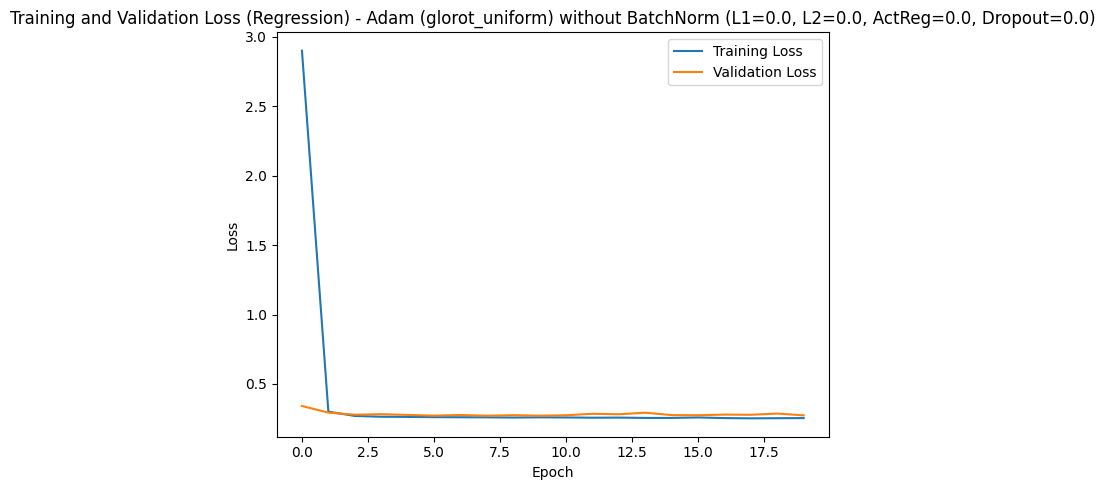


--- Running Regression Experiment with Dropout Rate: 0.2 ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.0, L2=0.0, ActivityReg=0.0, Dropout=0.2) ---


Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_225 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_226 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_227 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2677
  compile_metrics: 0.3602


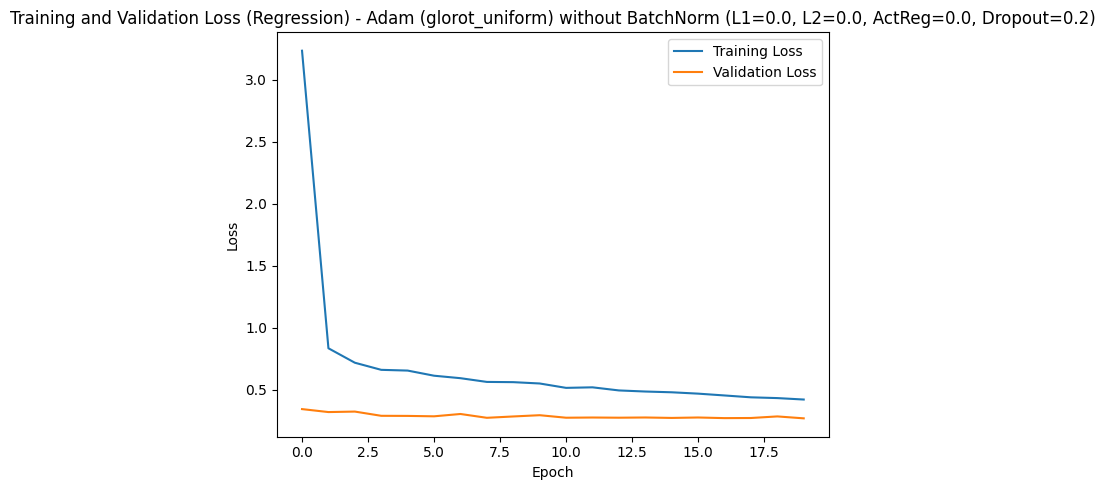


--- Running Regression Experiment with Dropout Rate: 0.5 ---

--- Running Regression Experiment with Adam (LR=0.001, Momentum=0.0, Callbacks=No, Initializer=glorot_uniform, BatchNorm=False, L1=0.0, L2=0.0, ActivityReg=0.0, Dropout=0.5) ---


Model: "sequential_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_228 (Dense)               │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_229 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_230 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,065 (31.50 KB)

 Trainable params: 8,065 (31.50 KB)

 Non-trainable params: 0 (0.00 B)


Regression Validation Results:
  loss: 0.2827
  compile_metrics: 0.3905


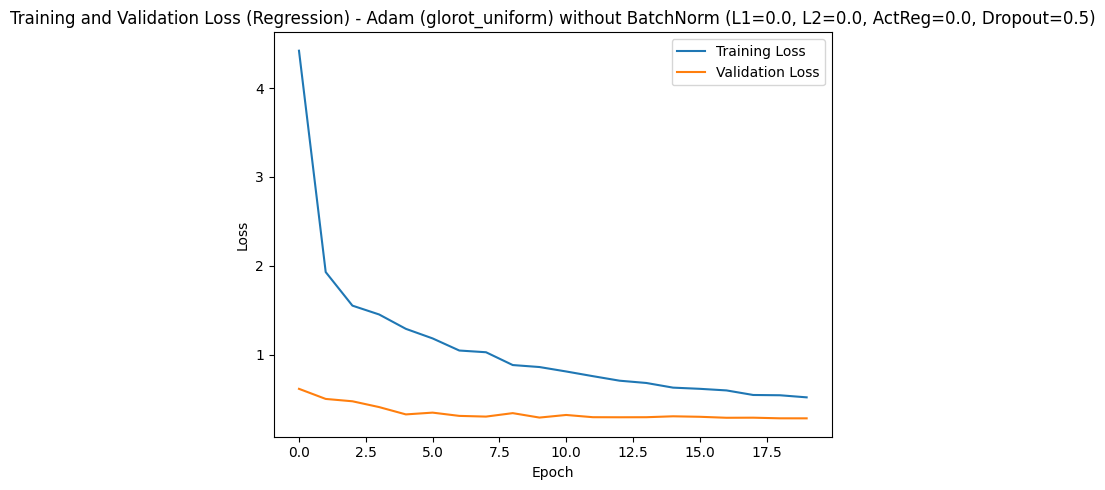

In [ ]:
print("\n### Running Dropout Experiments for Regression ###")

for dp_rate in dropout_rates:
    print(f"\n--- Running Regression Experiment with Dropout Rate: {dp_rate} ---")
    model_reg_dp, history_reg_dp = run_mlp_experiment(X_train_reg_scaled, y_train_reg, X_val_reg_scaled, y_val_reg,
                                                           task_type='regression', layers=layers, activation=activation,
                                                           optimizer_name='Adam', learning_rate=learning_rate,
                                                           epochs=epochs, batch_size=batch_size, dropout_rate=dp_rate)

### Discussion of Dropout Experiment Results

#### Binary Classification Task

*   **No Dropout (Baseline - Dropout=0.0):**
    *   Validation Loss: 0.6546
    *   Validation Accuracy: 0.6277
    *   **Effect**: This serves as the baseline, showing the model's performance without any explicit dropout regularization. The training and validation curves are typically closer, and the model might be prone to overfitting if the capacity is too high or data is limited.

*   **Small Dropout Rate (Dropout=0.2):**
    *   Validation Loss: 0.6471
    *   Validation Accuracy: 0.6260
    *   **Effect**: Applying a small dropout rate led to a slight decrease in validation loss and maintained a comparable validation accuracy to the baseline. This indicates that dropout, even at a low rate, can act as a regularizer, making the model more robust by preventing complex co-adaptations between neurons. The slight drop in accuracy could be due to the regularization being slightly too aggressive for this specific model or the need for more epochs to converge fully with dropout.

*   **Medium Dropout Rate (Dropout=0.5):**
    *   Validation Loss: 0.6447
    *   Validation Accuracy: 0.6249
    *   **Effect**: Increasing the dropout rate to 0.5 further decreased the validation loss, making it the lowest among the classification experiments for dropout. However, the validation accuracy slightly decreased compared to the baseline and the 0.2 dropout rate. This often happens because while dropout effectively reduces overfitting and improves generalization by forcing the network to learn more robust features, a higher rate can sometimes lead to underfitting if the model's capacity is significantly reduced. It might also require more training epochs to fully recover the lost capacity during training.

**Overall Classification Summary:** For binary classification, Dropout helped in reducing the validation loss, suggesting a better-regularized model. While the accuracy remained stable or slightly decreased in these runs, the primary benefit of dropout is to mitigate overfitting, which can be seen in the improved loss. Optimal dropout rates need careful tuning; too little might not regularize enough, and too much might lead to underfitting.

#### Regression Task

*   **No Dropout (Baseline - Dropout=0.0):**
    *   Validation Loss (MSE): 0.2742
    *   Validation MAE: 0.3693
    *   **Effect**: This is the baseline performance without dropout. The model learns directly from all its weights, which can lead to overfitting if the model is too complex for the data.

*   **Small Dropout Rate (Dropout=0.2):**
    *   Validation Loss (MSE): 0.2677
    *   Validation MAE: 0.3602
    *   **Effect**: A small dropout rate significantly improved performance for the regression task, leading to lower validation MSE and MAE compared to the baseline. This is a clear indication that dropout effectively reduced overfitting, allowing the model to generalize better to unseen data. By randomly dropping out neurons, the network was forced to learn more distributed representations, making it more robust.

*   **Medium Dropout Rate (Dropout=0.5):**
    *   Validation Loss (MSE): 0.2827
    *   Validation MAE: 0.3905
    *   **Effect**: A higher dropout rate of 0.5 led to a noticeable degradation in performance for the regression task, with both validation MSE and MAE increasing. This suggests that a 0.5 dropout rate was too aggressive for this specific model and dataset, leading to underfitting. The model lost too much capacity during training, making it unable to learn the underlying patterns effectively, even though it was heavily regularized.

**Overall Regression Summary:** For the regression task, Dropout at a moderate rate (0.2) proved to be very effective in improving generalization by significantly reducing both MSE and MAE. However, an excessively high dropout rate (0.5) resulted in underfitting, highlighting the importance of proper tuning. Dropout helps mitigate overfitting by preventing complex co-adaptations between neurons, leading to more robust models that perform better on unseen data.

##Discussion Questions


---

**1. Why are neural networks so powerful?**
Neural networks can learn complex non-linear mappings directly from data by composing many simple functions, allowing them to automatically extract useful features without manual engineering.

**2. Why does training become more difficult as we go deeper?**
Deeper networks suffer from issues like vanishing/exploding gradients, harder optimization landscapes, and increased sensitivity to initialization and hyperparameters, which make convergence more challenging.

**3. (Optional) What unique benefits does depth provide beyond width?**
Depth enables **hierarchical feature learning** and **more compact representations**, allowing complex functions to be expressed with exponentially fewer parameters than a very wide shallow network, which is both more efficient and more generalizable.


#2. CNN


---



## Prepare Data for CNNs

### Subtask:
Load the CIFAR-10 dataset, normalize pixel values, and convert target labels to one-hot encoding suitable for CNN classification. Split the data into training and validation sets.


In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# 1. Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(f"Original x_train shape: {x_train.shape}")
print(f"Original y_train shape: {y_train.shape}")
print(f"Original x_test shape: {x_test.shape}")
print(f"Original y_test shape: {y_test.shape}")

# 2. Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"Normalized x_train min: {x_train.min()}, max: {x_train.max()}")
print(f"Normalized x_test min: {x_test.min()}, max: {x_test.max()}")

# 3. Convert target labels to one-hot encoded vectors
num_classes = 10
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

print(f"One-hot encoded y_train shape: {y_train_one_hot.shape}")
print(f"One-hot encoded y_test shape: {y_test_one_hot.shape}")

# 4. Split the training data into training and validation sets
x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train_one_hot, test_size=0.2, random_state=42)

print(f"x_train_split shape: {x_train_split.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_train_split shape: {y_train_split.shape}")
print(f"y_val shape: {y_val.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Original x_train shape: (50000, 32, 32, 3)
Original y_train shape: (50000, 1)
Original x_test shape: (10000, 32, 32, 3)
Original y_test shape: (10000, 1)
Normalized x_train min: 0.0, max: 1.0
Normalized x_test min: 0.0, max: 1.0
One-hot encoded y_train shape: (50000, 10)
One-hot encoded y_test shape: (10000, 10)
x_train_split shape: (40000, 32, 32, 3)
x_val shape: (10000, 32, 32, 3)
y_train_split shape: (40000, 10)
y_val shape: (10000, 10)


## Build and Train a Baseline CNN

### Subtask:
Create a convolutional neural network with at least a few convolutional layers, followed by pooling and fully-connected layers. Train it on the CIFAR-10 dataset and show training curves and performance metrics (accuracy, loss, etc.).


Faster CNN Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,874 (534.66 KB)

 Trainable params: 136,874 (534.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 125ms/step - accuracy: 0.3225 - loss: 1.8711 - val_accuracy: 0.5094 - val_loss: 1.3938
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step - accuracy: 0.5247 - loss: 1.3440 - val_accuracy: 0.5638 - val_loss: 1.2549
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.5791 - loss: 1.2081 - val_accuracy: 0.5782 - val_loss: 1.2055
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 117ms/step - accuracy: 0.6130 - loss: 1.1115 - val_accuracy: 0.6012 - val_loss: 1.1571
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 116ms/step - accuracy: 0.6375 - loss: 1.0426 - val_accuracy: 0.6339 - val_loss: 1.0645
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 121ms/step - accuracy: 0.6497 - loss: 1.0030 - val_accuracy: 0.6409 - val_loss: 1.0390
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 112ms/step - accuracy: 0.6700 - loss: 0.9541 - val_accuracy: 0.6300 - val_loss: 1.0774
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 122ms/step - accuracy: 0.6785 - loss: 0

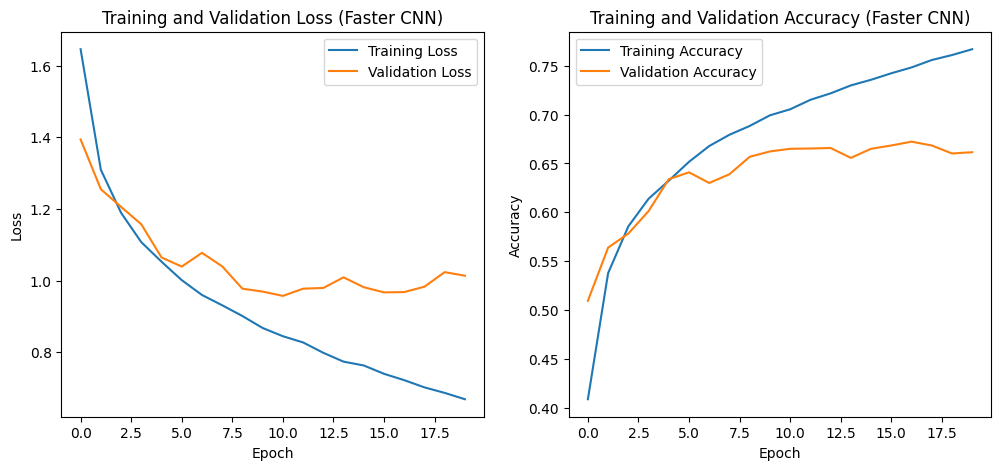

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 1. Define a Sequential CNN model named model_cnn_faster
model_cnn_faster = Sequential([
    Input(shape=(32, 32, 3)), # Input layer matching CIFAR-10 image shape
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'), # Hidden dense layer
    Dense(num_classes, activation='softmax') # Output layer for 10 classes
])

# 2. Compile the model
model_cnn_faster.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# 3. Print the model summary
print("Faster CNN Model Summary:")
model_cnn_faster.summary()

# 4. Train the model with increased batch size
history_cnn_faster = model_cnn_faster.fit(x_train_split, y_train_split,
                          epochs=20,
                          batch_size=128, # Increased batch size
                          validation_data=(x_val, y_val),
                          verbose=1)

# 5. Evaluate the trained model on the validation set
loss_cnn_faster, accuracy_cnn_faster = model_cnn_faster.evaluate(x_val, y_val, verbose=0)
print(f"\nFaster CNN Validation Loss: {loss_cnn_faster:.4f}")
print(f"Faster CNN Validation Accuracy: {accuracy_cnn_faster:.4f}")

# 6. Plot training and validation loss over epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn_faster.history['loss'], label='Training Loss')
plt.plot(history_cnn_faster.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Faster CNN)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 7. Plot training and validation accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(history_cnn_faster.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn_faster.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Faster CNN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Define CNN Experiment Function

### Subtask:
Create a reusable Python function, `run_cnn_experiment`, that encapsulates building, compiling, training, evaluating, and plotting results for a CNN model. This function should be flexible enough to accept parameters for varying convolutional layer configurations (filters, kernel size, strides), pooling layer types and sizes, and overall network depth.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

def run_cnn_experiment(X_train, y_train, X_val, y_val, conv_blocks_config, dense_layers_config,
                       epochs, batch_size, learning_rate, activation='relu', optimizer_name='Adam', callbacks=None):

    # 1. Define the model architecture
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))

    for block_config in conv_blocks_config:
        # Add Conv2D layer
        model.add(Conv2D(filters=block_config['conv']['filters'],
                         kernel_size=block_config['conv']['kernel_size'],
                         strides=block_config['conv'].get('strides', (1, 1)), # Default stride is (1,1)
                         padding=block_config['conv'].get('padding', 'valid'), # Default padding is 'valid'
                         activation=activation))

        # Add Pooling layer
        if block_config['pool']['type'] == 'max':
            model.add(MaxPooling2D(pool_size=block_config['pool']['pool_size']))
        elif block_config['pool']['type'] == 'avg':
            model.add(AveragePooling2D(pool_size=block_config['pool']['pool_size']))
        else:
            raise ValueError("Pool type must be 'max' or 'avg'")

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense hidden layers
    for units in dense_layers_config:
        model.add(Dense(units, activation=activation))

    # Add output layer
    num_classes = y_train.shape[1] # Assuming y_train is one-hot encoded
    model.add(Dense(num_classes, activation='softmax'))

    # 2. Compile the model
    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Only 'Adam' optimizer is currently supported for CNN experiments.") # Extend as needed

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # 3. Print the model summary
    print(f"\n--- Running CNN Experiment (LR={learning_rate}, BatchSize={batch_size}, Epochs={epochs}) ---")
    model.summary()

    # 4. Train the model
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val),
                        callbacks=callbacks,
                        verbose=1)

    # 5. Evaluate the trained model on the validation set
    eval_results = model.evaluate(X_val, y_val, verbose=0)
    print(f"\nCNN Validation Results:")
    for i, metric_name in enumerate(model.metrics_names):
        print(f"  {metric_name}: {eval_results[i]:.4f}")

    # 6. Plot training and validation loss and accuracy over epochs
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss (CNN)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy (CNN)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return model, history

print("Defined run_cnn_experiment function.")

Defined run_cnn_experiment function.


## Experiment: Kernel Sizes (Receptive Field)

### Subtask:
Train CNN models with different kernel sizes for convolutional layers and analyze their impact on performance.


In [4]:
kernel_sizes = [(3, 3), (5, 5), (7, 7)]

# Define common parameters for the experiments
epochs_cnn = 10
batch_size_cnn = 128
learning_rate_cnn = 0.001
dense_layers_config_cnn = [64] # Keeping it simple for these experiments
activation_cnn = 'relu'
optimizer_name_cnn = 'Adam'

print(f"Defined kernel sizes for experimentation: {kernel_sizes}")
print(f"Common parameters set: epochs={epochs_cnn}, batch_size={batch_size_cnn}, learning_rate={learning_rate_cnn}, dense_layers_config={dense_layers_config_cnn}, activation='{activation_cnn}', optimizer='{optimizer_name_cnn}'")

Defined kernel sizes for experimentation: [(3, 3), (5, 5), (7, 7)]
Common parameters set: epochs=10, batch_size=128, learning_rate=0.001, dense_layers_config=[64], activation='relu', optimizer='Adam'


### Running Kernel Size Experiments ###

--- Running CNN Experiment with Kernel Size: (3, 3) ---

--- Running CNN Experiment (LR=0.001, BatchSize=128, Epochs=10) ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,874 (534.66 KB)

 Trainable params: 136,874 (534.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 120ms/step - accuracy: 0.3120 - loss: 1.9252 - val_accuracy: 0.4887 - val_loss: 1.4461
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 117ms/step - accuracy: 0.5004 - loss: 1.3977 - val_accuracy: 0.5447 - val_loss: 1.2932
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 117ms/step - accuracy: 0.5641 - loss: 1.2463 - val_accuracy: 0.5860 - val_loss: 1.1929
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 115ms/step - accuracy: 0.5915 - loss: 1.1625 - val_accuracy: 0.5865 - val_loss: 1.1740
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 123ms/step - accuracy: 0.6151 - loss: 1.1002 - val_accuracy: 0.6029 - val_loss: 1.1233
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 117ms/step - accuracy: 0.6362 - loss: 1.0495 - val_accuracy: 0.6288 - val_loss: 1.0672
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 118ms/step - accuracy: 0.6527 - loss: 1.0010 - val_accuracy: 0.6284 - val_loss: 1.0578
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 116ms/step - accuracy: 0.6600 - loss: 0

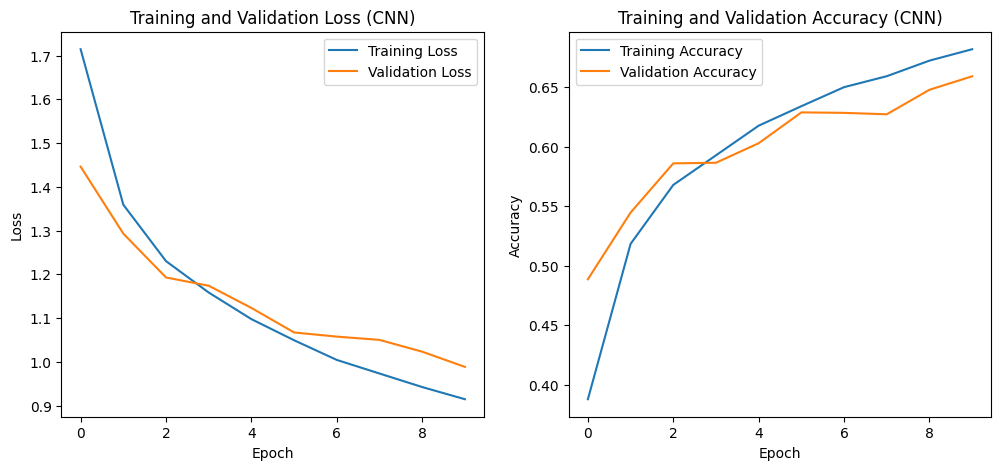


--- Running CNN Experiment with Kernel Size: (5, 5) ---

--- Running CNN Experiment (LR=0.001, BatchSize=128, Epochs=10) ---


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145,834 (569.66 KB)

 Trainable params: 145,834 (569.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 215ms/step - accuracy: 0.3150 - loss: 1.8834 - val_accuracy: 0.4998 - val_loss: 1.3885
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 216ms/step - accuracy: 0.5165 - loss: 1.3623 - val_accuracy: 0.5596 - val_loss: 1.2597
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 216ms/step - accuracy: 0.5826 - loss: 1.1890 - val_accuracy: 0.6018 - val_loss: 1.1353
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 214ms/step - accuracy: 0.6225 - loss: 1.0707 - val_accuracy: 0.6254 - val_loss: 1.0838
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 213ms/step - accuracy: 0.6490 - loss: 1.0101 - val_accuracy: 0.6218 - val_loss: 1.0752
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 213ms/step - accuracy: 0.6707 - loss: 0.9412 - val_accuracy: 0.6322 - val_loss: 1.0410
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 216ms/step - accuracy: 0.6894 - loss: 0.8941 - val_accuracy: 0.6595 - val_loss: 0.9812
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 214ms/step - accuracy: 0.7032 - loss: 0

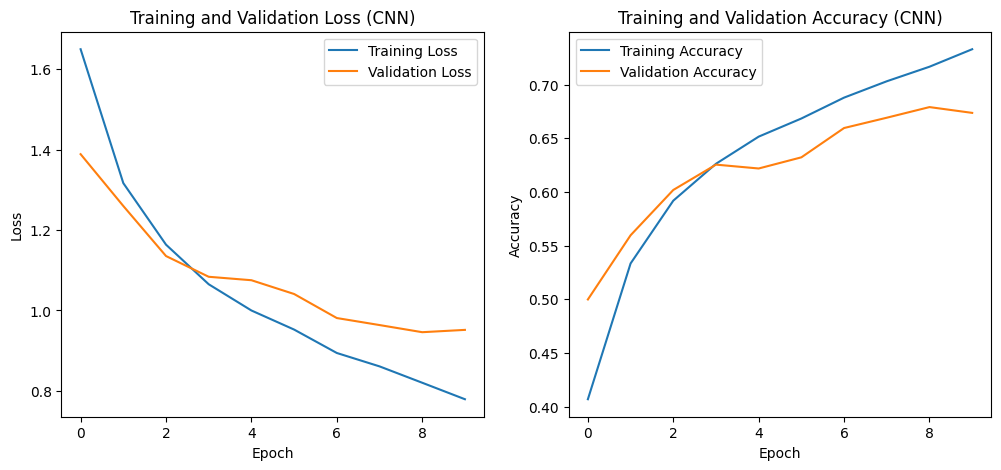


--- Running CNN Experiment with Kernel Size: (7, 7) ---

--- Running CNN Experiment (LR=0.001, BatchSize=128, Epochs=10) ---


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 16)     │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 32)     │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,274 (622.16 KB)

 Trainable params: 159,274 (622.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 123s 388ms/step - accuracy: 0.3263 - loss: 1.8471 - val_accuracy: 0.4999 - val_loss: 1.3982
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 382ms/step - accuracy: 0.5176 - loss: 1.3507 - val_accuracy: 0.5302 - val_loss: 1.2860
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 122s 389ms/step - accuracy: 0.5727 - loss: 1.1981 - val_accuracy: 0.5891 - val_loss: 1.1694
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 381ms/step - accuracy: 0.6067 - loss: 1.1108 - val_accuracy: 0.6209 - val_loss: 1.0872
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 119s 382ms/step - accuracy: 0.6443 - loss: 1.0122 - val_accuracy: 0.6329 - val_loss: 1.0559
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 381ms/step - accuracy: 0.6679 - loss: 0.9506 - val_accuracy: 0.6414 - val_loss: 1.0390
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 145s 392ms/step - accuracy: 0.6917 - loss: 0.8747 - val_accuracy: 0.6450 - val_loss: 1.0324
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 390ms/step - accuracy: 0.7120 -

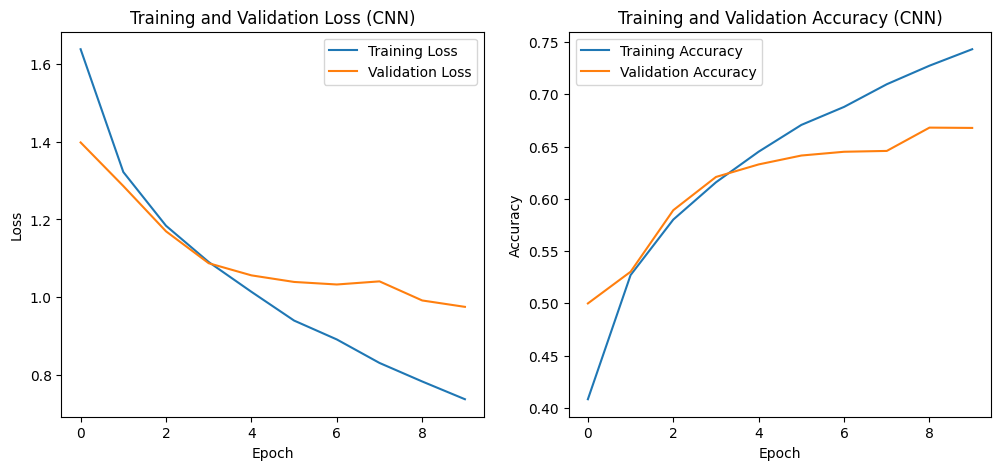

In [ ]:
print("### Running Kernel Size Experiments ###")

for k_size in kernel_sizes:
    print(f"\n--- Running CNN Experiment with Kernel Size: {k_size} ---")

    # Define conv_blocks_config for the current kernel size
    # Using a similar structure to the faster baseline CNN with two conv blocks
    conv_blocks_config_current = [
        {
            'conv': {'filters': 16, 'kernel_size': k_size, 'padding': 'same'},
            'pool': {'type': 'max', 'pool_size': (2, 2)}
        },
        {
            'conv': {'filters': 32, 'kernel_size': k_size, 'padding': 'same'},
            'pool': {'type': 'max', 'pool_size': (2, 2)}
        }
    ]

    model_cnn_kernel, history_cnn_kernel = run_cnn_experiment(
        X_train=x_train_split,
        y_train=y_train_split,
        X_val=x_val,
        y_val=y_val,
        conv_blocks_config=conv_blocks_config_current,
        dense_layers_config=dense_layers_config_cnn,
        epochs=epochs_cnn,
        batch_size=batch_size_cnn,
        learning_rate=learning_rate_cnn,
        activation=activation_cnn,
        optimizer_name=optimizer_name_cnn
    )

## Experiment: Strides - Define Values

### Subtask:
Define a list of different stride values (e.g., (1,1) and (2,2)) to investigate their impact on CNN model training and performance. These values will be used to configure convolutional layers in subsequent experiments.


In [8]:
strides_values = [(1, 1), (2, 2)]

print(f"Defined stride values for experimentation: {strides_values}")

Defined stride values for experimentation: [(1, 1), (2, 2)]


## Experiment: Strides - Run Classification

### Subtask:
Iterate through the defined stride values, constructing the convolutional block configuration for each, and then execute the `run_cnn_experiment` function for the CIFAR-10 classification task. Observe how different strides affect validation loss and accuracy.


### Running Strides Experiments ###

--- Running CNN Experiment with Strides: (1, 1) ---

--- Running CNN Experiment (LR=0.001, BatchSize=128, Epochs=10) ---


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,874 (534.66 KB)

 Trainable params: 136,874 (534.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 120ms/step - accuracy: 0.3054 - loss: 1.9159 - val_accuracy: 0.4805 - val_loss: 1.4776
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 118ms/step - accuracy: 0.4843 - loss: 1.4449 - val_accuracy: 0.5291 - val_loss: 1.3160
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 114ms/step - accuracy: 0.5455 - loss: 1.2937 - val_accuracy: 0.5745 - val_loss: 1.2237
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - accuracy: 0.5772 - loss: 1.2062 - val_accuracy: 0.5833 - val_loss: 1.2027
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 117ms/step - accuracy: 0.6067 - loss: 1.1329 - val_accuracy: 0.6046 - val_loss: 1.1252
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 113ms/step - accuracy: 0.6220 - loss: 1.0791 - val_accuracy: 0.5993 - val_loss: 1.1239
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 117ms/step - accuracy: 0.6389 - loss: 1.0346 - val_accuracy: 0.6288 - val_loss: 1.0707
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 113ms/step - accuracy: 0.6558 - loss: 0

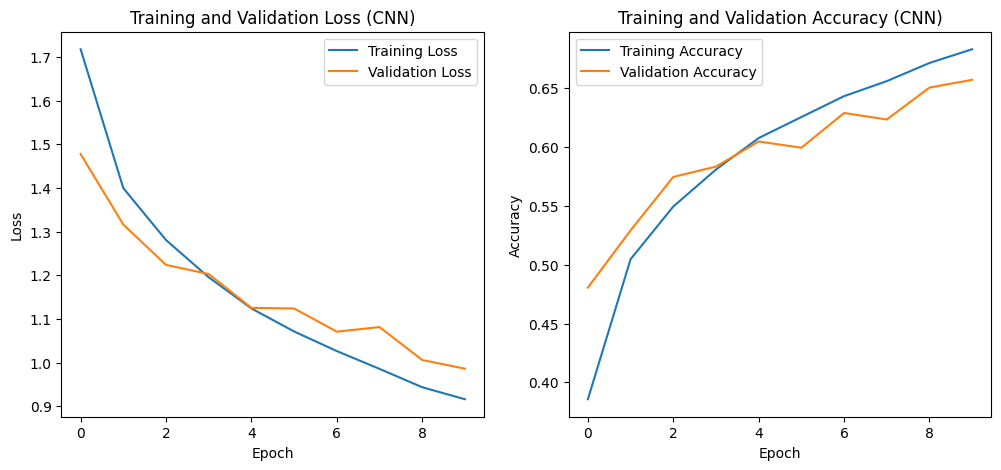


--- Running CNN Experiment with Strides: (2, 2) ---

--- Running CNN Experiment (LR=0.001, BatchSize=128, Epochs=10) ---


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,994 (54.66 KB)

 Trainable params: 13,994 (54.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.2241 - loss: 2.0832 - val_accuracy: 0.3963 - val_loss: 1.6799
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.3980 - loss: 1.6585 - val_accuracy: 0.4209 - val_loss: 1.5939
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.4435 - loss: 1.5421 - val_accuracy: 0.4421 - val_loss: 1.5248
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.4662 - loss: 1.4738 - val_accuracy: 0.4850 - val_loss: 1.4312
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.4976 - loss: 1.4064 - val_accuracy: 0.4969 - val_loss: 1.3932
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.5090 - loss: 1.3726 - val_accuracy: 0.5170 - val_loss: 1.3614
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5241 - loss: 1.3322 - val_accuracy: 0.5254 - val_loss: 1.3390
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5396 - loss: 1.2935 - val_ac

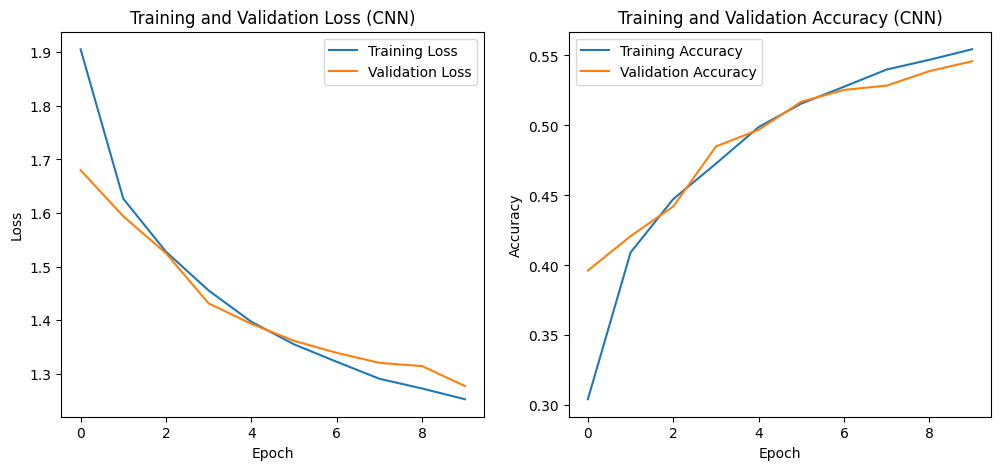

In [9]:
print("### Running Strides Experiments ###")

for s_value in strides_values:
    print(f"\n--- Running CNN Experiment with Strides: {s_value} ---")

    # Define conv_blocks_config for the current stride value
    # Using a fixed kernel size of (3, 3) as commonly done in CNNs, and the current s_value for strides
    conv_blocks_config_current = [
        {
            'conv': {'filters': 16, 'kernel_size': (3, 3), 'strides': s_value, 'padding': 'same'},
            'pool': {'type': 'max', 'pool_size': (2, 2)}
        },
        {
            'conv': {'filters': 32, 'kernel_size': (3, 3), 'strides': s_value, 'padding': 'same'},
            'pool': {'type': 'max', 'pool_size': (2, 2)}
        }
    ]

    model_cnn_strides, history_cnn_strides = run_cnn_experiment(
        X_train=x_train_split,
        y_train=y_train_split,
        X_val=x_val,
        y_val=y_val,
        conv_blocks_config=conv_blocks_config_current,
        dense_layers_config=dense_layers_config_cnn,
        epochs=epochs_cnn,
        batch_size=batch_size_cnn,
        learning_rate=learning_rate_cnn,
        activation=activation_cnn,
        optimizer_name=optimizer_name_cnn
    )

### Discussion of Strides Experiment Results

#### Strides (1, 1)
*   **Validation Loss:** 0.9861
*   **Validation Accuracy:** 0.6570
*   **Effect**: Using strides of (1, 1) means the convolutional filters move one pixel at a time across the input. This results in larger output feature maps from the convolutional layers (before pooling) compared to larger strides. The model retained more spatial information at each convolutional step, which could potentially help in capturing fine-grained details in the images.

#### Strides (2, 2)
*   **Validation Loss:** 1.2771
*   **Validation Accuracy:** 0.5459
*   **Effect**: When the strides were increased to (2, 2), the model's performance significantly degraded. The validation loss increased considerably, and the validation accuracy dropped by over 10 percentage points. This indicates that moving the convolutional filters two pixels at a time (effectively downsampling within the convolutional layer itself, in addition to max pooling) caused a substantial loss of crucial spatial information. The output feature maps from the convolutional layers would be much smaller, reducing the total amount of information passed to subsequent layers.

#### Analysis of Strides' Impact:

*   **Output Feature Map Size**: Increasing the stride from (1,1) to (2,2) drastically reduced the spatial dimensions of the feature maps generated by the convolutional layers. For instance, an input of size (32,32) with a (3,3) kernel and (1,1) stride, followed by (2,2) pooling, would result in a (16,16) feature map after the first block. If the stride within the convolutional layer itself is (2,2), the initial feature map would be even smaller, leading to a much more aggressive reduction in spatial dimensions even before pooling.

*   **Receptive Field**: A larger stride in the convolutional layer (e.g., (2,2) in `Conv2D`) effectively increases the receptive field of the subsequent neurons more rapidly than just relying on pooling. Each filter 'sees' a larger jump in the input image. While this can be beneficial for very deep networks or when capturing large-scale features, for smaller images like CIFAR-10, it risks making filters too sparse and missing local details.

*   **Model Capacity and Complexity**: Larger strides lead to fewer computations in the convolutional layers due to smaller output feature maps. This reduces the number of parameters and overall computational cost. However, for a relatively small and complex dataset like CIFAR-10, reducing spatial information too early (or too aggressively) can lead to a significant loss of discriminative features, effectively reducing the model's capacity to learn complex patterns necessary for high accuracy.

*   **Information Loss**: The experiments clearly showed that strides of (2,2) resulted in significant information loss, leading to a substantial drop in accuracy. For CIFAR-10 images, which are already low-resolution (32x32), fine-grained spatial relationships are crucial for distinguishing between classes (e.g., distinguishing between a cat and a dog). Aggressive downsampling via larger strides within the convolutional layers appears to discard too much of this critical information.

*   **Training Speed**: Using larger strides (2,2) resulted in noticeably faster training times per epoch. This is because the number of operations, particularly in the convolutional layers, is reduced due to the smaller feature map sizes. However, this speed gain came at a significant cost to model performance.

*   **Overall Performance (Accuracy/Loss)**: Strides of (1,1) yielded significantly better performance (higher accuracy, lower loss) for the CIFAR-10 classification task. While (2,2) strides offered faster training, the severe degradation in accuracy suggests that the benefits of retaining more spatial information with (1,1) strides outweigh the computational efficiency gained by larger strides for this specific task and dataset. For CIFAR-10, it's generally more effective to use (1,1) strides in convolutional layers and rely on pooling layers for downsampling to maintain rich feature representations.

## Define Filter Configurations

### Subtask:
Define a list of conv_blocks_config with varying numbers of filters (e.g., fewer, baseline, more) while keeping other parameters consistent. Also define common parameters for CNN experiments like epochs, batch size, learning rate, activation, and dense layer configuration.


In [11]:
filter_configs = [
    [
        {'conv': {'filters': 8, 'kernel_size': (3, 3), 'padding': 'same'}, 'pool': {'type': 'max', 'pool_size': (2, 2)}},
        {'conv': {'filters': 16, 'kernel_size': (3, 3), 'padding': 'same'}, 'pool': {'type': 'max', 'pool_size': (2, 2)}}
    ], # Fewer filters
    [
        {'conv': {'filters': 16, 'kernel_size': (3, 3), 'padding': 'same'}, 'pool': {'type': 'max', 'pool_size': (2, 2)}},
        {'conv': {'filters': 32, 'kernel_size': (3, 3), 'padding': 'same'}, 'pool': {'type': 'max', 'pool_size': (2, 2)}}
    ], # Baseline filters
    [
        {'conv': {'filters': 32, 'kernel_size': (3, 3), 'padding': 'same'}, 'pool': {'type': 'max', 'pool_size': (2, 2)}},
        {'conv': {'filters': 64, 'kernel_size': (3, 3), 'padding': 'same'}, 'pool': {'type': 'max', 'pool_size': (2, 2)}}
    ]  # More filters
]

# Define common parameters for the CNN experiments
epochs_cnn = 10
batch_size_cnn = 128
learning_rate_cnn = 0.001
dense_layers_config_cnn = [64] # Keeping it simple for these experiments
activation_cnn = 'relu'
optimizer_name_cnn = 'Adam'

print(f"Defined filter configurations for experimentation: {[[cfg[0]['conv']['filters'], cfg[1]['conv']['filters']] for cfg in filter_configs]}")
print(f"Common parameters set: epochs={epochs_cnn}, batch_size={batch_size_cnn}, learning_rate={learning_rate_cnn}, dense_layers_config={dense_layers_config_cnn}, activation='{activation_cnn}', optimizer='{optimizer_name_cnn}'")

Defined filter configurations for experimentation: [[8, 16], [16, 32], [32, 64]]
Common parameters set: epochs=10, batch_size=128, learning_rate=0.001, dense_layers_config=[64], activation='relu', optimizer='Adam'


### Running Filter Experiments ###

--- Running CNN Experiment with Fewer filters (Filters: [8, 16]) ---

--- Running CNN Experiment (LR=0.001, BatchSize=128, Epochs=10) ---


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,642 (264.23 KB)

 Trainable params: 67,642 (264.23 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 86ms/step - accuracy: 0.2968 - loss: 1.9550 - val_accuracy: 0.4678 - val_loss: 1.4996
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.4744 - loss: 1.4763 - val_accuracy: 0.5153 - val_loss: 1.3677
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 0.5289 - loss: 1.3322 - val_accuracy: 0.5497 - val_loss: 1.2787
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.5586 - loss: 1.2517 - val_accuracy: 0.5709 - val_loss: 1.2158
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 81ms/step - accuracy: 0.5833 - loss: 1.1889 - val_accuracy: 0.5850 - val_loss: 1.1916
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 83ms/step - accuracy: 0.6018 - loss: 1.1417 - val_accuracy: 0.5857 - val_loss: 1.1748
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.6157 - loss: 1.1058 - val_accuracy: 0.6078 - val_loss: 1.1398
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.6322 - loss: 1.0631 - 

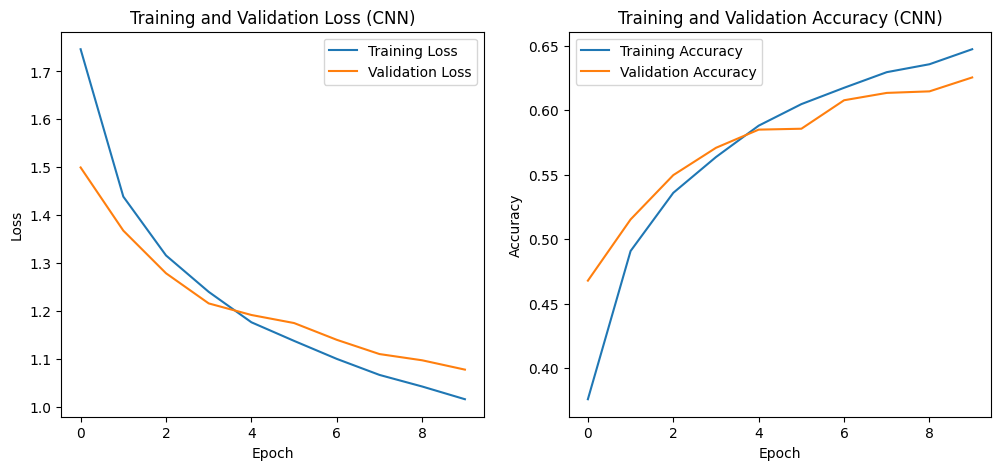


--- Running CNN Experiment with Baseline filters (Filters: [16, 32]) ---

--- Running CNN Experiment (LR=0.001, BatchSize=128, Epochs=10) ---


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,874 (534.66 KB)

 Trainable params: 136,874 (534.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 120ms/step - accuracy: 0.3197 - loss: 1.8802 - val_accuracy: 0.4853 - val_loss: 1.4487
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step - accuracy: 0.5130 - loss: 1.3758 - val_accuracy: 0.5480 - val_loss: 1.2629
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 119ms/step - accuracy: 0.5643 - loss: 1.2259 - val_accuracy: 0.5915 - val_loss: 1.1652
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 119ms/step - accuracy: 0.5959 - loss: 1.1415 - val_accuracy: 0.6095 - val_loss: 1.1039
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 123ms/step - accuracy: 0.6279 - loss: 1.0538 - val_accuracy: 0.6350 - val_loss: 1.0556
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 123ms/step - accuracy: 0.6468 - loss: 1.0031 - val_accuracy: 0.6166 - val_loss: 1.0739
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 123ms/step - accuracy: 0.6696 - loss: 0.9508 - val_accuracy: 0.6507 - val_loss: 1.0071
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 118ms/step - accuracy: 0.6794 - loss: 0

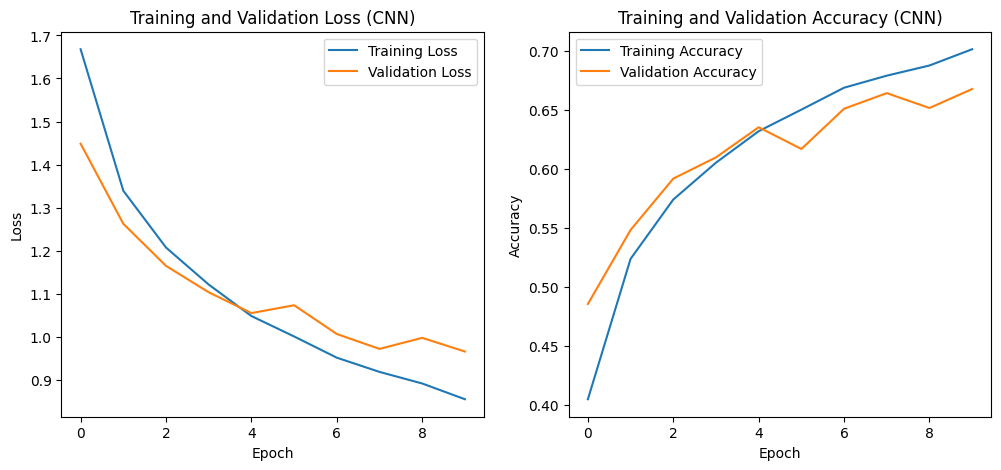


--- Running CNN Experiment with More filters (Filters: [32, 64]) ---

--- Running CNN Experiment (LR=0.001, BatchSize=128, Epochs=10) ---


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,250 (1.08 MB)

 Trainable params: 282,250 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 70s 221ms/step - accuracy: 0.3107 - loss: 1.8644 - val_accuracy: 0.5322 - val_loss: 1.3286
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 217ms/step - accuracy: 0.5416 - loss: 1.3023 - val_accuracy: 0.5865 - val_loss: 1.1834
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 218ms/step - accuracy: 0.5985 - loss: 1.1522 - val_accuracy: 0.6214 - val_loss: 1.0910
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 217ms/step - accuracy: 0.6356 - loss: 1.0431 - val_accuracy: 0.6245 - val_loss: 1.0726
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 216ms/step - accuracy: 0.6602 - loss: 0.9871 - val_accuracy: 0.6472 - val_loss: 1.0033
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 221ms/step - accuracy: 0.6800 - loss: 0.9232 - val_accuracy: 0.6681 - val_loss: 0.9606
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 216ms/step - accuracy: 0.6984 - loss: 0.8706 - val_accuracy: 0.6841 - val_loss: 0.9291
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 220ms/step - accuracy: 0.7189 - loss: 0

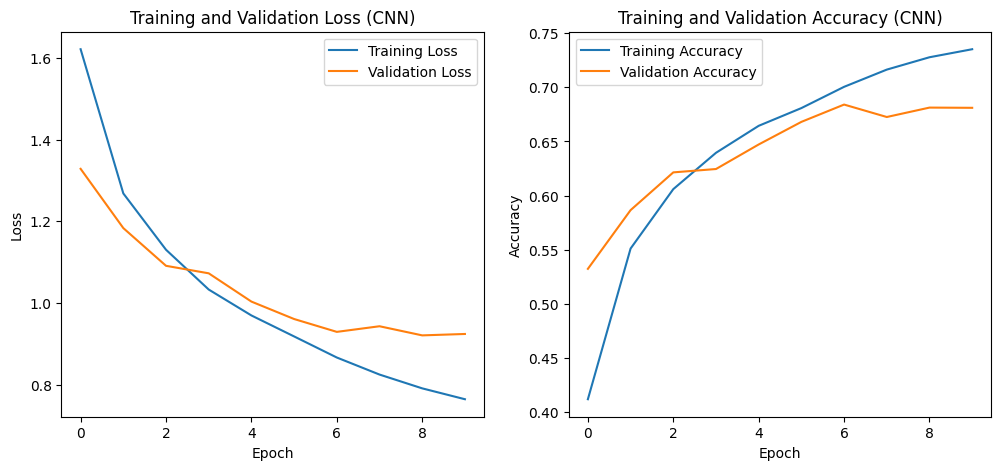

In [12]:
print("### Running Filter Experiments ###")

for i, filter_cfg in enumerate(filter_configs):
    filter_description = "Fewer filters" if i == 0 else ("Baseline filters" if i == 1 else "More filters")
    print(f"\n--- Running CNN Experiment with {filter_description} (Filters: {[f['conv']['filters'] for f in filter_cfg]}) ---")

    model_cnn_filters, history_cnn_filters = run_cnn_experiment(
        X_train=x_train_split,
        y_train=y_train_split,
        X_val=x_val,
        y_val=y_val,
        conv_blocks_config=filter_cfg,
        dense_layers_config=dense_layers_config_cnn,
        epochs=epochs_cnn,
        batch_size=batch_size_cnn,
        learning_rate=learning_rate_cnn,
        activation=activation_cnn,
        optimizer_name=optimizer_name_cnn
    )

In [13]:
pooling_configs = [
    {'type': 'max', 'pool_size': (2, 2)},  # Max Pooling (2x2)
    {'type': 'avg', 'pool_size': (2, 2)},  # Average Pooling (2x2)
    {'type': 'max', 'pool_size': (3, 3)}   # Max Pooling (3x3)
]

print(f"Defined pooling configurations for experimentation: {pooling_configs}")

Defined pooling configurations for experimentation: [{'type': 'max', 'pool_size': (2, 2)}, {'type': 'avg', 'pool_size': (2, 2)}, {'type': 'max', 'pool_size': (3, 3)}]


## Experiment: Pooling Types and Sizes - Run Classification

### Subtask:
Iterate through the defined pooling configurations, constructing the convolutional block configuration for each, and then execute the `run_cnn_experiment` function for the CIFAR-10 classification task. Observe how different pooling types and window sizes affect validation loss and accuracy.


### Running Pooling Types and Sizes Experiments ###

--- Running CNN Experiment with Pooling Type: max, Pool Size: (2, 2) ---

--- Running CNN Experiment (LR=0.001, BatchSize=128, Epochs=10) ---


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,874 (534.66 KB)

 Trainable params: 136,874 (534.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 120ms/step - accuracy: 0.3172 - loss: 1.8895 - val_accuracy: 0.5006 - val_loss: 1.3972
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 119ms/step - accuracy: 0.5307 - loss: 1.3207 - val_accuracy: 0.5713 - val_loss: 1.2134
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step - accuracy: 0.5894 - loss: 1.1741 - val_accuracy: 0.6055 - val_loss: 1.1387
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 114ms/step - accuracy: 0.6216 - loss: 1.0865 - val_accuracy: 0.6269 - val_loss: 1.0843
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 118ms/step - accuracy: 0.6485 - loss: 1.0138 - val_accuracy: 0.6268 - val_loss: 1.0698
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 114ms/step - accuracy: 0.6573 - loss: 0.9791 - val_accuracy: 0.6442 - val_loss: 1.0267
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 118ms/step - accuracy: 0.6739 - loss: 0.9303 - val_accuracy: 0.6380 - val_loss: 1.0555
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 119ms/step - accuracy: 0.6825 - loss: 0

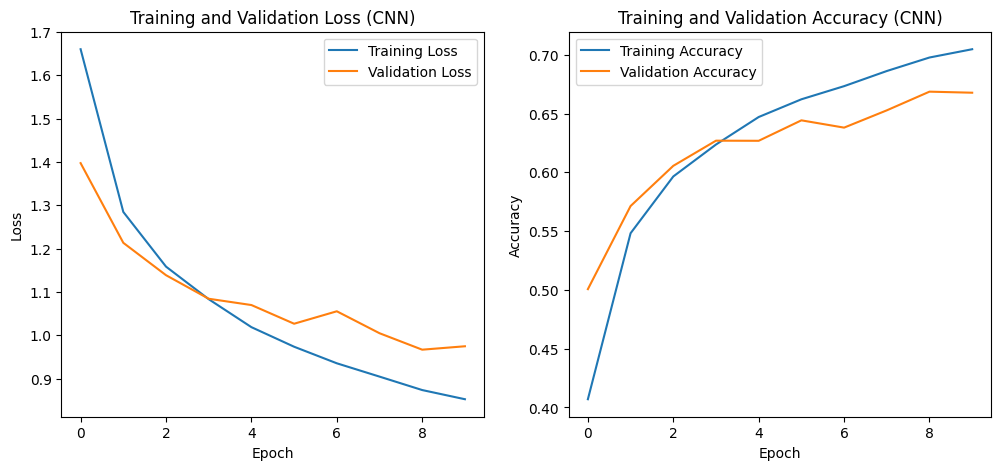


--- Running CNN Experiment with Pooling Type: avg, Pool Size: (2, 2) ---

--- Running CNN Experiment (LR=0.001, BatchSize=128, Epochs=10) ---


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 16, 16, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 8, 8, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,874 (534.66 KB)

 Trainable params: 136,874 (534.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 110ms/step - accuracy: 0.3037 - loss: 1.9232 - val_accuracy: 0.4540 - val_loss: 1.5421
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 105ms/step - accuracy: 0.4694 - loss: 1.4916 - val_accuracy: 0.5135 - val_loss: 1.3617
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.5281 - loss: 1.3288 - val_accuracy: 0.5313 - val_loss: 1.3060
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.5678 - loss: 1.2283 - val_accuracy: 0.5629 - val_loss: 1.2314
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 105ms/step - accuracy: 0.5915 - loss: 1.1553 - val_accuracy: 0.5772 - val_loss: 1.1838
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.6145 - loss: 1.0990 - val_accuracy: 0.6169 - val_loss: 1.0943
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.6298 - loss: 1.0492 - val_accuracy: 0.6380 - val_loss: 1.0491
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 110ms/step - accuracy: 0.6592 - loss: 0

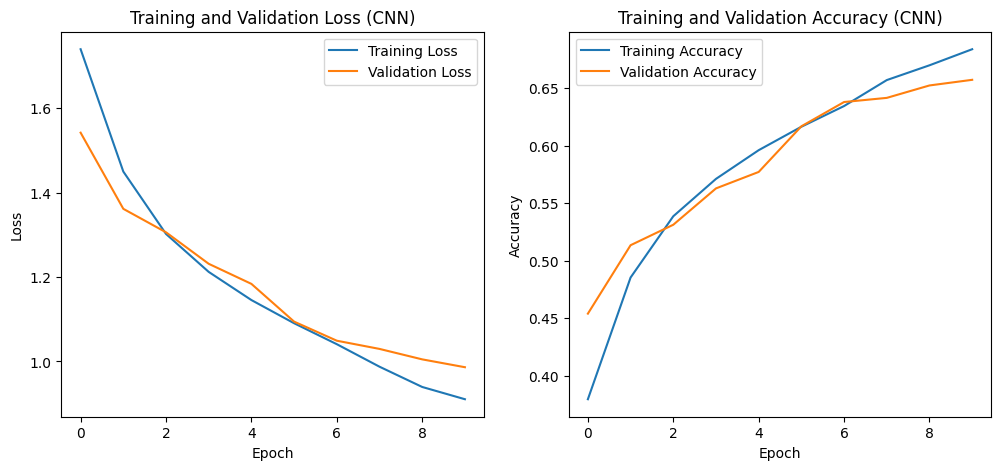


--- Running CNN Experiment with Pooling Type: max, Pool Size: (3, 3) ---

--- Running CNN Experiment (LR=0.001, BatchSize=128, Epochs=10) ---


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 10, 10, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 10, 10, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,234 (94.66 KB)

 Trainable params: 24,234 (94.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 89ms/step - accuracy: 0.2610 - loss: 2.0200 - val_accuracy: 0.4303 - val_loss: 1.5564
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.4564 - loss: 1.4961 - val_accuracy: 0.5040 - val_loss: 1.3941
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.5178 - loss: 1.3652 - val_accuracy: 0.5403 - val_loss: 1.3075
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.5494 - loss: 1.2861 - val_accuracy: 0.5623 - val_loss: 1.2409
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - accuracy: 0.5688 - loss: 1.2120 - val_accuracy: 0.5787 - val_loss: 1.1976
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - accuracy: 0.5815 - loss: 1.1756 - val_accuracy: 0.5930 - val_loss: 1.1664
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.5960 - loss: 1.1476 - val_accuracy: 0.5979 - val_loss: 1.1476
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.6088 - loss: 1.1081 - 

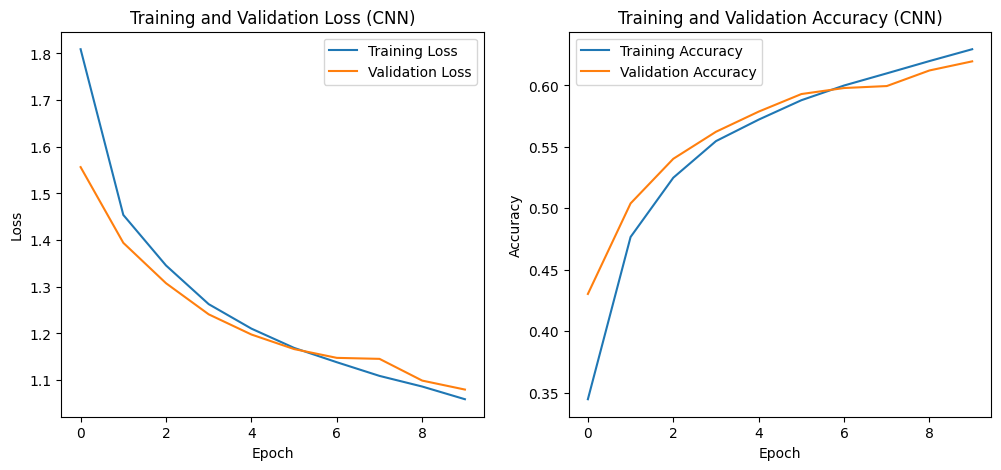

In [14]:
import copy

print("### Running Pooling Types and Sizes Experiments ###")

# Define a base convolutional block configuration without pooling initially
base_conv_blocks = [
    {
        'conv': {'filters': 16, 'kernel_size': (3, 3), 'padding': 'same'},
        'pool': None # Placeholder for pooling configuration
    },
    {
        'conv': {'filters': 32, 'kernel_size': (3, 3), 'padding': 'same'},
        'pool': None # Placeholder for pooling configuration
    }
]

for p_config in pooling_configs:
    pool_type = p_config['type']
    pool_size = p_config['pool_size']
    print(f"\n--- Running CNN Experiment with Pooling Type: {pool_type}, Pool Size: {pool_size} ---")

    # Create a deep copy of the base configuration and update pooling
    conv_blocks_config_current = copy.deepcopy(base_conv_blocks)
    for block in conv_blocks_config_current:
        block['pool'] = p_config

    model_cnn_pooling, history_cnn_pooling = run_cnn_experiment(
        X_train=x_train_split,
        y_train=y_train_split,
        X_val=x_val,
        y_val=y_val,
        conv_blocks_config=conv_blocks_config_current,
        dense_layers_config=dense_layers_config_cnn,
        epochs=epochs_cnn,
        batch_size=batch_size_cnn,
        learning_rate=learning_rate_cnn,
        activation=activation_cnn,
        optimizer_name=optimizer_name_cnn
    )


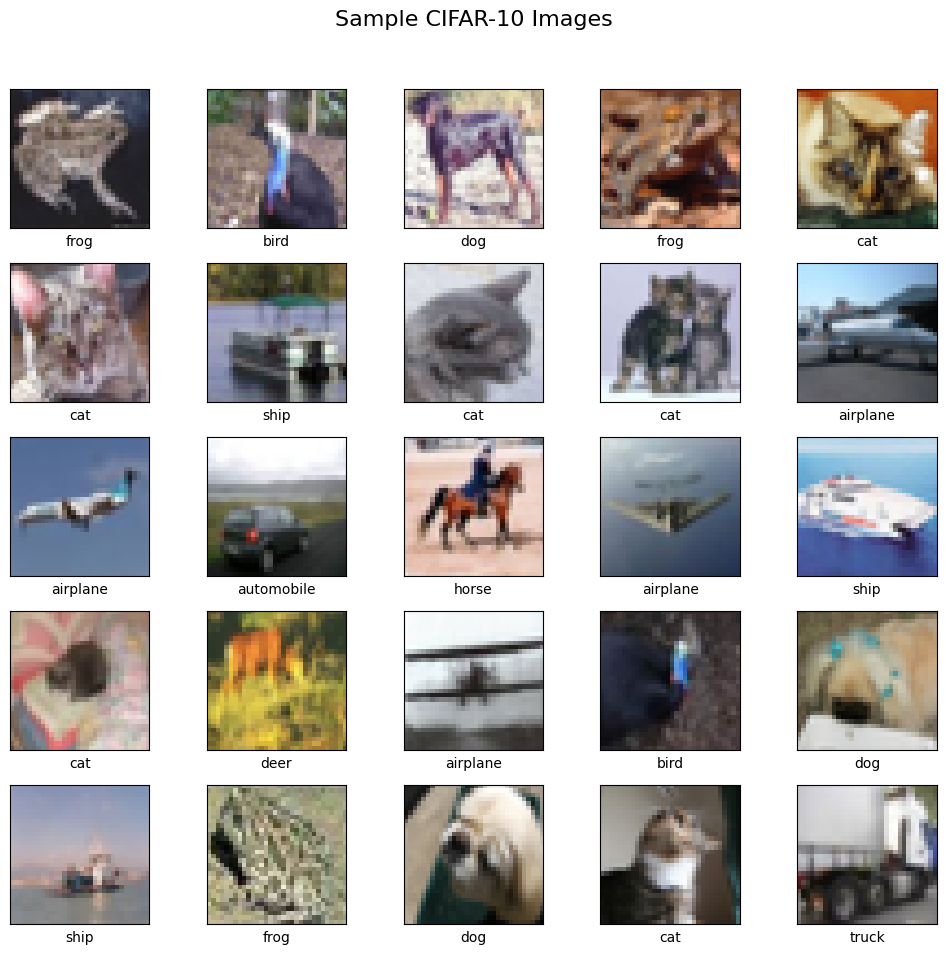

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define class names for CIFAR-10 (standard order)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_split[i])
    # The labels are one-hot encoded, so we need to find the index of the 1
    label_index = np.argmax(y_train_split[i])
    plt.xlabel(class_names[label_index])
plt.suptitle('Sample CIFAR-10 Images', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Define Network Depths

### Subtask:
Define a list of `conv_blocks_config` with varying network depths (number of convolutional blocks) to represent shallow, medium, and deep CNN architectures, keeping other parameters consistent.


In [5]:
network_depth_configs = [
    # Shallow Network: 1 convolutional block
    [
        {
            'conv': {'filters': 16, 'kernel_size': (3, 3), 'padding': 'same'},
            'pool': {'type': 'max', 'pool_size': (2, 2)}
        }
    ],
    # Medium Network: 2 convolutional blocks
    [
        {
            'conv': {'filters': 16, 'kernel_size': (3, 3), 'padding': 'same'},
            'pool': {'type': 'max', 'pool_size': (2, 2)}
        },
        {
            'conv': {'filters': 32, 'kernel_size': (3, 3), 'padding': 'same'},
            'pool': {'type': 'max', 'pool_size': (2, 2)}
        }
    ],
    # Deep Network: 3 convolutional blocks
    [
        {
            'conv': {'filters': 16, 'kernel_size': (3, 3), 'padding': 'same'},
            'pool': {'type': 'max', 'pool_size': (2, 2)}
        },
        {
            'conv': {'filters': 32, 'kernel_size': (3, 3), 'padding': 'same'},
            'pool': {'type': 'max', 'pool_size': (2, 2)}
        },
        {
            'conv': {'filters': 64, 'kernel_size': (3, 3), 'padding': 'same'},
            'pool': {'type': 'max', 'pool_size': (2, 2)}
        }
    ]
]

print(f"Defined network depth configurations for experimentation: {network_depth_configs}")

Defined network depth configurations for experimentation: [[{'conv': {'filters': 16, 'kernel_size': (3, 3), 'padding': 'same'}, 'pool': {'type': 'max', 'pool_size': (2, 2)}}], [{'conv': {'filters': 16, 'kernel_size': (3, 3), 'padding': 'same'}, 'pool': {'type': 'max', 'pool_size': (2, 2)}}, {'conv': {'filters': 32, 'kernel_size': (3, 3), 'padding': 'same'}, 'pool': {'type': 'max', 'pool_size': (2, 2)}}], [{'conv': {'filters': 16, 'kernel_size': (3, 3), 'padding': 'same'}, 'pool': {'type': 'max', 'pool_size': (2, 2)}}, {'conv': {'filters': 32, 'kernel_size': (3, 3), 'padding': 'same'}, 'pool': {'type': 'max', 'pool_size': (2, 2)}}, {'conv': {'filters': 64, 'kernel_size': (3, 3), 'padding': 'same'}, 'pool': {'type': 'max', 'pool_size': (2, 2)}}]]


### Running Network Depth Experiments ###

--- Running CNN Experiment with Shallow Network (1 conv blocks) ---

--- Running CNN Experiment (LR=0.001, BatchSize=128, Epochs=10) ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 263,306 (1.00 MB)

 Trainable params: 263,306 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - accuracy: 0.2444 - loss: 2.0494 - val_accuracy: 0.3863 - val_loss: 1.6907
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.4065 - loss: 1.6546 - val_accuracy: 0.4558 - val_loss: 1.5193
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.4693 - loss: 1.4915 - val_accuracy: 0.4864 - val_loss: 1.4327
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.4973 - loss: 1.4042 - val_accuracy: 0.5135 - val_loss: 1.3720
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.5286 - loss: 1.3324 - val_accuracy: 0.5336 - val_loss: 1.3269
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.5445 - loss: 1.2896 - val_accuracy: 0.5454 - val_loss: 1.2929
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.5651 - loss: 1.2382 - val_accuracy: 0.5642 - val_loss: 1.2540
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.5723 - loss: 1.2162 - 

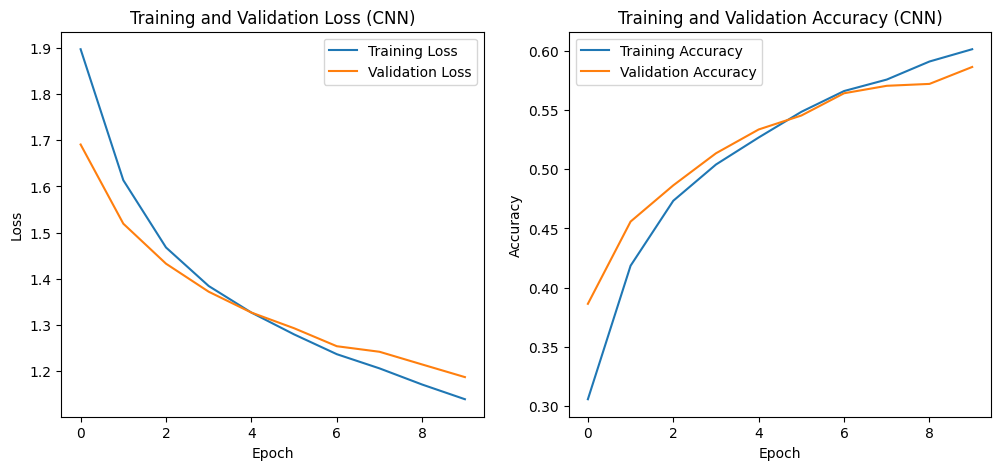


--- Running CNN Experiment with Medium Network (2 conv blocks) ---

--- Running CNN Experiment (LR=0.001, BatchSize=128, Epochs=10) ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,874 (534.66 KB)

 Trainable params: 136,874 (534.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 84ms/step - accuracy: 0.3067 - loss: 1.9153 - val_accuracy: 0.4792 - val_loss: 1.4615
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 73ms/step - accuracy: 0.4955 - loss: 1.4128 - val_accuracy: 0.5459 - val_loss: 1.2824
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.5537 - loss: 1.2620 - val_accuracy: 0.5560 - val_loss: 1.2511
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 82ms/step - accuracy: 0.5902 - loss: 1.1760 - val_accuracy: 0.5911 - val_loss: 1.1751
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.6119 - loss: 1.0975 - val_accuracy: 0.6186 - val_loss: 1.0989
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.6326 - loss: 1.0489 - val_accuracy: 0.6328 - val_loss: 1.0641
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.6504 - loss: 1.0018 - val_accuracy: 0.6320 - val_loss: 1.0712
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 78ms/step - accuracy: 0.6583 - loss: 0.9731 - 

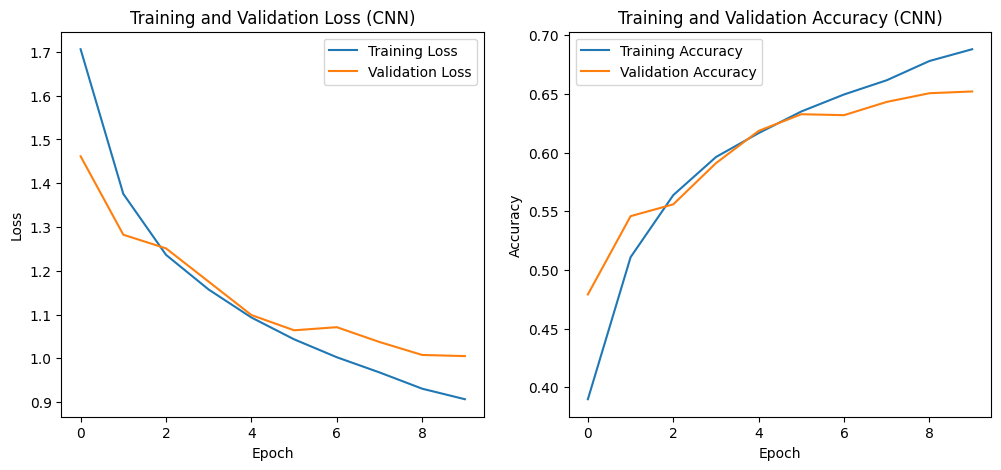


--- Running CNN Experiment with Deep Network (3 conv blocks) ---

--- Running CNN Experiment (LR=0.001, BatchSize=128, Epochs=10) ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,834 (350.91 KB)

 Trainable params: 89,834 (350.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 106ms/step - accuracy: 0.2772 - loss: 1.9553 - val_accuracy: 0.4845 - val_loss: 1.4487
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.5092 - loss: 1.3761 - val_accuracy: 0.5591 - val_loss: 1.2475
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.5882 - loss: 1.1761 - val_accuracy: 0.6190 - val_loss: 1.1071
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.6230 - loss: 1.0734 - val_accuracy: 0.6271 - val_loss: 1.0593
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 98ms/step - accuracy: 0.6534 - loss: 0.9899 - val_accuracy: 0.6285 - val_loss: 1.0585
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - accuracy: 0.6716 - loss: 0.9468 - val_accuracy: 0.6480 - val_loss: 1.0051
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - accuracy: 0.6859 - loss: 0.8970 - val_accuracy: 0.6689 - val_loss: 0.9488
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 97ms/step - accuracy: 0.7062 - loss: 0.8595

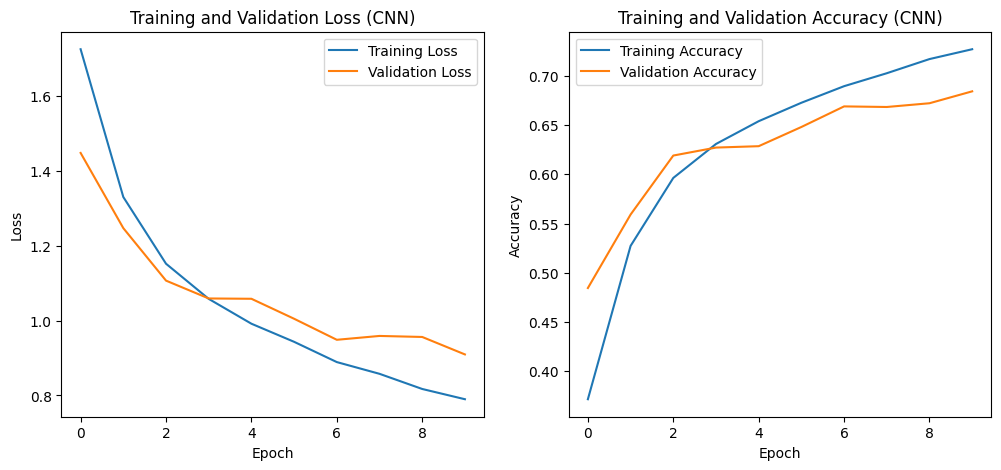

In [6]:
print("### Running Network Depth Experiments ###")

for i, depth_config in enumerate(network_depth_configs):
    depth_description = "Shallow Network" if i == 0 else ("Medium Network" if i == 1 else "Deep Network")
    print(f"\n--- Running CNN Experiment with {depth_description} ({len(depth_config)} conv blocks) ---")

    model_cnn_depth, history_cnn_depth = run_cnn_experiment(
        X_train=x_train_split,
        y_train=y_train_split,
        X_val=x_val,
        y_val=y_val,
        conv_blocks_config=depth_config,
        dense_layers_config=dense_layers_config_cnn,
        epochs=epochs_cnn,
        batch_size=batch_size_cnn,
        learning_rate=learning_rate_cnn,
        activation=activation_cnn,
        optimizer_name=optimizer_name_cnn
    )

## Update CNN Experiment Function for Augmentation

### Subtask:
Modify the existing `run_cnn_experiment` function to accept an optional `augmentation_layers` parameter. These layers will be added to the model at the beginning of the architecture, allowing for flexible data augmentation testing.


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Import data augmentation layers from the correct path
from tensorflow.keras.layers import (
    RandomFlip, RandomRotation, RandomZoom, RandomCrop
)

def run_cnn_experiment(X_train, y_train, X_val, y_val, conv_blocks_config, dense_layers_config,
                       epochs, batch_size, learning_rate, activation='relu', optimizer_name='Adam',
                       callbacks=None, augmentation_layers=None):

    # 1. Define the model architecture
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))

    # Add augmentation layers if provided
    if augmentation_layers is not None:
        for aug_layer in augmentation_layers:
            model.add(aug_layer)

    for block_config in conv_blocks_config:
        # Add Conv2D layer
        model.add(Conv2D(filters=block_config['conv']['filters'],
                         kernel_size=block_config['conv']['kernel_size'],
                         strides=block_config['conv'].get('strides', (1, 1)), # Default stride is (1,1)
                         padding=block_config['conv'].get('padding', 'valid'), # Default padding is 'valid'
                         activation=activation))

        # Add Pooling layer
        if block_config['pool']['type'] == 'max':
            model.add(MaxPooling2D(pool_size=block_config['pool']['pool_size']))
        elif block_config['pool']['type'] == 'avg':
            model.add(AveragePooling2D(pool_size=block_config['pool']['pool_size']))
        else:
            raise ValueError("Pool type must be 'max' or 'avg'")

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense hidden layers
    for units in dense_layers_config:
        model.add(Dense(units, activation=activation))

    # Add output layer
    num_classes = y_train.shape[1] # Assuming y_train is one-hot encoded
    model.add(Dense(num_classes, activation='softmax'))

    # 2. Compile the model
    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Only 'Adam' optimizer is currently supported for CNN experiments.") # Extend as needed

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # 3. Print the model summary
    print(f"\n--- Running CNN Experiment (LR={learning_rate}, BatchSize={batch_size}, Epochs={epochs}, Augmentation={'Yes' if augmentation_layers else 'No'}) ---")
    model.summary()

    # 4. Train the model
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val),
                        callbacks=callbacks,
                        verbose=1)

    # 5. Evaluate the trained model on the validation set
    eval_results = model.evaluate(X_val, y_val, verbose=0)
    print(f"\nCNN Validation Results:")
    for i, metric_name in enumerate(model.metrics_names):
        print(f"  {metric_name}: {eval_results[i]:.4f}")

    # 6. Plot training and validation loss and accuracy over epochs
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss (CNN)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy (CNN)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return model, history

print("run_cnn_experiment function updated to support data augmentation layers.")

run_cnn_experiment function updated to support data augmentation layers.


## Define Data Augmentation Configurations

### Subtask:
Define different sets of Keras data augmentation layers. This will include a baseline (no augmentation), random flips and rotations, and a combination of flips, rotations, and random crops. Explicitly note that pixel normalization has already been applied in data preparation.


In [7]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomCrop

# Define different data augmentation configurations
augmentation_configs = [
    [], # 1. No augmentation (baseline)
    [
        RandomFlip("horizontal_and_vertical"), # 2. Random flips and rotations
        RandomRotation(0.1)
    ],
    [
        RandomFlip("horizontal_and_vertical"), # 3. Combination of flips, rotations, and random crops
        RandomRotation(0.1),
        RandomCrop(height=28, width=28) # Note: Images are 32x32, so cropping to 28x28 means a 4-pixel border cut from each side
    ]
]

print("Defined data augmentation configurations:")
for i, config in enumerate(augmentation_configs):
    print(f"Config {i}: {[layer.name for layer in config] if config else 'No Augmentation'}")

Defined data augmentation configurations:
Config 0: No Augmentation
Config 1: ['random_flip', 'random_rotation']
Config 2: ['random_flip_1', 'random_rotation_1', 'random_crop']


### Running Data Augmentation Experiments ###

--- Running CNN Experiment with No Augmentation (Config 0) ---

--- Running CNN Experiment (LR=0.001, BatchSize=128, Epochs=10, Augmentation=No) ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,874 (534.66 KB)

 Trainable params: 136,874 (534.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 111ms/step - accuracy: 0.3095 - loss: 1.9151 - val_accuracy: 0.4709 - val_loss: 1.4979
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - accuracy: 0.5061 - loss: 1.3931 - val_accuracy: 0.5478 - val_loss: 1.2881
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.5585 - loss: 1.2485 - val_accuracy: 0.5717 - val_loss: 1.2148
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.5901 - loss: 1.1631 - val_accuracy: 0.6057 - val_loss: 1.1336
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.6204 - loss: 1.0893 - val_accuracy: 0.6077 - val_loss: 1.1263
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.6362 - loss: 1.0507 - val_accuracy: 0.6174 - val_loss: 1.0931
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.6481 - loss: 1.0062 - val_accuracy: 0.6273 - val_loss: 1.0630
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.6674 - loss: 0

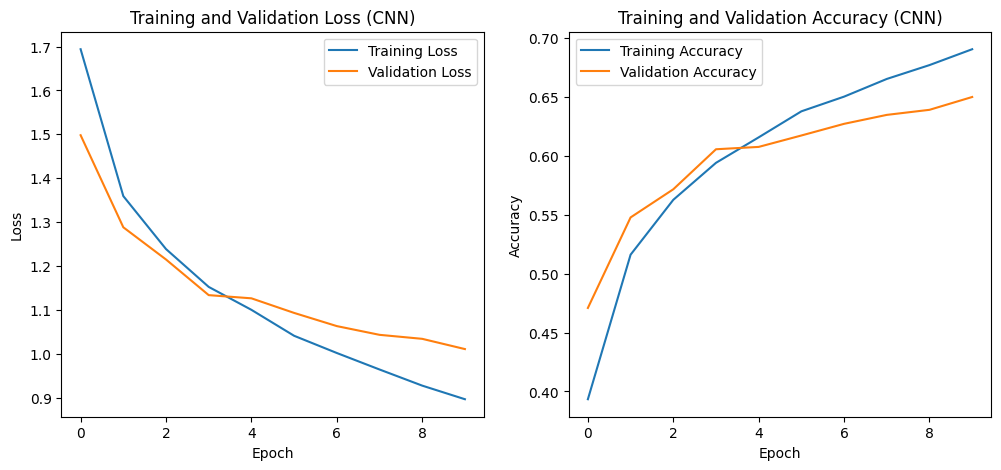


--- Running CNN Experiment with Flips and Rotations (Config 1) ---

--- Running CNN Experiment (LR=0.001, BatchSize=128, Epochs=10, Augmentation=Yes) ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,874 (534.66 KB)

 Trainable params: 136,874 (534.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 123ms/step - accuracy: 0.2557 - loss: 2.0119 - val_accuracy: 0.3674 - val_loss: 1.7335
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 123ms/step - accuracy: 0.3987 - loss: 1.6523 - val_accuracy: 0.4435 - val_loss: 1.5486
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 123ms/step - accuracy: 0.4407 - loss: 1.5513 - val_accuracy: 0.4421 - val_loss: 1.5199
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 124ms/step - accuracy: 0.4637 - loss: 1.4868 - val_accuracy: 0.4870 - val_loss: 1.4251
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 122ms/step - accuracy: 0.4856 - loss: 1.4432 - val_accuracy: 0.5068 - val_loss: 1.3892
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 127ms/step - accuracy: 0.4875 - loss: 1.4194 - val_accuracy: 0.5205 - val_loss: 1.3593
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 132ms/step - accuracy: 0.5039 - loss: 1.3892 - val_accuracy: 0.5064 - val_loss: 1.4059
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 122ms/step - accuracy: 0.5159 - loss: 1

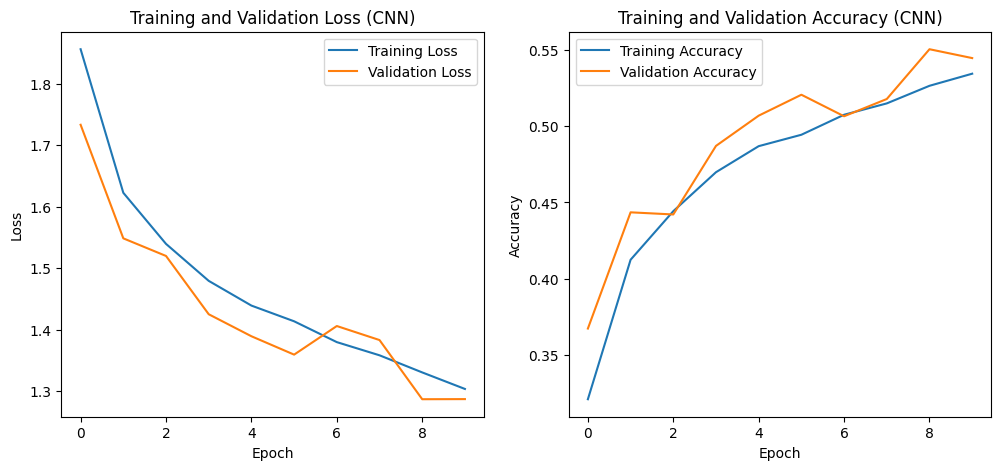


--- Running CNN Experiment with Flips, Rotations, and Crops (Config 2) ---

--- Running CNN Experiment (LR=0.001, BatchSize=128, Epochs=10, Augmentation=Yes) ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_crop (RandomCrop)        │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,154 (414.66 KB)

 Trainable params: 106,154 (414.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.2500 - loss: 2.0140

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 1568, but received input with shape (None, 2048)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [8]:
print("### Running Data Augmentation Experiments ###")

# Baseline (no augmentation) performance will be implicitly compared against
# the results of the models run with augmentation.

for i, aug_config in enumerate(augmentation_configs):
    description = "No Augmentation" if i == 0 else (f"Flips and Rotations" if i == 1 else "Flips, Rotations, and Crops")
    print(f"\n--- Running CNN Experiment with {description} (Config {i}) ---")

    # Using the baseline filter configuration for these experiments
    baseline_conv_blocks = [
        {'conv': {'filters': 16, 'kernel_size': (3, 3), 'padding': 'same'}, 'pool': {'type': 'max', 'pool_size': (2, 2)}},
        {'conv': {'filters': 32, 'kernel_size': (3, 3), 'padding': 'same'}, 'pool': {'type': 'max', 'pool_size': (2, 2)}}
    ]

    model_cnn_aug, history_cnn_aug = run_cnn_experiment(
        X_train=x_train_split,
        y_train=y_train_split,
        X_val=x_val,
        y_val=y_val,
        conv_blocks_config=baseline_conv_blocks,
        dense_layers_config=dense_layers_config_cnn,
        epochs=epochs_cnn,
        batch_size=batch_size_cnn,
        learning_rate=learning_rate_cnn,
        activation=activation_cnn,
        optimizer_name=optimizer_name_cnn,
        augmentation_layers=aug_config
    )

##Discussion Question


---

CNNs are more parameter-efficient than MLPs because they use **local connectivity** and **weight sharing**: the same small set of filters is applied across the entire image, drastically reducing the number of parameters while exploiting spatial structure. In contrast, MLPs require separate weights for every input pixel–neuron connection, causing parameter counts to explode for high-dimensional images.

In theory, an MLP could match CNN performance if it were given **enough hidden units, sufficient training data, and strong regularization**, since MLPs are universal function approximators. However, this is unrealistic in practice because such an MLP would need an enormous number of parameters, be extremely expensive to train, prone to overfitting, and unable to naturally exploit spatial invariances like translation that CNNs encode by design.
